In [1]:
#RUN IN SAOD or SAGEO (sageo has a problem with pandas min function)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import geopandas as gpd
import scipy.io
from functools import reduce
from pyproj import Proj, transform #can run this fram sageo
import rasterio
import rasterstats
from netCDF4 import Dataset
import shapely
import rioxarray
import xarray
from functools import reduce
import glob
import re
import math
import folium
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from matplotlib.transforms import Affine2D
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors

# from osgeo import ogr
from shapely.geometry import MultiLineString, Point, LineString
from shapely import wkt
import sys

pd.set_option('display.max_columns', 200)
shapely.speedups.enable()

# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# date_string='24July'
# date_string='Summer2020_v3'
# date_string='Fall2021_v11'
date_string='Summer2022_v13'

rgi = gpd.read_file('/Users/willkochtitzky/Projects/Arctic_frontal_ablation/vector_files/rgi60_Arctic_glaciers_3995_simple150.gpkg')
rgi['geometry'] = rgi.buffer(0)
# rgi = rgi[rgi.centroid.y>50].to_crs(epsg=3995)
rgi_tidewater = gpd.read_file('/Users/willkochtitzky/Projects/Arctic_frontal_ablation/Terminus_positions/RGI_Arctic_marine_terminating_glacier_outlines.gpkg') 
# Greenland_IS = gpd.read_file('/Users/willkochtitzky/data/Greenland_Ice_Sheet.gpkg')
Greenland_IS = gpd.read_file('/Users/willkochtitzky/Projects/Greenland_Calving/Mouginot_GIS_basins/Kochtitzky_edits_Mouginot_GIS_basins_3995.gpkg')
regions_outlines = gpd.read_file('/Users/willkochtitzky/Projects/Arctic_frontal_ablation/vector_files/plotting_regions2.gpkg')

In [13]:
Arctic_discharge = gpd.read_file('Arctic_discharge_points_epsg3995_'+date_string+'.gpkg', driver="GPKG")
Arctic_discharge['Milan_thickness'][Arctic_discharge['Milan_thickness']>2000]=0

KeyboardInterrupt: 

In [2]:
Arctic_discharge_fluxes_with_area_export = gpd.read_file('Arctic_discharge_fluxes_with_area_epsg3995_'+date_string+'_V4.gpkg', driver="GPKG")#change file name based on distance

In [10]:
Arctic_discharge_fluxes_with_area_export.groupby('region').mean()[['Frontal_ablation_2000_to_2010_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean','2000_2010_mean_flux_gt','2010_2020_mean_flux_gt','length_early_avg','length_late_avg','2000_2010_mean','2010_2018_mean','best_thickness_early','best_thickness_late','Melt_early_avg','Melt_late_avg','net_area_change_per_year_early','net_area_change_per_year_late']]

,Frontal_ablation_2000_to_2010_gt_per_yr_mean,Frontal_ablation_2010_to_2020_gt_per_yr_mean,2000_2010_mean_flux_gt,2010_2020_mean_flux_gt,length_early_avg,length_late_avg,2000_2010_mean,2010_2018_mean,best_thickness_early,best_thickness_late,Melt_early_avg,Melt_late_avg,net_area_change_per_year_early,net_area_change_per_year_late
region,,,,,,,,,,,,,,
Alaska,0.275956,0.254301,0.273682,0.233122,23.013136,23.035904,306.484685,312.454123,145.389406,134.038768,-8.806881,-10.117937,-0.058621,-0.107481
BBI,0.001033,0.001017,0.000505,0.000333,21.350839,21.744146,10.382597,7.512069,89.194204,83.691975,-2.587538,-2.755374,-0.011896,-0.009914
FJL,0.031886,0.022679,0.026777,0.014269,16.671778,17.986607,65.285800,25.793403,100.344989,95.988406,-0.588744,-0.664667,-0.096724,-0.122605
Greenland,0.008018,0.005915,0.004193,0.003503,20.809334,20.432723,35.564018,30.928283,91.064901,85.372377,-2.331326,-2.558889,-0.069071,-0.037836
Iceland,0.101617,0.026796,0.098955,0.000601,21.518190,22.838162,205.829328,258.837082,158.380834,136.667075,-7.603483,-7.710467,-0.207500,-0.493008
NZ,0.068341,0.106375,0.051716,0.080636,20.647905,21.748453,106.188426,148.931872,136.682395,124.281335,-1.392102,-1.816542,-0.315320,-0.379127
QEI,0.016414,0.016966,0.010643,0.008906,20.427715,20.931862,28.936214,21.603843,111.845574,105.851918,-1.489792,-1.834900,-0.114911,-0.114195
SZ,0.077878,0.118453,0.069898,0.093986,19.097025,19.925623,86.055895,105.493229,108.909161,107.020950,-0.696743,-0.933159,-0.127410,-0.314415
Svalbard and Jan Mayen,0.045888,0.101307,0.029412,0.086837,18.925579,19.947851,69.885460,76.505017,119.869683,111.506363,-1.203786,-1.603089,-0.164639,-0.158644


In [22]:
Arctic_discharge_fluxes_with_area_export.groupby('region').mean()[['Frontal_ablation_2000_to_2010_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean','2000_2010_mean_flux_gt','2010_2020_mean_flux_gt','length_early_avg','length_late_avg','2000_2010_mean','2010_2018_mean','best_thickness_early','best_thickness_late','Melt_early_avg','Melt_late_avg','net_area_change_per_year_early','net_area_change_per_year_late']]

,Frontal_ablation_2000_to_2010_gt_per_yr_mean,Frontal_ablation_2010_to_2020_gt_per_yr_mean,2000_2010_mean_flux_gt,2010_2020_mean_flux_gt,length_early_avg,length_late_avg,2000_2010_mean,2010_2018_mean,best_thickness_early,best_thickness_late,Melt_early_avg,Melt_late_avg,net_area_change_per_year_early,net_area_change_per_year_late
region,,,,,,,,,,,,,,
Alaska,0.270477,0.249243,0.268203,0.228026,22.997680,23.026098,306.484685,312.454123,145.389406,134.038768,-8.806881,-10.117937,-0.058621,-0.107481
BBI,0.001014,0.001004,0.000486,0.000320,21.617029,21.502432,10.382597,7.512069,89.194204,83.691975,-2.587538,-2.755374,-0.011896,-0.009914
FJL,0.039961,0.024960,0.034854,0.016568,21.977667,21.703778,65.285800,25.793403,100.344989,95.988406,-0.588744,-0.664667,-0.096724,-0.122605
Greenland,0.008108,0.005975,0.004277,0.003559,22.065391,21.931722,35.564018,30.928283,91.064901,85.372377,-2.331326,-2.558889,-0.069084,-0.037836
Iceland,0.109139,0.043781,0.106477,0.017586,23.167817,22.672688,205.829328,258.837082,158.380834,136.667075,-7.603483,-7.710467,-0.207500,-0.493008
NZ,0.068672,0.106574,0.052047,0.080835,22.850485,22.733809,106.188426,148.931872,136.682395,124.281335,-1.392102,-1.816542,-0.315320,-0.379127
QEI,0.016405,0.016906,0.010632,0.008846,21.990894,21.803181,28.936214,21.603843,111.845574,105.851918,-1.489792,-1.834900,-0.114911,-0.114195
SZ,0.100180,0.127094,0.092201,0.102627,22.721641,22.219297,86.055895,105.493229,108.909161,107.020950,-0.696743,-0.933159,-0.127410,-0.314415
Svalbard and Jan Mayen,0.052041,0.102556,0.035591,0.088082,22.227631,22.320096,69.885460,76.505017,119.869683,111.506363,-1.203786,-1.603089,-0.164639,-0.158644


In [3]:
len(Arctic_discharge_fluxes_with_area_export)

1496

In [4]:
for region in Arctic_discharge_fluxes_with_area_export['Region_name'].unique():
    temp_data=Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Region_name']==region].reset_index(drop=True)
    root_sqaure_error=[]
    root_sqaure_error=np.sqrt(np.sum((temp_data['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err'])**2))
    print(region)
    print('Frontal ablation total: ',sum(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Region_name']==region]['Frontal_ablation_2010_to_2020_gt_per_yr_mean']))
    print('Sum of errors: ',sum(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Region_name']==region]['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']))
    print('Root sum square of errors: ',root_sqaure_error*2)

Alaska
Frontal ablation total:  10.957548590639584
Sum of errors:  0.3633792313312017
Root sum square of errors:  0.2825693004169305
QEI
Frontal ablation total:  4.14266647987896
Sum of errors:  1.208433481902153
Root sum square of errors:  0.39993141675278965
BBI
Frontal ablation total:  0.08483878660952267
Sum of errors:  0.06280864550158596
Root sum square of errors:  0.03189395198284689
Greenland
Frontal ablation total:  3.12879984933491
Sum of errors:  1.3180938265779458
Root sum square of errors:  0.3143868675314196
Iceland
Frontal ablation total:  0.04689091802334768
Sum of errors:  0.02808252470078387
Root sum square of errors:  0.05616504940156774
Svalbard and Jan Mayen
Frontal ablation total:  16.70647746591033
Sum of errors:  2.836814367742174
Root sum square of errors:  1.0684011576009063
FJL
Frontal ablation total:  7.994636772583591
Sum of errors:  3.3878720289318136
Root sum square of errors:  0.6308913528935913
NZ
Frontal ablation total:  4.1044199855162855
Sum of error

In [3]:
Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='Agassiz']= 'Agassiz, ACN'
Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='S Ellesmere']= 'S Ellesmere, ACN'
Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='Devon']= 'Devon, ACN'
Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='Prince of Wales']= 'Prince of Wales, ACN'
Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='N Ellesmere']= 'N Ellesmere, ACN'
Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='Axel Heiberg']= 'Axel Heiberg, ACN'

Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='Baffin']= 'Baffin, ACS'

Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='SW Greenland']= 'SW Greenland'
Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='Uummannaq']= 'Uummannaq, GR'
Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='SE Greenland']= 'SE Greenland'
Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='N Greenland']= 'N Greenland'
Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='NE Greenland']= 'NE Greenland'
Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='Ittoqqortoormiit']= 'Ittoqqortoormiit, GR'
Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='Qaanaaq']= 'Qaanaaq, GR'

Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='S Spitsbergen']= 'S Svalbard'
Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='Nordaustlandet']= 'Nordaustlandet, SV'
Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='NW Spitsbergen']= 'NW Svalbard'
Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='Edgeøya']= 'Edgeøya, SV'
Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='Barents Sea']= 'Barents Sea, SV+FJL'
Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='De Long']= 'De Long, Russia'
Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='NE Spitsbergen']= 'NE Svalbard'

Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='Hooker Island']= 'Hooker, FJL'
Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='Hall Island']= 'Hall, FJL'
Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='Salisbury Island']= 'Salisbury, FJL'
Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='Jackson Island']= 'Jackson, FJL'
Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='Prince George Land']= 'Prince George, FJL'
Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='Alexandra']= 'Alexandra, FJL'
Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='Wilczek Land']= 'Wilczek, FJL'

Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='N NZ']= 'N Novaya Zemlya'
Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='S NZ']= 'S Novaya Zemlya'

Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='N SZ']= 'N Severnaya Zemlya'
Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='S SZ']= 'S Severnaya Zemlya'
Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='Central SZ']= 'E Severnaya Zemlya'

Arctic_discharge_fluxes_with_area_export['Subregion_name'][Arctic_discharge_fluxes_with_area_export['Subregion_name']=='Iceland and JM']= 'Iceland and Jan Mayen'

/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [ ]:
Arctic_discharge_fluxes_with_area_export['Subregion_name'].unique()

In [30]:
Arctic_discharge_fluxes_with_area_export['terminus_melt_correct_area_early'] = np.abs(Arctic_discharge_fluxes_with_area_export['net_area_change_early'])
Arctic_discharge_fluxes_with_area_export['terminus_melt_correct_area_late'] = np.abs(Arctic_discharge_fluxes_with_area_export['net_area_change_late'])


Arctic_discharge_fluxes_with_area_export.groupby('region').sum()[[
#     'melt_correct_gt_early_terminus_change','melt_correct_gt_early_err_terminus_change','melt_correct_gt_late_terminus_change','melt_correct_gt_late_err_terminus_change',
#     'melt_correct_gt_early_discharge','melt_correct_gt_late_discharge','melt_correct_gt_early_err_discharge','melt_correct_gt_late_err_discharge',
    'area_below_fluxgate_middle','area_below_fluxgate_late',
    'terminus_melt_correct_area_early','terminus_melt_correct_area_late',
#     'Frontal_ablation_2000_to_2010_gt_per_yr_mean','Frontal_ablation_2000_to_2010_gt_per_yr_mean_err','Frontal_ablation_2010_to_2020_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err',
#     'terminus_gt_change_per_year_early_without_melt','2000_2010_mean_flux_gt_without_melt',
#     'terminus_gt_change_per_year_early','terminus_gt_change_per_year_early_area_error','terminus_gt_change_per_year_late','terminus_gt_change_per_year_late_area_error',
#     '2000_2010_mean_flux_gt','2000_2010_mean_flux_err_gt', '2010_2020_mean_flux_gt','2010_2020_mean_flux_err_gt',
#     'melt_correct_gt_early', 'melt_correct_gt_early_err','melt_correct_gt_late', 'melt_correct_gt_late_err',
    'gate_length_km']]

,area_below_fluxgate_middle,area_below_fluxgate_late,terminus_melt_correct_area_early,terminus_melt_correct_area_late,gate_length_km
region,,,,,
Alaska,134.176104,96.236862,38.587778,46.717639,80.025887
BBI,39.291430,31.908144,9.483931,7.542273,39.656709
FJL,1789.750288,2018.954885,326.221316,354.390051,1377.194230
Greenland,1218.718015,1099.431787,387.510654,189.927664,696.902216
Iceland,27.109756,23.720145,2.281926,3.401080,5.123159
NZ,387.910559,257.479995,124.700259,135.922288,181.639498
QEI,1511.639975,1514.301791,312.131187,263.119190,481.212975
SZ,1207.416605,1469.556940,87.749559,369.495487,283.481882
Svalbard and Jan Mayen,1841.686701,1689.945278,355.626272,519.854451,656.810826


In [38]:
Arctic_discharge_fluxes_with_area_export['gate_length_km'].sum()

4454.420205840132

In [32]:
#get climatic mass balance numbers
temp = Arctic_discharge_fluxes_with_area_export
temp['Region_name']=temp['region']
FA_short = temp.groupby('Region_name').sum()[[
    'melt_correct_gt_early_terminus_change','melt_correct_gt_early_err_terminus_change','melt_correct_gt_late_terminus_change','melt_correct_gt_late_err_terminus_change',
    'melt_correct_gt_early_discharge','melt_correct_gt_early_err_discharge','melt_correct_gt_late_discharge','melt_correct_gt_late_err_discharge']].reset_index()
    
for region in FA_short['Region_name'].unique():
    FA_short.loc[FA_short['Region_name']==region,'Bclim_dis_early']=str(round(-np.abs(FA_short[FA_short['Region_name']==region]['melt_correct_gt_early_discharge']).sum(),2))+' ± '+str(round(FA_short[FA_short['Region_name']==region]['melt_correct_gt_early_err_discharge'].sum(),2))
    FA_short.loc[FA_short['Region_name']==region,'Bclim_dis_late']=str(round(-np.abs(FA_short[FA_short['Region_name']==region]['melt_correct_gt_late_discharge']).sum(),2))+' ± '+str(round(FA_short[FA_short['Region_name']==region]['melt_correct_gt_late_err_discharge'].sum(),2))
    FA_short.loc[FA_short['Region_name']==region,'Bclim_term_early']=str(round(-np.abs(FA_short[FA_short['Region_name']==region]['melt_correct_gt_early_terminus_change']).sum(),2))+' ± '+str(round(FA_short[FA_short['Region_name']==region]['melt_correct_gt_early_err_terminus_change'].sum(),2))
    FA_short.loc[FA_short['Region_name']==region,'Bclim_term_late']=str(round(-np.abs(FA_short[FA_short['Region_name']==region]['melt_correct_gt_late_terminus_change']).sum(),2))+' ± '+str(round(FA_short[FA_short['Region_name']==region]['melt_correct_gt_late_err_terminus_change'].sum(),2))

print('total Bclim discharge early',round(-np.abs(FA_short['melt_correct_gt_early_discharge']).sum(),2),' ± ',round(np.sqrt((FA_short['melt_correct_gt_early_err_discharge']**2).sum()),2))
print('total Bclim discharge late',round(-np.abs(FA_short['melt_correct_gt_late_discharge']).sum(),2),' ± ',round(np.sqrt((FA_short['melt_correct_gt_late_err_discharge']**2).sum()),2))
print('total Bclim terminus early',round(-np.abs(FA_short['melt_correct_gt_early_terminus_change']).sum(),2),' ± ',round(np.sqrt((FA_short['melt_correct_gt_early_err_terminus_change']**2).sum()),2))
print('total Bclim terminus late',round(-np.abs(FA_short['melt_correct_gt_late_terminus_change']).sum(),2),' ± ',round(np.sqrt((FA_short['melt_correct_gt_late_err_terminus_change']**2).sum()),2))
print()
print('total Bclim early',round(-np.abs(FA_short['melt_correct_gt_early_terminus_change']).sum()+-np.abs(FA_short['melt_correct_gt_early_discharge']).sum(),2),' ± ',round(FA_short['melt_correct_gt_early_err_terminus_change'].sum()+FA_short['melt_correct_gt_early_err_discharge'].sum(),2))
print('total Bclim late',round(-np.abs(FA_short['melt_correct_gt_late_terminus_change']).sum()+-np.abs(FA_short['melt_correct_gt_late_discharge']).sum(),2),' ± ',round(FA_short['melt_correct_gt_late_err_terminus_change'].sum()+FA_short['melt_correct_gt_late_err_discharge'].sum(),2))

FA_short

total Bclim discharge early -9.38  ±  0.64
total Bclim discharge late -9.97  ±  0.71
total Bclim terminus early -0.92  ±  0.14
total Bclim terminus late -1.13  ±  0.15

total Bclim early -10.29  ±  1.97
total Bclim late -11.1  ±  2.17


,Region_name,melt_correct_gt_early_terminus_change,melt_correct_gt_early_err_terminus_change,melt_correct_gt_late_terminus_change,melt_correct_gt_late_err_terminus_change,melt_correct_gt_early_discharge,melt_correct_gt_early_err_discharge,melt_correct_gt_late_discharge,melt_correct_gt_late_err_discharge,Bclim_dis_early,Bclim_dis_late,Bclim_term_early,Bclim_term_late
0,Alaska,0.081102,0.049675,0.177820,0.062938,-1.104777,0.218140,-0.935294,0.172647,-1.1 ± 0.22,-0.94 ± 0.17,-0.08 ± 0.05,-0.18 ± 0.06
1,BBI,0.013676,0.006896,0.011616,0.005568,-0.112644,0.015401,-0.091975,0.012700,-0.11 ± 0.02,-0.09 ± 0.01,-0.01 ± 0.01,-0.01 ± 0.01
2,FJL,0.103641,0.040093,0.129212,0.047319,-1.043052,0.196454,-1.314475,0.254662,-1.04 ± 0.2,-1.31 ± 0.25,-0.1 ± 0.04,-0.13 ± 0.05
3,Greenland,0.255109,0.084060,0.170284,0.069780,-1.656736,0.305983,-1.715727,0.318319,-1.66 ± 0.31,-1.72 ± 0.32,-0.26 ± 0.08,-0.17 ± 0.07
4,Iceland,0.008675,0.001981,0.013112,0.002778,-0.206129,0.039167,-0.182893,0.035261,-0.21 ± 0.04,-0.18 ± 0.04,-0.01 ± 0.0,-0.01 ± 0.0
5,NZ,0.090050,0.017187,0.127031,0.023301,-0.564561,0.083310,-0.469946,0.072841,-0.56 ± 0.08,-0.47 ± 0.07,-0.09 ± 0.02,-0.13 ± 0.02
6,QEI,0.201315,0.066430,0.228615,0.067845,-1.996170,0.320178,-2.490981,0.388534,-2.0 ± 0.32,-2.49 ± 0.39,-0.2 ± 0.07,-0.23 ± 0.07
7,SZ,0.014048,0.013860,-0.053941,0.037873,-0.787880,0.155489,-0.886075,0.201060,-0.79 ± 0.16,-0.89 ± 0.2,-0.01 ± 0.01,-0.05 ± 0.04
8,Svalbard and Jan Mayen,0.150966,0.048461,0.221274,0.078309,-1.903345,0.310702,-1.883693,0.321005,-1.9 ± 0.31,-1.88 ± 0.32,-0.15 ± 0.05,-0.22 ± 0.08


In [ ]:
str(round(FA_short[FA_short['Region_name']==region]['melt_correct_gt_early_err_discharge'].sum(),2))

In [ ]:
Arctic_discharge_fluxes_with_area_export.sum()[[
    'Frontal_ablation_2000_to_2010_gt_per_yr_mean','Frontal_ablation_2000_to_2010_gt_per_yr_mean_err','Frontal_ablation_2010_to_2020_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err',
    'terminus_gt_change_per_year_early','terminus_gt_change_per_year_early_area_error','terminus_gt_change_per_year_late','terminus_gt_change_per_year_late_area_error',
    '2000_2010_mean_flux_gt','2000_2010_mean_flux_err_gt', '2010_2020_mean_flux_gt','2010_2020_mean_flux_err_gt',
#     'melt_correct_gt_early', 'melt_correct_gt_early_err','melt_correct_gt_late', 'melt_correct_gt_late_err',
    'gate_length_km']]

In [4]:
Arctic_discharge_fluxes_with_area_export.groupby('Region_name').count()['RGIId']

Region_name
Alaska                     42
BBI                        86
FJL                       328
Greenland                 537
Iceland                     1
NZ                         39
QEI                       252
SZ                         45
Svalbard and Jan Mayen    166
Name: RGIId, dtype: int64

In [ ]:
Arctic_discharge_fluxes_with_area_export[['FA_not_calculated_in_normal_way_early','FA_not_calculated_in_normal_way_late']].sum()

In [ ]:
Arctic_discharge_fluxes_with_area_export['Subregion_name'].unique()#[Arctic_discharge_fluxes_with_area_export['Subregion_name']=='Agassiz, QEI']['Subregion_name']

In [ ]:
Arctic_discharge_fluxes_with_area_export['Middle_satellite_id'].isna().sum()

# 'Early_satellite_id',
#        'Middle_satellite_id', 'Late_satellite_id'

In [ ]:
len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']<-0.04])

In [ ]:
Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['net_area_change_total']<0.1)&(Arctic_discharge_fluxes_with_area_export['net_area_change_total']>-0.1)].sort_values('2010_2018_mean',ascending=False).head(10)[['lat','lon']]    

In [ ]:
Arctic_discharge_fluxes_with_area_export.sort_values('net_area_change_total',ascending=True).head(20)

In [ ]:
%matplotlib notebook
ax1 = plt.plot(Arctic_discharge_fluxes_with_area_export['best_thickness_mean'],Arctic_discharge_fluxes_with_area_export[['thickness_for_area_lost_early', 'thickness_for_area_gained_early','thickness_for_area_lost_late', 'thickness_for_area_gained_late',]])


In [ ]:
%matplotlib notebook
glacier_contrib_threshold = -0.02
Arctic_data_plotting = Arctic_discharge_fluxes_with_area_export
Arctic_data_plotting = Arctic_data_plotting[Arctic_data_plotting['Frontal_ablation_2010_to_2020_gt_per_yr_mean']<glacier_contrib_threshold]

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, tight_layout=True)

Arctic_data_plotting=Arctic_data_plotting.sort_values('Frontal_ablation_2010_to_2020_gt_per_yr_mean',ascending=False)

first = ax1.scatter(Arctic_data_plotting[Arctic_data_plotting['best_thickness_mean']>10**0]['best_thickness_mean'],Arctic_data_plotting[Arctic_data_plotting['best_thickness_mean']>10**0]['2010_2018_mean'],c=Arctic_data_plotting[Arctic_data_plotting['best_thickness_mean']>10**0]['Frontal_ablation_2010_to_2020_gt_per_yr_mean'],cmap=plt.cm.get_cmap('jet'))#,norm=matplotlib.colors.LogNorm())
ax1.set_yscale('symlog')
ax2.set_xscale('symlog')
ax1.set_xlabel('Glacier thickness (m)')
ax1.set_ylabel('Mean velocity (m/yr)')
fig.colorbar(first, ax=ax1,label='Frontal ablation (gt/yr)')

ax2.scatter(Arctic_data_plotting['terminus_gt_change_per_year_late'],Arctic_data_plotting['2010_2018_mean'],c=Arctic_data_plotting['Frontal_ablation_2010_to_2020_gt_per_yr_mean'],cmap=plt.cm.get_cmap('jet'))
ax2.set_yscale('symlog')
ax2.set_xlabel('Terminus change (gt/yr)')
ax2.set_ylabel('Mean velocity (m/yr)')

ax3.scatter(Arctic_data_plotting['terminus_gt_change_per_year_late'],Arctic_data_plotting['best_thickness_mean'],c=Arctic_data_plotting['Frontal_ablation_2010_to_2020_gt_per_yr_mean'],cmap=plt.cm.get_cmap('jet'))
# ax3.set_yscale('symlog')
ax3.set_xlabel('Terminus change (gt/yr)')
ax3.set_ylabel('Glacier thickness (m)')

ax4.scatter(Arctic_data_plotting['terminus_gt_change_per_year_late'],-Arctic_data_plotting['2010_2018_mean_flux_gt'],c=Arctic_data_plotting['Frontal_ablation_2010_to_2020_gt_per_yr_mean'],cmap=plt.cm.get_cmap('jet'))
# ax4.set_yscale('symlog')
ax4.set_xlabel('Terminus change (gt/yr)')
ax4.set_ylabel('Glacier flux (gt/yr)')

fig.set_figheight(10)
fig.set_figwidth(20)

plt.savefig('figures/data_comparison')

In [ ]:
%matplotlib notebook
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, tight_layout=True)

Arctic_discharge_fluxes_with_area_export=Arctic_discharge_fluxes_with_area_export.sort_values('Frontal_ablation_2010_to_2020_gt_per_yr_mean',ascending=False)

colors={'Svalbard':'blue', 'SZ':'red', 'Greenland':'green', 'QEI':'cyan', 'Iceland and Jan Mayen':'black','BBI':'cyan', 'FJL':'red', 'Alaska':'magenta', 'NZ':'red'}

first = ax1.scatter(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['best_thickness_mean']>10**0]['best_thickness_mean'],Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['best_thickness_mean']>10**0]['2010_2018_mean'])#,c=Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['best_thickness_mean']>10**0]['Region_name'].map(colors))#,norm=matplotlib.colors.LogNorm())
ax1.set_yscale('symlog')
ax2.set_xscale('symlog')
ax1.set_xlabel('Glacier thickness (m)')
ax1.set_ylabel('Mean velocity (m/yr)')


groups = Arctic_discharge_fluxes_with_area_export.groupby("Region_name")
for name, group in groups:
    ax2.scatter(group['terminus_gt_change_per_year_late'],group['2010_2018_mean'])#,c=group['Region_name'].map(colors))
# ax2.set_yscale('symlog')
ax2.set_xlabel('Terminus change (gt/yr)')
ax2.set_ylabel('Mean velocity (m/yr)')
ax2.legend()

for name, group in groups:
    ax3.scatter(group['terminus_gt_change_per_year_late'],group['2010_2018_mean'])#,c=group['Region_name'].map(colors))
# ax3.set_yscale('symlog')
ax3.set_xlabel('Terminus change (gt/yr)')
ax3.set_ylabel('Mean velocity (m/yr)')

for name, group in groups:
    ax4.scatter(group['terminus_gt_change_per_year_late'],-group['2010_2018_mean_flux_gt'])#,c=group['Region_name'].map(colors))
# ax4.set_yscale('symlog')
ax4.set_xlabel('Terminus change (gt/yr)')
ax4.set_ylabel('Glacier flux (gt/yr)')

fig.set_figheight(10)
fig.set_figwidth(20)

In [ ]:
glacier_contrib_threshold = -0.02
Arctic_box_whis = Arctic_discharge_fluxes_with_area_export
Arctic_box_whis = Arctic_box_whis[Arctic_box_whis['Frontal_ablation_2010_to_2020_gt_per_yr_mean']<glacier_contrib_threshold]

Arctic_box_whis['Region_name'][(Arctic_box_whis['Region_name']=='SZ')|(Arctic_box_whis['Region_name']=='FJL')|(Arctic_box_whis['Region_name']=='NZ')]='Russia'
Arctic_box_whis=Arctic_box_whis[Arctic_box_whis['Region_name']!='Iceland and Jan Mayen']
# Arctic_box_whis = Arctic_box_whis.groupby('Region_name').sum()[['Frontal_ablation_2010_to_2020_gt_per_yr_mean','Frontal_ablation_2000_to_2010_gt_per_yr_mean','2010_2018_mean_flux_gt','2010_2018_mean_err_gt','terminus_gt_change_per_year_late','terminus_gt_change_per_year_late_area_error','2000_2010_mean_flux_gt','2000_2010_mean_err_gt','terminus_gt_change_per_year_early','terminus_gt_change_per_year_early_area_error']].sort_values(by='Frontal_ablation_2000_to_2010_gt_per_yr_mean')  
# Arctic_box_whis = Arctic_box_whis.reset_index()
for var in ['best_thickness_mean','2000_2010_mean','2000_2010_mean_err', '2010_2018_mean','2010_2018_mean_err','gate_length_km','2000_2010_mean_flux_gt','2000_2010_mean_err_gt', 
'2010_2018_mean_flux_gt','2010_2018_mean_err_gt', 'area_km2_gained_total','area_km2_lost_total', 'area_km2_lost_early',
'area_km2_gained_early', 'area_km2_lost_late','area_km2_gained_late','net_area_change_total',
'net_area_change_early', 'net_area_change_per_year_early', 'net_area_change_late', 'net_area_change_per_year_late','thickness_for_area_lost_early','thickness_for_area_gained_early', 'thickness_for_area_lost_late',
'thickness_for_area_gained_late','area_flux_gt_gained_early',
'area_flux_gt_lost_early','area_flux_gt_gained_late','area_flux_gt_lost_late',
'terminus_gt_change_total','terminus_gt_change_per_year_total',
'terminus_gt_change_per_year_early','terminus_gt_change_per_year_late',
'Frontal_ablation_2000_to_2010_gt_per_yr_mean','Frontal_ablation_2000_to_2010_gt_per_yr_mean_err','Frontal_ablation_2010_to_2020_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']:
    Arctic_box_whis.boxplot(column=var,by='Region_name',figsize=(10,5))
    plt.xlabel(var)
    plt.savefig(('figures/box_whis_threshold_02/'+var))
# fig.savefig('test')

In [ ]:
'Surging','do_we_have_an_observation_in_middle_fifth','Farinotti_thickness_mean','best_thickness_mean', 'thickness_mean_uncertainty','2000_2010_mean', 
'2000_2010_mean_err', '2010_2018_mean','2010_2018_mean_err', 'num_pts', 'GlaThiDa_observations','Tomography_observations', 'Russian_observations', 'gate_length_km',
'2000_2010_mean_flux_gt','2000_2010_mean_err_gt', '2010_2018_mean_flux_gt','2010_2018_mean_err_gt', 'area_km2_gained_total','area_km2_lost_total', 'area_km2_lost_early',
'area_km2_gained_early', 'area_km2_lost_late','area_km2_gained_late','net_area_change_total', 'net_area_change_total_error','net_area_change_per_year_total',
'net_area_change_per_year_total_error', 'net_area_change_early','net_area_change_early_error', 'net_area_change_per_year_early','net_area_change_per_year_early_error', 'net_area_change_late',
'net_area_change_late_error', 'net_area_change_per_year_late','net_area_change_per_year_late_error','thickness_for_area_lost_early','thickness_for_area_gained_early', 'thickness_for_area_lost_late',
'thickness_for_area_gained_late', 'thickness_for_area_lost_early_err','thickness_for_area_gained_early_err','thickness_for_area_lost_late_err','thickness_for_area_gained_late_err', 'area_flux_gt_gained_early',
'area_flux_gt_gained_early_error', 'area_flux_gt_lost_early','area_flux_gt_lost_early_error', 'area_flux_gt_gained_late','area_flux_gt_gained_late_error', 'area_flux_gt_lost_late',
'area_flux_gt_lost_late_error', 'terminus_gt_change_total','terminus_gt_change_total_area_error','terminus_gt_change_per_year_total','terminus_gt_change_per_year_total_area_error',
'terminus_gt_change_per_year_early','terminus_gt_change_per_year_early_area_error','terminus_gt_change_per_year_late','terminus_gt_change_per_year_late_area_error',
'Frontal_ablation_2000_to_2010_gt_per_yr_mean','Frontal_ablation_2000_to_2010_gt_per_yr_mean_err','Frontal_ablation_2010_to_2020_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err',
'Region_name'

In [ ]:
pd.set_option('display.max_rows', 200)
Arctic_discharge_fluxes_with_area_export.sum()

In [ ]:
Arctic_discharge_fluxes_with_area_export.groupby('Region_name').sum()['gate_length_km']

In [ ]:
Arctic_discharge_fluxes_with_area_export.groupby('Subregion_name2').sum()['gate_length_km']

In [ ]:
#how uncertain are different types of data
print('% mean uncertainty of all velocity data',np.mean(Arctic_discharge_fluxes_with_area_export['2010_2018_mean_err']/Arctic_discharge_fluxes_with_area_export['2010_2018_mean']))
print('% mean uncertainty of all thickness data',np.mean(Arctic_discharge_fluxes_with_area_export['thickness_mean_uncertainty']/Arctic_discharge_fluxes_with_area_export['best_thickness_mean']))
print('% mean uncertainty of all area data',np.sum(Arctic_discharge_fluxes_with_area_export['net_area_change_per_year_late_error'])/np.sum(np.abs(Arctic_discharge_fluxes_with_area_export['net_area_change_per_year_late'])))


In [ ]:
big_contrib = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']>0.04]

print('% mean uncertainty of all velocity data',np.mean(big_contrib['2010_2018_mean_err']/big_contrib['2010_2018_mean']))
print('% mean uncertainty of all thickness data',np.mean(big_contrib['thickness_mean_uncertainty']/big_contrib['best_thickness_mean']))
print('% mean uncertainty of all area data',np.sum(big_contrib['net_area_change_per_year_late_error'])/np.sum(np.abs(big_contrib['net_area_change_per_year_late'])))
print('number of glaciers',len(big_contrib))
print('total frontal ablation',big_contrib['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum())
print('Percent of frontal ablation',(big_contrib['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum())/Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum())

In [ ]:
print(big_contrib.groupby('Region_name')['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum()/Arctic_discharge_fluxes_with_area_export.groupby('Region_name')['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum())

In [ ]:
#Velocity error by region
big_contrib['percent_velocity_error'] = (big_contrib['2010_2018_mean_err']/big_contrib['2010_2018_mean'])
print(big_contrib.groupby('Region_name')['percent_velocity_error'].mean())

In [ ]:
#Thickness error by region
big_contrib['percent_thickness_error'] = (big_contrib['thickness_mean_uncertainty']/big_contrib['best_thickness_mean'])
big_contrib.groupby('Region_name')['percent_thickness_error'].mean()

In [ ]:
#Area error by region
big_contrib['abs_net_area_change_per_year_late'] = np.abs(big_contrib['net_area_change_per_year_late'])
big_contrib.groupby('Region_name')['net_area_change_per_year_late_error'].sum()/big_contrib.groupby('Region_name')['abs_net_area_change_per_year_late'].sum()

In [ ]:
Arctic_discharge_fluxes_with_area_export.groupby('Region_name')['net_area_change_per_year_late'].sum()

In [ ]:
(Arctic_discharge_fluxes_with_area_export['net_area_change_per_year_late_error']/np.abs(Arctic_discharge_fluxes_with_area_export['net_area_change_per_year_late']))

In [ ]:
Arctic_discharge_fluxes_with_area_export.groupby('Region_name').sum()[['2000_2010_mean_flux_gt','2000_2010_mean_err_gt','2010_2018_mean_flux_gt','2010_2018_mean_err_gt']].sort_values(by='2010_2018_mean_flux_gt') 

In [ ]:
Arctic_discharge_fluxes_with_area_export.groupby('Region_name').sum()[['Frontal_ablation_2000_to_2010_gt_per_yr_mean','Frontal_ablation_2000_to_2010_gt_per_yr_mean_err','Frontal_ablation_2010_to_2020_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']].sort_values(by='Frontal_ablation_2000_to_2010_gt_per_yr_mean') 

In [ ]:
Arctic_discharge_fluxes_with_area_export.groupby('Subregion_name2').sum()[['terminus_gt_change_per_year_early','terminus_gt_change_per_year_early_area_error','terminus_gt_change_per_year_late','terminus_gt_change_per_year_late_area_error','2000_2010_mean_flux_gt','2000_2010_mean_err_gt', '2010_2018_mean_flux_gt','2010_2018_mean_err_gt','Frontal_ablation_2000_to_2010_gt_per_yr_mean','Frontal_ablation_2000_to_2010_gt_per_yr_mean_err','Frontal_ablation_2010_to_2020_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']].sort_values(by='Frontal_ablation_2000_to_2010_gt_per_yr_mean') 

In [ ]:
Arctic_discharge_fluxes_with_area_export.columns[100:]

In [ ]:
Arctic_discharge_fluxes_with_area_export.sum()[121:]

In [ ]:
Arctic_discharge_fluxes_with_area_export.sum()[['terminus_gt_change_per_year_early','terminus_gt_change_per_year_early_area_error','terminus_gt_change_per_year_late','terminus_gt_change_per_year_late_area_error','2000_2010_mean_flux_gt','2000_2010_mean_err_gt', '2010_2018_mean_flux_gt','2010_2018_mean_err_gt','Frontal_ablation_2000_to_2010_gt_per_yr_mean','Frontal_ablation_2000_to_2010_gt_per_yr_mean_err','Frontal_ablation_2010_to_2020_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']]

In [ ]:
Arctic_discharge_fluxes_with_area_export.groupby('Region_name').count()

In [ ]:
Arctic_discharge_fluxes_with_area_export.groupby('Region_name').sum()[['melt_correct_gt_early_terminus_change','melt_correct_gt_late_terminus_change','melt_correct_gt_early_err_terminus_change','melt_correct_gt_late_err_terminus_change','melt_correct_gt_early_discharge','melt_correct_gt_late_discharge','melt_correct_gt_early_err_discharge','melt_correct_gt_late_err_discharge']]

In [ ]:
Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Region_name']!='Greenland'].sum()[['Frontal_ablation_2000_to_2010_gt_per_yr_mean','Frontal_ablation_2000_to_2010_gt_per_yr_mean_err','Frontal_ablation_2010_to_2020_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']]   

In [ ]:
Arctic_discharge_fluxes_with_area_export.sum()[['Frontal_ablation_2000_to_2010_gt_per_yr_mean','Frontal_ablation_2000_to_2010_gt_per_yr_mean_err','Frontal_ablation_2010_to_2020_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']]   

In [ ]:
Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']!='Jan Mayen'].sum()

In [39]:
Arctic_discharge_fluxes_with_area_export['do_we_have_an_observation_in_middle_fifth'].sum()

250.0

In [24]:
Arctic_discharge_fluxes_with_area_export['num_pts'].sum()*25/1000

5016.075

In [40]:
temp_data =Arctic_discharge_fluxes_with_area_export
temp_data[((temp_data['GlaThiDa_observations']/temp_data['num_pts'])>0.90)|((temp_data['Tomography_observations']/temp_data['num_pts'])>0.90)|((temp_data['Russian_observations']/temp_data['num_pts'])>0.90)].count()

RGIId                               120
2000_2010_mean_flux_gt              120
2000_2010_mean_flux_err_gt          120
2010_2020_mean_flux_gt              120
2010_2020_mean_flux_err_gt          120
                                   ... 
Subregion_name                      120
Subregion_name2                     120
geometry                            120
terminus_melt_correct_area_early    120
terminus_melt_correct_area_late     120
Length: 242, dtype: int64

In [27]:
temp_data =Arctic_discharge_fluxes_with_area_export
temp_data[((temp_data['GlaThiDa_observations']/temp_data['num_pts'])>0.75)|((temp_data['Tomography_observations']/temp_data['num_pts'])>0.75)|((temp_data['Russian_observations']/temp_data['num_pts'])>0.75)].count()

RGIId                         161
2000_2010_mean_flux_gt        161
2000_2010_mean_flux_err_gt    161
2010_2020_mean_flux_gt        161
2010_2020_mean_flux_err_gt    161
                             ... 
lat                           161
Region_name                   161
Subregion_name                161
Subregion_name2               161
geometry                      161
Length: 240, dtype: int64

In [25]:
temp_data =Arctic_discharge_fluxes_with_area_export
temp_data[(temp_data['GlaThiDa_observations']>0)|(temp_data['Tomography_observations']>0)|(temp_data['Russian_observations']>0)].count()

RGIId                         268
2000_2010_mean_flux_gt        268
2000_2010_mean_flux_err_gt    268
2010_2020_mean_flux_gt        268
2010_2020_mean_flux_err_gt    268
                             ... 
lat                           268
Region_name                   268
Subregion_name                268
Subregion_name2               268
geometry                      268
Length: 240, dtype: int64

In [26]:
#what percentage of frontal ablation is covered with a thickness observation
temp_data[(temp_data['GlaThiDa_observations']>0)|(temp_data['Tomography_observations']>0)|(temp_data['Russian_observations']>0)]['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum()/Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum()*100

68.85644304196717

In [6]:

df_FA

,region,FA_early,FA_early_err,FA_late,FA_late_err,D_early,D_early_err,D_late,D_late_err,TC_early,TC_early_err,TC_late,TC_late_err,gate_length_km,num_glaciers
0,Alaska,11.877655,0.348129,10.957549,0.337219,11.774902,0.297124,9.996885,0.163016,-0.102753,0.181415,-0.960664,0.295200,84.0,42.0
1,BBI,0.084944,0.066692,0.084839,0.070000,0.039282,0.022057,0.025761,0.016555,-0.045662,0.062939,-0.059078,0.068014,39.0,86.0
2,FJL,12.841626,6.169575,7.994639,2.910593,11.225079,5.931269,5.322470,1.698365,-1.616547,1.698147,-2.672169,2.363706,1716.0,328.0
3,Greenland,4.238149,1.413812,3.128800,0.993003,2.232968,0.531400,1.840749,0.273608,-2.005181,1.310145,-1.288051,0.954565,754.0,537.0
4,Iceland,0.107670,0.113959,0.046891,0.092057,0.104866,0.111317,0.019299,0.075448,-0.002804,0.024397,-0.027592,0.052745,5.0,1.0
5,NZ,2.644602,0.827739,4.104420,0.869989,2.008379,0.607702,3.119083,0.229096,-0.636222,0.562006,-0.985337,0.839283,194.0,39.0
6,QEI,4.025868,0.986433,4.142666,1.121732,2.614177,0.452525,2.165057,0.218843,-1.411691,0.876510,-1.977610,1.100177,515.0,252.0
7,SZ,4.139921,1.115895,5.596544,0.804406,3.793039,1.034484,4.534030,0.506685,-0.346882,0.418408,-1.062514,0.624772,341.0,45.0
8,Svalbard and Jan Mayen,8.457146,3.282541,16.706286,2.304149,5.805554,2.794357,14.380519,0.752887,-2.651591,1.722396,-2.325767,2.177674,755.0,166.0
9,Russia,19.626149,6.324083,17.695603,3.142531,17.026497,6.051397,12.975583,1.787081,-2.599652,1.837013,-4.720020,2.584926,2251.0,412.0


/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/

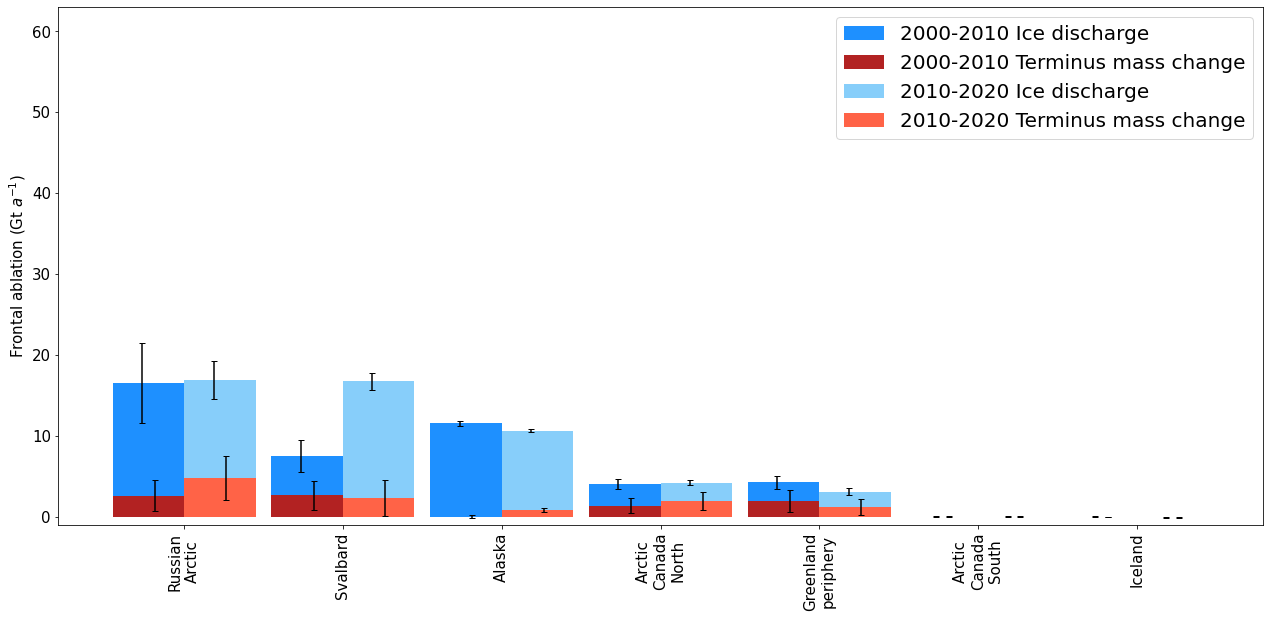

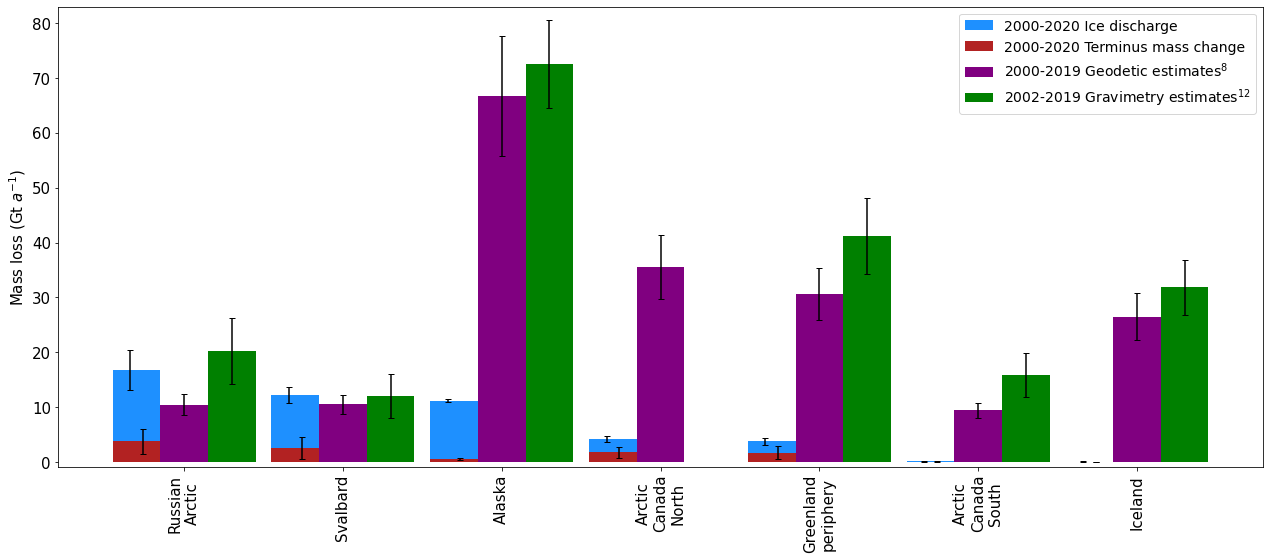

In [7]:
# Arctic_region_fa_plotting = Arctic_discharge_fluxes_with_area_export
#Set up the regional datatable for plotting
df_FA = pd.read_pickle('FA_regional_results'+date_string+'.pkl')
df_Russia = df_FA[(df_FA['region']=='FJL')|(df_FA['region']=='SZ')|(df_FA['region']=='NZ')]
df_FA.loc[len(df_FA),'region']='Russia'
for item in ['FA_early','FA_late','D_early','D_late','TC_early','TC_late','gate_length_km','num_glaciers']:
    df_FA.loc[9,item]=sum(df_Russia[item])
for item in ['FA_early_err','FA_late_err','D_early_err','D_late_err','TC_early_err','TC_late_err']:
    df_FA.loc[9,item]=np.sqrt(sum(df_Russia[item]**2))

df_FA=df_FA[(df_FA['region']!='FJL')&(df_FA['region']!='SZ')&(df_FA['region']!='NZ')]
# Arctic_region_fa_plotting = Arctic_region_fa_plotting[Arctic_region_fa_plotting['Subregion_name']!='Jan Mayen']
# Arctic_region_fa_plotting['Region_name'][(Arctic_region_fa_plotting['Region_name']=='SZ')|(Arctic_region_fa_plotting['Region_name']=='FJL')|(Arctic_region_fa_plotting['Region_name']=='NZ')]='Russia'
# Arctic_region_fa_plotting['Region_name'][(Arctic_region_fa_plotting['Region_name']=='Iceland and Jan Mayen')]='Iceland'
# Arctic_region_fa_plotting = Arctic_region_fa_plotting.groupby('Region_name').sum()[['Frontal_ablation_2010_to_2020_gt_per_yr_mean','Frontal_ablation_2000_to_2010_gt_per_yr_mean','2010_2020_mean_flux_gt','2010_2020_mean_flux_err_gt','terminus_gt_change_per_year_late','terminus_gt_change_per_year_late_area_error','2000_2010_mean_flux_gt','2000_2010_mean_flux_err_gt','terminus_gt_change_per_year_early','terminus_gt_change_per_year_early_area_error']].sort_values(by='Frontal_ablation_2000_to_2010_gt_per_yr_mean')  
df_FA = df_FA.sort_values('FA_late',ascending=False)
# Arctic_region_fa_plotting = Arctic_region_fa_plotting.reset_index()

df_FA['bottom_2000_2010'] = df_FA['TC_early']
df_FA['bottom_2010_2020'] = df_FA['TC_late']

# for i in range(0,len(Arctic_region_fa_plotting)):
#     if Arctic_region_fa_plotting['terminus_gt_change_per_year_early'][i]>0:
#         Arctic_region_fa_plotting['bottom_2000_2010'][i] = 0

# for i in range(0,len(Arctic_region_fa_plotting)):
#     if Arctic_region_fa_plotting['terminus_gt_change_per_year_late'][i]>0:
#         Arctic_region_fa_plotting['bottom_2010_2020'][i] = 0

Arctic_region_fa_plotting = df_FA
Arctic_region_fa_plotting['Region_name']=Arctic_region_fa_plotting['region']

Arctic_region_fa_plotting.rename(columns={
    'D_early':'2000_2010_mean_flux_gt', 'D_early_err':'2000_2010_mean_flux_err_gt', 'D_late':'2010_2020_mean_flux_gt', 'D_late_err':'2010_2020_mean_flux_err_gt', 
    'TC_early':'terminus_gt_change_per_year_early','TC_early_err':'terminus_gt_change_per_year_early_area_error', 'TC_late':'terminus_gt_change_per_year_late', 'TC_late_err':'terminus_gt_change_per_year_late_area_error'}
                                ,inplace=True)
        
        
#Change names of regions
Arctic_region_fa_plotting['Region_name'][Arctic_region_fa_plotting['Region_name']=='Russia']='Russian\nArctic'
Arctic_region_fa_plotting['Region_name'][Arctic_region_fa_plotting['Region_name']=='Greenland']='Greenland\nperiphery'
Arctic_region_fa_plotting['Region_name'][Arctic_region_fa_plotting['Region_name']=='QEI']='Arctic\nCanada\nNorth'
Arctic_region_fa_plotting['Region_name'][Arctic_region_fa_plotting['Region_name']=='BBI']='Arctic\nCanada\nSouth'
Arctic_region_fa_plotting['Region_name'][Arctic_region_fa_plotting['Region_name']=='Svalbard and Jan Mayen']='Svalbard'

Arctic_region_fa_plotting['mean_mean_flux_gt'] = (Arctic_region_fa_plotting['2000_2010_mean_flux_gt']+Arctic_region_fa_plotting['2010_2020_mean_flux_gt'])/2
Arctic_region_fa_plotting['mean_mean_err_gt'] = (Arctic_region_fa_plotting['2000_2010_mean_flux_err_gt']+Arctic_region_fa_plotting['2010_2020_mean_flux_err_gt'])/2
Arctic_region_fa_plotting['terminus_gt_change_per_year_mean'] = (Arctic_region_fa_plotting['terminus_gt_change_per_year_early'] + Arctic_region_fa_plotting['terminus_gt_change_per_year_late'])/2
Arctic_region_fa_plotting['terminus_gt_change_per_year_error_mean'] = (Arctic_region_fa_plotting['terminus_gt_change_per_year_early_area_error']+Arctic_region_fa_plotting['terminus_gt_change_per_year_late_area_error'])/2


#First make the figure with only my data
fig,ax = plt.subplots()
fig.set_figheight(9)
fig.set_figwidth(18)
# plt.figure(figsize=(30,10))
plt.xticks(rotation='vertical',fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Frontal ablation (gt/a)',fontsize=20)
# plt.title('Arctic frontal ablation')

barWidth = .45
bar_position = np.arange(len(Arctic_region_fa_plotting))
cap_width=3

plt.bar(bar_position-barWidth/2,Arctic_region_fa_plotting['2000_2010_mean_flux_gt'],label='2000-2010 Ice discharge',bottom=-Arctic_region_fa_plotting['bottom_2000_2010'],width=barWidth,color='dodgerblue')
plt.bar(bar_position-barWidth/2,-Arctic_region_fa_plotting['terminus_gt_change_per_year_early'],label='2000-2010 Terminus mass change',width=barWidth,color='firebrick')

plt.bar(bar_position+barWidth/2,Arctic_region_fa_plotting['2010_2020_mean_flux_gt'],label='2010-2020 Ice discharge',bottom=-Arctic_region_fa_plotting['bottom_2010_2020'],width=barWidth,color='lightskyblue')
plt.bar(bar_position+barWidth/2,-Arctic_region_fa_plotting['terminus_gt_change_per_year_late'],label='2010-2020 Terminus mass change',width=barWidth,color='tomato')

trans1 = Affine2D().translate(-0.04, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.04, 0.0) + ax.transData

er_late_flux = ax.errorbar(bar_position-barWidth/2,Arctic_region_fa_plotting['2000_2010_mean_flux_gt']-Arctic_region_fa_plotting['bottom_2000_2010'],yerr= Arctic_region_fa_plotting['2000_2010_mean_flux_err_gt'],ecolor='black',capsize=cap_width, linestyle="none", transform=trans1)
er_late_term = ax.errorbar(bar_position-barWidth/2,-Arctic_region_fa_plotting['terminus_gt_change_per_year_early'],yerr= Arctic_region_fa_plotting['terminus_gt_change_per_year_early_area_error'],ecolor='black',capsize=cap_width, linestyle="none", transform=trans2)

er_late_flux = ax.errorbar(bar_position+barWidth/2,Arctic_region_fa_plotting['2010_2020_mean_flux_gt']-Arctic_region_fa_plotting['bottom_2010_2020'],yerr= Arctic_region_fa_plotting['2010_2020_mean_flux_err_gt'],ecolor='black',capsize=cap_width, linestyle="none", transform=trans1)
er_late_term = ax.errorbar(bar_position+barWidth/2,-Arctic_region_fa_plotting['terminus_gt_change_per_year_late'],yerr= Arctic_region_fa_plotting['terminus_gt_change_per_year_late_area_error'],ecolor='black',capsize=cap_width, linestyle="none", transform=trans2)


ax.set_xticks(bar_position)
ax.set_xticklabels(Arctic_region_fa_plotting['Region_name'].unique())

plt.xticks(rotation='vertical',fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frontal ablation (Gt $a^{-1}$)',fontsize=15)

plt.ylim([-1,63])

plt.legend(loc='upper right',fontsize=20)
fig.subplots_adjust(hspace=0.06, wspace=0.01,top = .97, bottom = 0.17, right = .99, left = 0.06)

fig.savefig('figures/2000to2020_components_bars_regions_v17.jpg',format='jpg',dpi=600)   
    
#Now make the figure with Mass balance estiamtes
arctic_mb = pd.read_csv('/Users/willkochtitzky/Projects/Arctic_frontal_ablation/Arctic_Mass_balance_estimates.csv')

fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(18)
# plt.figure(figsize=(30,10))
plt.xticks(rotation='vertical',fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Mass loss (Gt $a^{-1}$)',fontsize=15)
# plt.title('Arctic frontal ablation')
# plt.bar(Arctic_subregion_fa_plotting['Subregion_name'],Arctic_subregion_fa_plotting['Frontal_ablation_2000_to_2010_gt_per_yr_mean'],yerr= Arctic_subregion_fa_plotting['Frontal_ablation_2000_to_2010_gt_per_yr_mean_err'],capsize=5,ecolor='black')   

barWidth = .30
bar_position = np.arange(len(Arctic_region_fa_plotting))
cap_width=3

plt.bar(bar_position-barWidth,Arctic_region_fa_plotting['mean_mean_flux_gt'],label='2000-2020 Ice discharge',bottom=-Arctic_region_fa_plotting['terminus_gt_change_per_year_mean'],width=barWidth,color='dodgerblue')
plt.bar(bar_position-barWidth,-Arctic_region_fa_plotting['terminus_gt_change_per_year_mean'],label='2000-2020 Terminus mass change',width=barWidth,color='firebrick')


# plt.bar(bar_position,Arctic_region_fa_plotting['2010_2018_mean_flux_gt'],label='2010-2020 Discharge',bottom=-Arctic_region_fa_plotting['bottom_2010_2020'],width=barWidth,color='lightskyblue')
# plt.bar(bar_position,-Arctic_region_fa_plotting['terminus_gt_change_per_year_late'],label='2010-2020 Terminus change',width=barWidth,color='tomato')

trans1 = Affine2D().translate(-0.04, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.04, 0.0) + ax.transData

er_early_flux = ax.errorbar(bar_position-barWidth,Arctic_region_fa_plotting['mean_mean_flux_gt']-Arctic_region_fa_plotting['terminus_gt_change_per_year_mean'],yerr= Arctic_region_fa_plotting['mean_mean_err_gt'],ecolor='black',capsize=cap_width, linestyle="none", transform=trans1)
er_early_term = ax.errorbar(bar_position-barWidth,-Arctic_region_fa_plotting['terminus_gt_change_per_year_mean'],yerr= Arctic_region_fa_plotting['terminus_gt_change_per_year_error_mean'],ecolor='black',capsize=cap_width, linestyle="none", transform=trans2)

# er_late_flux = ax.errorbar(bar_position,Arctic_region_fa_plotting['2010_2018_mean_flux_gt']-Arctic_region_fa_plotting['bottom_2010_2020'],yerr= Arctic_region_fa_plotting['2010_2018_mean_err_gt'],ecolor='black',capsize=cap_width, linestyle="none", transform=trans1)
# er_late_term = ax.errorbar(bar_position,-Arctic_region_fa_plotting['terminus_gt_change_per_year_late'],yerr= Arctic_region_fa_plotting['terminus_gt_change_per_year_late_area_error'],ecolor='black',capsize=cap_width, linestyle="none", transform=trans2)

plt.bar(bar_position,-arctic_mb['Hugonnet2021'],yerr=arctic_mb['Hugonnet2021_err'],ecolor='black',capsize=cap_width,label='2000-2019 Geodetic estimates$\mathregular{^8}$',width=barWidth,color='purple')
plt.bar(bar_position+barWidth,-arctic_mb['Ciraci2020'],yerr=arctic_mb['Ciraci_error'],ecolor='black',capsize=cap_width,label='2002-2019 Gravimetry estimates$^{12}$',width=barWidth,color='green')

ax.set_xticks(bar_position)
ax.set_xticklabels(Arctic_region_fa_plotting['Region_name'].unique())

plt.ylim([-1,83])

plt.legend(loc='upper right',fontsize=14)
fig.subplots_adjust(hspace=0.06, wspace=0.01,top = .97, bottom = 0.17, right = .99, left = 0.06)

fig.savefig('figures/2000to2020_components_bars_regions_with_comparison_v27.jpg',format='jpg',dpi=600)

In [8]:
Arctic_region_fa_plotting

,region,FA_early,FA_early_err,FA_late,FA_late_err,2000_2010_mean_flux_gt,2000_2010_mean_flux_err_gt,2010_2020_mean_flux_gt,2010_2020_mean_flux_err_gt,terminus_gt_change_per_year_early,terminus_gt_change_per_year_early_area_error,terminus_gt_change_per_year_late,terminus_gt_change_per_year_late_area_error,gate_length_km,num_glaciers,bottom_2000_2010,bottom_2010_2020,Region_name,mean_mean_flux_gt,mean_mean_err_gt,terminus_gt_change_per_year_mean,terminus_gt_change_per_year_error_mean
9,Russia,16.628459,5.277040,16.917536,3.533413,13.945226,4.924028,12.054475,2.320493,-2.683233,1.897656,-4.863061,2.664642,1842.0,412.0,-2.683233,-4.863061,Russian\nArctic,12.999850,3.622260,-3.773147,2.281149
8,Svalbard and Jan Mayen,7.617491,2.654298,16.816885,2.481380,4.882389,1.978100,14.414962,1.051844,-2.735102,1.769864,-2.401923,2.247415,657.0,166.0,-2.735102,-2.401923,Svalbard,9.648675,1.514972,-2.568512,2.008639
0,Alaska,11.590140,0.392966,10.680662,0.332951,11.494634,0.354058,9.791141,0.180708,-0.095507,0.170487,-0.889521,0.279645,80.0,42.0,-0.095507,-0.889521,Alaska,10.642887,0.267383,-0.492514,0.225066
6,QEI,4.136396,1.114052,4.275447,1.181872,2.681971,0.645519,2.244291,0.328192,-1.454426,0.907974,-2.031156,1.135391,481.0,252.0,-1.454426,-2.031156,Arctic\nCanada\nNorth,2.463131,0.486856,-1.742791,1.021682
3,Greenland,4.305632,1.565904,3.176132,1.090514,2.251698,0.774911,1.881270,0.430582,-2.053934,1.360723,-1.294862,1.001908,697.0,537.0,-2.053934,-1.294862,Greenland\nperiphery,2.066484,0.602746,-1.674398,1.181316
1,BBI,0.088878,0.075245,0.087500,0.075406,0.043441,0.034889,0.028674,0.024221,-0.045437,0.066668,-0.058826,0.071411,40.0,86.0,-0.045437,-0.058826,Arctic\nCanada\nSouth,0.036058,0.029555,-0.052132,0.069039
4,Iceland,0.101617,0.100303,0.026796,0.088645,0.098955,0.097580,0.000601,0.073061,-0.002662,0.023212,-0.026196,0.050200,5.0,1.0,-0.002662,-0.026196,Iceland,0.049778,0.085320,-0.014429,0.036706


In [ ]:
Arctic_region_fa_plotting['Region_name'][Arctic_region_fa_plotting['Region_name']=='BBI']='Canadian Baffin and Bylot Isalnds'

In [13]:
pwd

'/Users/willkochtitzky/bin/Jupyter_notebooks/Arctic/Arctic_discharge'

In [9]:
Arctic_subregion_fa_plotting = Arctic_discharge_fluxes_with_area_export.groupby('Subregion_name').sum()[['Frontal_ablation_2010_to_2020_gt_per_yr_mean','Frontal_ablation_2000_to_2010_gt_per_yr_mean','2010_2018_mean_flux_gt','2010_2018_mean_err_gt','terminus_gt_change_per_year_late','terminus_gt_change_per_year_late_area_error','2000_2010_mean_flux_gt','2000_2010_mean_err_gt','terminus_gt_change_per_year_early','terminus_gt_change_per_year_early_area_error']].sort_values(by='Frontal_ablation_2000_to_2010_gt_per_yr_mean')  
Arctic_subregion_fa_plotting = Arctic_subregion_fa_plotting.reset_index()

Arctic_subregion_fa_plotting['bottom_2000_2010'] = -Arctic_subregion_fa_plotting['2000_2010_mean_flux_gt']
Arctic_subregion_fa_plotting['bottom_2010_2020'] = -Arctic_subregion_fa_plotting['2010_2018_mean_flux_gt']

for i in range(0,len(Arctic_subregion_fa_plotting)):
    if Arctic_subregion_fa_plotting['terminus_gt_change_per_year_early'][i]>0:
        Arctic_subregion_fa_plotting['bottom_2000_2010'][i] = 0

for i in range(0,len(Arctic_subregion_fa_plotting)):
    if Arctic_subregion_fa_plotting['terminus_gt_change_per_year_late'][i]>0:
        Arctic_subregion_fa_plotting['bottom_2010_2020'][i] = 0

fig,ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(30)
# plt.figure(figsize=(30,10))
plt.xticks(rotation='vertical')
plt.ylabel('Mass loss (gt/a)')
plt.title('Northern Hemisphere frontal ablation')
# plt.bar(Arctic_subregion_fa_plotting['Subregion_name'],Arctic_subregion_fa_plotting['Frontal_ablation_2000_to_2010_gt_per_yr_mean'],yerr= Arctic_subregion_fa_plotting['Frontal_ablation_2000_to_2010_gt_per_yr_mean_err'],capsize=5,ecolor='black')   

barWidth = .4
bar_position = np.arange(len(Arctic_subregion_fa_plotting))

plt.bar(bar_position,-Arctic_subregion_fa_plotting['2000_2010_mean_flux_gt'],label='2000-2010 Flux',width=barWidth,color='dodgerblue')
plt.bar(bar_position,Arctic_subregion_fa_plotting['terminus_gt_change_per_year_early'],bottom=Arctic_subregion_fa_plotting['bottom_2000_2010'],label='2000-2010 Terminus change',width=barWidth,color='firebrick')

plt.bar(bar_position+barWidth,-Arctic_subregion_fa_plotting['2010_2018_mean_flux_gt'],label='2010-2020 Flux',width=barWidth,color='lightskyblue')
plt.bar(bar_position+barWidth,Arctic_subregion_fa_plotting['terminus_gt_change_per_year_late'],bottom=Arctic_subregion_fa_plotting['bottom_2010_2020'],label='2010-2020 Terminus change',width=barWidth,color='tomato')

trans1 = Affine2D().translate(-0.06, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.06, 0.0) + ax.transData
cap_width=3

er_late_flux = ax.errorbar(bar_position,-Arctic_subregion_fa_plotting['2000_2010_mean_flux_gt'],yerr= Arctic_subregion_fa_plotting['2000_2010_mean_err_gt'],ecolor='black',capsize=cap_width, linestyle="none", transform=trans1)
er_late_term = ax.errorbar(bar_position,Arctic_subregion_fa_plotting['terminus_gt_change_per_year_early']+Arctic_subregion_fa_plotting['bottom_2000_2010'],yerr= Arctic_subregion_fa_plotting['terminus_gt_change_per_year_early_area_error'],ecolor='black',capsize=cap_width, linestyle="none", transform=trans2)

er_late_flux = ax.errorbar(bar_position+barWidth,-Arctic_subregion_fa_plotting['2010_2018_mean_flux_gt'],yerr= Arctic_subregion_fa_plotting['2010_2018_mean_err_gt'],ecolor='black',capsize=cap_width, linestyle="none", transform=trans1)
er_late_term = ax.errorbar(bar_position+barWidth,Arctic_subregion_fa_plotting['terminus_gt_change_per_year_late']+Arctic_subregion_fa_plotting['bottom_2010_2020'],yerr= Arctic_subregion_fa_plotting['terminus_gt_change_per_year_late_area_error'],ecolor='black',capsize=cap_width, linestyle="none", transform=trans2)


ax.set_xticks(bar_position)
ax.set_xticklabels(Arctic_subregion_fa_plotting['Subregion_name'].unique())

plt.legend(loc='lower right')
fig.subplots_adjust(hspace=0.06, wspace=0.01,top = .97, bottom = 0.18, right = .99, left = 0.03)

fig.savefig('figures/2000to2020_components_bars_subregions_v6.jpg',format='jpg',dpi=600)


KeyError: "['2010_2018_mean_flux_gt', '2010_2018_mean_err_gt', '2000_2010_mean_err_gt'] not in index"

In [ ]:
%matplotlib notebook

fig = plt.figure(figsize=(15,15))

ax1 = plt.subplot(2,2,1)
plt.scatter(Arctic_discharge['Russian_thickness'],Arctic_discharge['Farinotti_thickness'],s=4)
plt.plot([0,400],[0,400],c='black')
plt.title('Russian Arctic RES and other')
plt.xlabel('thickness observations (m)')
plt.ylabel('thickness modeled (m)')

ax2 = plt.subplot(2,2,2)
plt.scatter(Arctic_discharge['THICKNESS'],Arctic_discharge['Farinotti_thickness'],s=4)
plt.plot([0,400],[0,400],c='black')
plt.title('GlaThiDa')
plt.xlabel('thickness observations (m)')
plt.ylabel('thickness modeled (m)')

ax3 = plt.subplot(2,2,3)
plt.scatter(Arctic_discharge['tomo_thickness'],Arctic_discharge['Farinotti_thickness'],s=4)
plt.plot([0,400],[0,400],c='black')
plt.title('Tomography observations in QEI')
plt.xlabel('thickness observations (m)')
plt.ylabel('thickness modeled (m)')

ax4 = plt.subplot(2,2,4,projection=ccrs.Orthographic(central_longitude=0, central_latitude=90))

im_GlaThiDa = Arctic_discharge[Arctic_discharge['THICKNESS'].notna()].plot(
    ax=ax4,
    markersize=40, 
    color = 'orange',
#     column=Arctic_discharge_fluxes_with_area_export['region'],
    transform=ccrs.epsg('3995'),
)

im_Russia = Arctic_discharge[Arctic_discharge['Russian_thickness']>0].plot(
    ax=ax4,
    markersize=40, 
    color = 'red',
#     column=Arctic_discharge_fluxes_with_area_export['region'],
    transform=ccrs.epsg('3995'),
)

im_tomo = Arctic_discharge[Arctic_discharge['tomo_thickness']>0].plot(
    ax=ax4,
    markersize=40,
    color = 'yellow',
#     column=Arctic_discharge_fluxes_with_area_export['region'],
    transform=ccrs.epsg('3995'),
)

ax4.coastlines(linewidth=.25)
ax4.legend(['GlaThiDa','Russia RES','CAA Tomography'])

ax1.set_aspect('auto', adjustable='box')
ax2.set_aspect('auto', adjustable='box')
ax3.set_aspect('auto', adjustable='box')
ax4.set_aspect('auto', adjustable='box')

fig.subplots_adjust(hspace=0.12, wspace=0.01,top = .97, bottom = 0.04, right = .99, left = 0.05)


fig = plt.gcf()
fig.savefig('figures/thickness_bias_farinotti.jpg',format='jpg',dpi=600)

In [9]:
#frontal ablation of hubbard and columbia
Arctic_discharge_fluxes_with_area_export.sort_values('Frontal_ablation_2000_to_2010_gt_per_yr_mean').tail(2).sum()[['Frontal_ablation_2010_to_2020_gt_per_yr_mean']]

/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Frontal_ablation_2010_to_2020_gt_per_yr_mean    6.723657
dtype: object

In [18]:
Arctic_discharge_fluxes_with_area_export.groupby('region').mean()[['Frontal_ablation_2000_to_2010_gt_per_yr_mean']]

,Frontal_ablation_2000_to_2010_gt_per_yr_mean
region,
Alaska,0.270477
BBI,0.001014
FJL,0.039961
Greenland,0.008108
Iceland,0.109139
NZ,0.068672
QEI,0.016405
SZ,0.100180
Svalbard and Jan Mayen,0.052041


In [19]:
#Terminus volume change as portion of total frontal ablation
for region in Arctic_discharge_fluxes_with_area_export['region'].unique():
    print(region)
    print(-Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['region']==region]['terminus_gt_change_per_year_late'].sum()/Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['region']==region]['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum()*100)

Alaska
8.512624088698605
QEI
47.67477866988193
BBI
68.1199902606905
Greenland
40.42690130974269
Iceland
59.83304998250042
Svalbard and Jan Mayen
14.114044778289262
FJL
33.620751628459615
NZ
24.1514248971554
SZ
19.25105470709347


In [38]:
Arctic_discharge_fluxes_with_area_export['region']

0       Alaska
1       Alaska
2       Alaska
3       Alaska
4       Alaska
         ...  
1491       FJL
1492       FJL
1493       FJL
1494       FJL
1495       FJL
Name: region, Length: 1496, dtype: object

In [5]:
#retained in terminus advance and retreat
print('retained by termini',Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']>0]['terminus_gt_change_per_year_late'].sum())
print('retained by termini err',Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']>0]['terminus_gt_change_per_year_late_area_error'].sum())

print('lost by termini',Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']<0]['terminus_gt_change_per_year_late'].sum())
print('lost by termini err',Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']<0]['terminus_gt_change_per_year_late_area_error'].sum())

retained by termini 2.8902329166476672
retained by termini err 0.6144548753993191
lost by termini -14.249013536211601
lost by termini err 7.3879339182550625


In [39]:
#frontal ablation terminus advance
print('advancer frontal ablation early',Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_early']>0]['Frontal_ablation_2000_to_2010_gt_per_yr_mean'].sum())
print('advancer frontal ablationy early err',Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_early']>0]['Frontal_ablation_2000_to_2010_gt_per_yr_mean_err'].sum())

print('advancer frontal ablation late',Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']>0]['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum())
print('advancer frontal ablation late err',Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']>0]['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err'].sum())


advancer frontal ablation early 8.476866303976621
advancer frontal ablationy early err 0.9381886015669937
advancer frontal ablation late 12.574213677393342
advancer frontal ablation late err 0.8904578813698356


In [26]:
#glaciers that advanced and are surge type

surge_advancers = net_area_change[(net_area_change['net_area_change_total']-net_area_change['net_area_change_total_error'])>0].sort_values('net_area_change_total')[['Name','net_area_change_total','geometry']]
surge_advancers.loc[surge_advancers['Name']=='Vavilov Ice Cap (October Revolution Island)','surge']=1
surge_advancers.loc[surge_advancers['Name']=='Austfonna basin 3','surge']=1
surge_advancers.loc[surge_advancers['Name']=='Dobrowolski, Nathorst, Zawadski, Polakk-breen','surge']=1
surge_advancers.loc[surge_advancers['Name']=='Austfonna','surge']=1
surge_advancers.loc[surge_advancers['Name']=='Wahlenbergbreen','surge']=1
surge_advancers.loc[surge_advancers['Name']=='Academy of Sciences Ice Cap (Komsomolets Island)','surge']=1
surge_advancers.loc[surge_advancers['Name']=='Parrish','surge']=1
surge_advancers.loc[surge_advancers['Name']=='Good Friday Bay','surge']=1
surge_advancers.loc[surge_advancers['Name']=='Strongbreen','surge']=1
surge_advancers.loc[surge_advancers['Name']=='Comfortlessbreen','surge']=1
surge_advancers.loc[surge_advancers['Name']=='Tunabreen','surge']=1
surge_advancers.loc[surge_advancers['Name']=='Franklinbreen','surge']=1
surge_advancers.loc[surge_advancers['Name']=='Dobbin Bay','surge']=1
surge_advancers.loc[surge_advancers['Name']=='North Island Novaya Zemlya','surge']=1
surge_advancers.loc[surge_advancers['Name']=='Franklinbreen N','surge']=1
surge_advancers.loc[surge_advancers['Name']=='John Richardson Bay South','surge']=1
surge_advancers.loc[surge_advancers['Name']=='Turner Glacier','surge']=1
surge_advancers.loc[surge_advancers['Name']=='Grand Pacific and Ferris Glaciers','surge']=1
surge_advancers.loc[surge_advancers['Name']=='Bakaninbreen, Paulabreen, and Skobreen','surge']=1
surge_advancers.loc[surge_advancers['Name']=='Markhambreen','surge']=1
surge_advancers.loc[surge_advancers['Name']=='Anuchin','surge']=1
print(surge_advancers['surge'].sum())
surge_advancers.loc[(surge_advancers['net_area_change_total']<0.26)&(surge_advancers['net_area_change_total']>0.24),'surge']=1
print(surge_advancers['surge'].sum())

NameError: name 'net_area_change' is not defined

In [17]:
Arctic_discharge_fluxes_with_area_export.sort_values('Frontal_ablation_2000_to_2010_gt_per_yr_mean').tail(3)

,RGIId,2000_2010_mean_flux_gt,2000_2010_mean_flux_err_gt,2010_2020_mean_flux_gt,2010_2020_mean_flux_err_gt,Name_x,Area,Zmin,Zmax,Zmed,Slope,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Milan_thickness_min,region,Milan_thickness_max,do_we_have_an_observation_in_middle_fifth,easting,northing,Milan_thickness_mean,0000_v,best_thickness_mean,thickness_mean_uncertainty,length_early_avg,length_early_avg_err,length_late_avg,length_late_avg_err,2000_2010_mean,2000_2010_mean_err,2000_2010_mean_count,2010_2018_mean,2010_2018_mean_err,2010_2018_mean_count,best_thickness_early,best_thickness_early_err,best_thickness_late,best_thickness_late_err,number_velocity_obs_early,number_velocity_obs_late,num_pts,GlaThiDa_observations,Tomography_observations,Russian_observations,gate_length_km,RGIid_2_1,area_below_fluxgate_early,area_below_fluxgate_middle,area_below_fluxgate_late,average_distance_from_fluxgate_to_terminus_early,average_distance_from_fluxgate_to_terminus_middle,average_distance_from_fluxgate_to_terminus_late,RGIid_original,RGIId_y,Melt_early_avg,Melt_late_avg,Melt_early_avg_err,Melt_late_avg_err,Melt_fluxes_from_regional_estimate,Melt_total_avg,Melt_total_avg_err,level_0,index,area_km2_gained_total,perimeter_gained_total,perimeter_error_gained_total,area_km2_lost_total,perimeter_lost_total,perimeter_error_lost_total,area_km2_lost_early,perimeter_lost_early,perimeter_error_lost_early,area_km2_gained_early,perimeter_gained_early,perimeter_error_gained_early,area_km2_lost_late,perimeter_lost_late,perimeter_error_lost_late,area_km2_gained_late,perimeter_gained_late,perimeter_error_gained_late,Early_satellite_id,Middle_satellite_id,Late_satellite_id,Early_date,Mid_date,Late_date,Early_date_decimal_year,Middle_date_decimal_year,Late_date_decimal_year,total_years_elapsed,early_to_middle_years_elapsed,middle_to_late_years_elapsed,net_area_change_total,net_area_change_total_error,...,average_Milan_thickness_lost_late_err,average_Milan_thickness_gained_late_err,average_Milan_thickness_lost_total,average_Milan_thickness_gained_total,average_Milan_thickness_lost_total_err,average_Milan_thickness_gained_total_err,average_tomo_thickness_lost_early,average_tomo_thickness_gained_early,average_tomo_thickness_lost_late,average_tomo_thickness_gained_late,average_tomo_thickness_lost_total,average_tomo_thickness_gained_total,average_Milan_thickness_gained_early_debiased,average_Milan_thickness_lost_early_debiased,average_Milan_thickness_gained_late_debiased,average_Milan_thickness_lost_late_debiased,average_Milan_thickness_gained_total_debiased,average_Milan_thickness_lost_total_debiased,thickness_for_area_lost_early,thickness_for_area_lost_early_err,thickness_for_area_gained_early,thickness_for_area_gained_early_err,thickness_for_area_lost_late,thickness_for_area_lost_late_err,thickness_for_area_gained_late,thickness_for_area_gained_late_err,thickness_for_area_lost_total,thickness_for_area_lost_total_err,thickness_for_area_gained_total,thickness_for_area_gained_total_err,thickness_for_area_lost_early_err_fullycorr,thickness_for_area_gained_early_err_fullycorr,thickness_for_area_lost_late_err_fullycorr,thickness_for_area_gained_late_err_fullycorr,thickness_for_area_lost_total_err_fullycorr,thickness_for_area_gained_total_err_fullycorr,area_flux_gt_gained_early,area_flux_gt_gained_early_error,area_flux_gt_lost_early,area_flux_gt_lost_early_error,area_flux_gt_gained_late,area_flux_gt_gained_late_error,area_flux_gt_lost_late,area_flux_gt_lost_late_error,area_flux_gt_gained_total,area_flux_gt_gained_total_error,area_flux_gt_lost_total,area_flux_gt_lost_total_error,terminus_gt_change_per_year_early_without_melt,terminus_gt_change_per_year_early_area_error_without_melt,terminus_gt_change_per_year_late_without_melt,terminus_gt_change_per_year_late_area_error_without_melt,terminus_gt_change_per_year_total_without_melt,terminus_gt_change_per_year_total_area_error_without_melt,2000_2010_mean_flux_gt_without_melt,2000_2010_mean_flux_err_gt_without_melt,

In [18]:
Arctic_discharge_fluxes_with_area_export.sort_values('Frontal_ablation_2010_to_2020_gt_per_yr_mean').tail(3)

,RGIId,2000_2010_mean_flux_gt,2000_2010_mean_flux_err_gt,2010_2020_mean_flux_gt,2010_2020_mean_flux_err_gt,Name_x,Area,Zmin,Zmax,Zmed,Slope,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Milan_thickness_min,region,Milan_thickness_max,do_we_have_an_observation_in_middle_fifth,easting,northing,Milan_thickness_mean,0000_v,best_thickness_mean,thickness_mean_uncertainty,length_early_avg,length_early_avg_err,length_late_avg,length_late_avg_err,2000_2010_mean,2000_2010_mean_err,2000_2010_mean_count,2010_2018_mean,2010_2018_mean_err,2010_2018_mean_count,best_thickness_early,best_thickness_early_err,best_thickness_late,best_thickness_late_err,number_velocity_obs_early,number_velocity_obs_late,num_pts,GlaThiDa_observations,Tomography_observations,Russian_observations,gate_length_km,RGIid_2_1,area_below_fluxgate_early,area_below_fluxgate_middle,area_below_fluxgate_late,average_distance_from_fluxgate_to_terminus_early,average_distance_from_fluxgate_to_terminus_middle,average_distance_from_fluxgate_to_terminus_late,RGIid_original,RGIId_y,Melt_early_avg,Melt_late_avg,Melt_early_avg_err,Melt_late_avg_err,Melt_fluxes_from_regional_estimate,Melt_total_avg,Melt_total_avg_err,level_0,index,area_km2_gained_total,perimeter_gained_total,perimeter_error_gained_total,area_km2_lost_total,perimeter_lost_total,perimeter_error_lost_total,area_km2_lost_early,perimeter_lost_early,perimeter_error_lost_early,area_km2_gained_early,perimeter_gained_early,perimeter_error_gained_early,area_km2_lost_late,perimeter_lost_late,perimeter_error_lost_late,area_km2_gained_late,perimeter_gained_late,perimeter_error_gained_late,Early_satellite_id,Middle_satellite_id,Late_satellite_id,Early_date,Mid_date,Late_date,Early_date_decimal_year,Middle_date_decimal_year,Late_date_decimal_year,total_years_elapsed,early_to_middle_years_elapsed,middle_to_late_years_elapsed,net_area_change_total,net_area_change_total_error,...,average_Milan_thickness_lost_late_err,average_Milan_thickness_gained_late_err,average_Milan_thickness_lost_total,average_Milan_thickness_gained_total,average_Milan_thickness_lost_total_err,average_Milan_thickness_gained_total_err,average_tomo_thickness_lost_early,average_tomo_thickness_gained_early,average_tomo_thickness_lost_late,average_tomo_thickness_gained_late,average_tomo_thickness_lost_total,average_tomo_thickness_gained_total,average_Milan_thickness_gained_early_debiased,average_Milan_thickness_lost_early_debiased,average_Milan_thickness_gained_late_debiased,average_Milan_thickness_lost_late_debiased,average_Milan_thickness_gained_total_debiased,average_Milan_thickness_lost_total_debiased,thickness_for_area_lost_early,thickness_for_area_lost_early_err,thickness_for_area_gained_early,thickness_for_area_gained_early_err,thickness_for_area_lost_late,thickness_for_area_lost_late_err,thickness_for_area_gained_late,thickness_for_area_gained_late_err,thickness_for_area_lost_total,thickness_for_area_lost_total_err,thickness_for_area_gained_total,thickness_for_area_gained_total_err,thickness_for_area_lost_early_err_fullycorr,thickness_for_area_gained_early_err_fullycorr,thickness_for_area_lost_late_err_fullycorr,thickness_for_area_gained_late_err_fullycorr,thickness_for_area_lost_total_err_fullycorr,thickness_for_area_gained_total_err_fullycorr,area_flux_gt_gained_early,area_flux_gt_gained_early_error,area_flux_gt_lost_early,area_flux_gt_lost_early_error,area_flux_gt_gained_late,area_flux_gt_gained_late_error,area_flux_gt_lost_late,area_flux_gt_lost_late_error,area_flux_gt_gained_total,area_flux_gt_gained_total_error,area_flux_gt_lost_total,area_flux_gt_lost_total_error,terminus_gt_change_per_year_early_without_melt,terminus_gt_change_per_year_early_area_error_without_melt,terminus_gt_change_per_year_late_without_melt,terminus_gt_change_per_year_late_area_error_without_melt,terminus_gt_change_per_year_total_without_melt,terminus_gt_change_per_year_total_area_error_without_melt,2000_2010_mean_flux_gt_without_melt,2000_2010_mean_flux_err_gt_without_melt,

In [45]:
Arctic_discharge_fluxes_with_area_export.sort_values('2010_2020_mean_flux_gt').tail(5)

,RGIId,2000_2010_mean_flux_gt,2000_2010_mean_flux_err_gt,2010_2020_mean_flux_gt,2010_2020_mean_flux_err_gt,Name_x,Area,Zmin,Zmax,Zmed,Slope,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Milan_thickness_min,region,Milan_thickness_max,do_we_have_an_observation_in_middle_fifth,easting,northing,Milan_thickness_mean,0000_v,best_thickness_mean,thickness_mean_uncertainty,length_early_avg,length_early_avg_err,length_late_avg,length_late_avg_err,2000_2010_mean,2000_2010_mean_err,2000_2010_mean_count,2010_2018_mean,2010_2018_mean_err,2010_2018_mean_count,best_thickness_early,best_thickness_early_err,best_thickness_late,best_thickness_late_err,number_velocity_obs_early,number_velocity_obs_late,num_pts,GlaThiDa_observations,Tomography_observations,Russian_observations,gate_length_km,RGIid_2_1,area_below_fluxgate_early,area_below_fluxgate_middle,area_below_fluxgate_late,average_distance_from_fluxgate_to_terminus_early,average_distance_from_fluxgate_to_terminus_middle,average_distance_from_fluxgate_to_terminus_late,RGIid_original,RGIId_y,Melt_early_avg,Melt_late_avg,Melt_early_avg_err,Melt_late_avg_err,Melt_fluxes_from_regional_estimate,Melt_total_avg,Melt_total_avg_err,level_0,index,area_km2_gained_total,perimeter_gained_total,perimeter_error_gained_total,area_km2_lost_total,perimeter_lost_total,perimeter_error_lost_total,area_km2_lost_early,perimeter_lost_early,perimeter_error_lost_early,area_km2_gained_early,perimeter_gained_early,perimeter_error_gained_early,area_km2_lost_late,perimeter_lost_late,perimeter_error_lost_late,area_km2_gained_late,perimeter_gained_late,perimeter_error_gained_late,Early_satellite_id,Middle_satellite_id,Late_satellite_id,Early_date,Mid_date,Late_date,Early_date_decimal_year,Middle_date_decimal_year,Late_date_decimal_year,total_years_elapsed,early_to_middle_years_elapsed,middle_to_late_years_elapsed,net_area_change_total,net_area_change_total_error,...,average_Milan_thickness_lost_late_err,average_Milan_thickness_gained_late_err,average_Milan_thickness_lost_total,average_Milan_thickness_gained_total,average_Milan_thickness_lost_total_err,average_Milan_thickness_gained_total_err,average_tomo_thickness_lost_early,average_tomo_thickness_gained_early,average_tomo_thickness_lost_late,average_tomo_thickness_gained_late,average_tomo_thickness_lost_total,average_tomo_thickness_gained_total,average_Milan_thickness_gained_early_debiased,average_Milan_thickness_lost_early_debiased,average_Milan_thickness_gained_late_debiased,average_Milan_thickness_lost_late_debiased,average_Milan_thickness_gained_total_debiased,average_Milan_thickness_lost_total_debiased,thickness_for_area_lost_early,thickness_for_area_lost_early_err,thickness_for_area_gained_early,thickness_for_area_gained_early_err,thickness_for_area_lost_late,thickness_for_area_lost_late_err,thickness_for_area_gained_late,thickness_for_area_gained_late_err,thickness_for_area_lost_total,thickness_for_area_lost_total_err,thickness_for_area_gained_total,thickness_for_area_gained_total_err,thickness_for_area_lost_early_err_fullycorr,thickness_for_area_gained_early_err_fullycorr,thickness_for_area_lost_late_err_fullycorr,thickness_for_area_gained_late_err_fullycorr,thickness_for_area_lost_total_err_fullycorr,thickness_for_area_gained_total_err_fullycorr,area_flux_gt_gained_early,area_flux_gt_gained_early_error,area_flux_gt_lost_early,area_flux_gt_lost_early_error,area_flux_gt_gained_late,area_flux_gt_gained_late_error,area_flux_gt_lost_late,area_flux_gt_lost_late_error,area_flux_gt_gained_total,area_flux_gt_gained_total_error,area_flux_gt_lost_total,area_flux_gt_lost_total_error,terminus_gt_change_per_year_early_without_melt,terminus_gt_change_per_year_early_area_error_without_melt,terminus_gt_change_per_year_late_without_melt,terminus_gt_change_per_year_late_area_error_without_melt,terminus_gt_change_per_year_total_without_melt,terminus_gt_change_per_year_total_area_error_without_melt,2000_2010_mean_flux_gt_without_melt,2000_2010_mean_flux_err_gt_without_melt,

In [5]:
Arctic_discharge_fluxes_with_area_export.head()
print('2000-2010 FA (gt/a):',Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean'].sum(),'±',Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean_err'].sum()) 
print('2010-2020 FA (gt/a):',Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum(),'±',Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err'].sum()) 
print('2000-2020 FA (gt/a):',(Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum()+Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean'].sum())/2,'±',(Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err'].sum()+Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean_err'].sum())/2)    
print()
print('2000-2010 terminus volume change (gt/a):',Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_early'].sum(),'±',Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_early_area_error'].sum()) 
print('2010-2020 terminus volume change (gt/a):',Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late'].sum(),'±',Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late_area_error'].sum()) 
print('2000-2020 terminus volume change (gt/a):',(Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late'].sum()+Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_early'].sum())/2,'±',(Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late_area_error'].sum()+Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_early_area_error'].sum())/2)    
print()
print('2000-2010 area loss (km2):',Arctic_discharge_fluxes_with_area_export['net_area_change_per_year_early'].sum(),'±',Arctic_discharge_fluxes_with_area_export['net_area_change_per_year_early_error'].sum()) 
print('2010-2020 area loss (km2):',Arctic_discharge_fluxes_with_area_export['net_area_change_per_year_late'].sum(),'±',Arctic_discharge_fluxes_with_area_export['net_area_change_per_year_late_error'].sum()) 
print()
for region in Arctic_discharge_fluxes_with_area_export['Region_name'].unique():
    print(region)
    print('2000-2010 FA (gt/a):',Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['region']==region]['Frontal_ablation_2000_to_2010_gt_per_yr_mean'].sum(),'±',Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['region']==region]['Frontal_ablation_2000_to_2010_gt_per_yr_mean_err'].sum()) 
    print('2010-2020 FA (gt/a):',Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['region']==region]['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum(),'±',Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['region']==region]['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err'].sum()) 


2000-2010 discharge (gt/a): 48.97668766179603 ± 19.568770914786434
2010-2020 discharge (gt/a): 53.15424047054356 ± 12.098897742141272
2000-2020 discharge (gt/a): 51.065464066169795 ± 15.833834328463853

2000-2010 terminus volume change (gt/a): -9.06885750705494 ± 6.5587373374694184
2010-2020 terminus volume change (gt/a): -11.564570476848576 ± 8.222395476989245
2000-2020 terminus volume change (gt/a): -10.316713991951758 ± 7.390566407229332

2000-2010 area loss (km2): -146.83451011819363 ± 37.23038048800679
2010-2020 area loss (km2): -150.43879122867907 ± 39.79730497685841

Alaska
2000-2010 FA (gt/a): 11.360026911172572 ± 0.4864091117219108
2010-2020 FA (gt/a): 10.468215256670147 ± 0.35690971143811445
QEI
2000-2010 FA (gt/a): 4.1340745797159535 ± 1.465137261463633
2010-2020 FA (gt/a): 4.260373099505375 ± 1.2950298931531088
BBI
2000-2010 FA (gt/a): 0.08719261121602725 ± 0.07237528733511855
2010-2020 FA (gt/a): 0.08635617311619509 ± 0.06592088223410308
Greenland
2000-2010 FA (gt/a): 4.35

In [ ]:
Arctic_discharge_fluxes_with_area_export.sum()[['melt_correct_gt_early','melt_correct_gt_late','melt_correct_gt_early_err','melt_correct_gt_late_err']]

In [ ]:
Arctic_discharge_fluxes_with_area_export.groupby('Region_name').sum()[['melt_correct_gt_early','melt_correct_gt_late','melt_correct_gt_early_err','melt_correct_gt_late_err']]

In [ ]:
Arctic_discharge_fluxes_with_area_export.sort_values('terminus_gt_change_per_year_late')[['Name_x','terminus_gt_change_per_year_late','terminus_gt_change_per_year_late_area_error','2010_2020_mean_flux_gt','2010_2020_mean_flux_err_gt']]

In [21]:
#Matusevich ice shelf changes
Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['RGIId']=='RGI60-09.00515_2')|
                                        (Arctic_discharge_fluxes_with_area_export['RGIId']=='RGI60-09.00498_3')|
                                        (Arctic_discharge_fluxes_with_area_export['RGIId']=='RGI60-09.00498_2')|
                                        (Arctic_discharge_fluxes_with_area_export['RGIId']=='RGI60-09.00498')|
                                        (Arctic_discharge_fluxes_with_area_export['RGIId']=='RGI60-09.00515')|
                                        (Arctic_discharge_fluxes_with_area_export['RGIId']=='RGI60-09.00968_2')|
                                        (Arctic_discharge_fluxes_with_area_export['RGIId']=='RGI60-09.00968')|
                                        (Arctic_discharge_fluxes_with_area_export['RGIId']=='RGI60-09.00967')].sum()[['terminus_gt_change_per_year_late','terminus_gt_change_per_year_late_area_error',
                                                                                                                      '2010_2020_mean_flux_gt','2010_2020_mean_flux_err_gt','net_area_change_per_year_late','net_area_change_per_year_late_error',     
                                                                                                                     'Frontal_ablation_2000_to_2010_gt_per_yr_mean','Frontal_ablation_2000_to_2010_gt_per_yr_mean_err',
                                                                                                                      'Frontal_ablation_2010_to_2020_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err',]]

/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == '__main__':


terminus_gt_change_per_year_late                   -1.534604
terminus_gt_change_per_year_late_area_error         0.152412
2010_2020_mean_flux_gt                              0.351554
2010_2020_mean_flux_err_gt                          0.050582
net_area_change_per_year_late                      -18.90567
net_area_change_per_year_late_error                 0.542829
Frontal_ablation_2000_to_2010_gt_per_yr_mean        0.216048
Frontal_ablation_2000_to_2010_gt_per_yr_mean_err     0.16356
Frontal_ablation_2010_to_2020_gt_per_yr_mean        1.886158
Frontal_ablation_2010_to_2020_gt_per_yr_mean_err    0.175232
dtype: object

In [16]:
#Matusevich ice shelf changes
matu = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['RGIId']=='RGI60-09.00515_2')|
                                        (Arctic_discharge_fluxes_with_area_export['RGIId']=='RGI60-09.00498_3')|
                                        (Arctic_discharge_fluxes_with_area_export['RGIId']=='RGI60-09.00498_2')|
                                        (Arctic_discharge_fluxes_with_area_export['RGIId']=='RGI60-09.00498')|
                                        (Arctic_discharge_fluxes_with_area_export['RGIId']=='RGI60-09.00515')|
                                        (Arctic_discharge_fluxes_with_area_export['RGIId']=='RGI60-09.00968_2')|
                                        (Arctic_discharge_fluxes_with_area_export['RGIId']=='RGI60-09.00968')|
                                        (Arctic_discharge_fluxes_with_area_export['RGIId']=='RGI60-09.00967')][['terminus_gt_change_per_year_late','terminus_gt_change_per_year_late_area_error',
                                                                                                                      '2010_2020_mean_flux_gt','2010_2020_mean_flux_err_gt','net_area_change_per_year_late','net_area_change_per_year_late_error',     
                                                                                                                     'Frontal_ablation_2000_to_2010_gt_per_yr_mean','Frontal_ablation_2000_to_2010_gt_per_yr_mean_err',
                                                                                                                      'Frontal_ablation_2010_to_2020_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err',]]

In [20]:
(matu).sum()

terminus_gt_change_per_year_late                    -1.534604
terminus_gt_change_per_year_late_area_error          0.152412
2010_2020_mean_flux_gt                               0.352493
2010_2020_mean_flux_err_gt                           0.043544
net_area_change_per_year_late                      -18.905670
net_area_change_per_year_late_error                  0.542830
Frontal_ablation_2000_to_2010_gt_per_yr_mean         0.199415
Frontal_ablation_2000_to_2010_gt_per_yr_mean_err     0.153158
Frontal_ablation_2010_to_2020_gt_per_yr_mean         1.887098
Frontal_ablation_2010_to_2020_gt_per_yr_mean_err     0.170233
dtype: float64

In [22]:
np.sqrt((matu**2).sum())

terminus_gt_change_per_year_late                     1.120430
terminus_gt_change_per_year_late_area_error          0.099829
2010_2020_mean_flux_gt                               0.252920
2010_2020_mean_flux_err_gt                           0.019409
net_area_change_per_year_late                       13.014358
net_area_change_per_year_late_error                  0.284765
Frontal_ablation_2000_to_2010_gt_per_yr_mean         0.120876
Frontal_ablation_2000_to_2010_gt_per_yr_mean_err     0.092995
Frontal_ablation_2010_to_2020_gt_per_yr_mean         1.371888
Frontal_ablation_2010_to_2020_gt_per_yr_mean_err     0.101698
dtype: float64

In [ ]:
Arctic_discharge_fluxes_with_area_export.sort_values('terminus_gt_change_per_year_late').head(100).sum()[['Name_x','terminus_gt_change_per_year_late','terminus_gt_change_per_year_late_area_error','2010_2020_mean_flux_gt','2010_2020_mean_flux_err_gt']]

In [ ]:
Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']>0].sum()[['terminus_gt_change_per_year_late','terminus_gt_change_per_year_late_area_error','2010_2020_mean_flux_gt','2010_2020_mean_flux_err_gt']]

In [ ]:
Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']<0].sum()[['terminus_gt_change_per_year_late','terminus_gt_change_per_year_late_area_error','2010_2020_mean_flux_gt','2010_2020_mean_flux_err_gt']]

In [8]:
Arctic_discharge_fluxes_with_area_export['2010_2020_mean_flux_err_gt']-Arctic_discharge_fluxes_with_area_export['2000_2010_mean_flux_err_gt']

0      -0.006300
1      -0.002257
2       0.001624
3      -0.004120
4       0.000080
          ...   
1491   -0.027151
1492   -0.004577
1493   -0.004978
1494   -0.082139
1495   -0.005655
Length: 1496, dtype: float64

In [13]:

Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['2010_2020_mean_flux_gt']-Arctic_discharge_fluxes_with_area_export['2000_2010_mean_flux_gt'])>1]

,RGIId,2000_2010_mean_flux_gt,2000_2010_mean_flux_err_gt,2010_2020_mean_flux_gt,2010_2020_mean_flux_err_gt,Name_x,Area,Zmin,Zmax,Zmed,Slope,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Milan_thickness_min,region,Milan_thickness_max,do_we_have_an_observation_in_middle_fifth,easting,northing,Milan_thickness_mean,0000_v,best_thickness_mean,thickness_mean_uncertainty,length_early_avg,length_early_avg_err,length_late_avg,length_late_avg_err,2000_2010_mean,2000_2010_mean_err,2000_2010_mean_count,2010_2018_mean,2010_2018_mean_err,2010_2018_mean_count,best_thickness_early,best_thickness_early_err,best_thickness_late,best_thickness_late_err,number_velocity_obs_early,number_velocity_obs_late,num_pts,GlaThiDa_observations,Tomography_observations,Russian_observations,gate_length_km,RGIid_2_1,area_below_fluxgate_early,area_below_fluxgate_middle,area_below_fluxgate_late,average_distance_from_fluxgate_to_terminus_early,average_distance_from_fluxgate_to_terminus_middle,average_distance_from_fluxgate_to_terminus_late,RGIid_original,RGIId_y,Melt_early_avg,Melt_late_avg,Melt_early_avg_err,Melt_late_avg_err,Melt_fluxes_from_regional_estimate,Melt_total_avg,Melt_total_avg_err,level_0,index,area_km2_gained_total,perimeter_gained_total,perimeter_error_gained_total,area_km2_lost_total,perimeter_lost_total,perimeter_error_lost_total,area_km2_lost_early,perimeter_lost_early,perimeter_error_lost_early,area_km2_gained_early,perimeter_gained_early,perimeter_error_gained_early,area_km2_lost_late,perimeter_lost_late,perimeter_error_lost_late,area_km2_gained_late,perimeter_gained_late,perimeter_error_gained_late,Early_satellite_id,Middle_satellite_id,Late_satellite_id,Early_date,Mid_date,Late_date,Early_date_decimal_year,Middle_date_decimal_year,Late_date_decimal_year,total_years_elapsed,early_to_middle_years_elapsed,middle_to_late_years_elapsed,net_area_change_total,net_area_change_total_error,...,average_Milan_thickness_lost_late_err,average_Milan_thickness_gained_late_err,average_Milan_thickness_lost_total,average_Milan_thickness_gained_total,average_Milan_thickness_lost_total_err,average_Milan_thickness_gained_total_err,average_tomo_thickness_lost_early,average_tomo_thickness_gained_early,average_tomo_thickness_lost_late,average_tomo_thickness_gained_late,average_tomo_thickness_lost_total,average_tomo_thickness_gained_total,average_Milan_thickness_gained_early_debiased,average_Milan_thickness_lost_early_debiased,average_Milan_thickness_gained_late_debiased,average_Milan_thickness_lost_late_debiased,average_Milan_thickness_gained_total_debiased,average_Milan_thickness_lost_total_debiased,thickness_for_area_lost_early,thickness_for_area_lost_early_err,thickness_for_area_gained_early,thickness_for_area_gained_early_err,thickness_for_area_lost_late,thickness_for_area_lost_late_err,thickness_for_area_gained_late,thickness_for_area_gained_late_err,thickness_for_area_lost_total,thickness_for_area_lost_total_err,thickness_for_area_gained_total,thickness_for_area_gained_total_err,thickness_for_area_lost_early_err_fullycorr,thickness_for_area_gained_early_err_fullycorr,thickness_for_area_lost_late_err_fullycorr,thickness_for_area_gained_late_err_fullycorr,thickness_for_area_lost_total_err_fullycorr,thickness_for_area_gained_total_err_fullycorr,area_flux_gt_gained_early,area_flux_gt_gained_early_error,area_flux_gt_lost_early,area_flux_gt_lost_early_error,area_flux_gt_gained_late,area_flux_gt_gained_late_error,area_flux_gt_lost_late,area_flux_gt_lost_late_error,area_flux_gt_gained_total,area_flux_gt_gained_total_error,area_flux_gt_lost_total,area_flux_gt_lost_total_error,terminus_gt_change_per_year_early_without_melt,terminus_gt_change_per_year_early_area_error_without_melt,terminus_gt_change_per_year_late_without_melt,terminus_gt_change_per_year_late_area_error_without_melt,terminus_gt_change_per_year_total_without_melt,terminus_gt_change_per_year_total_area_error_without_melt,2000_2010_mean_flux_gt_without_melt,2000_2010_mean_flux_err_gt_without_melt,

In [ ]:
#Southern Ellesmere frontal ablation
Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['lat']<79.2)&(Arctic_discharge_fluxes_with_area_export['lon']>-90)&(Arctic_discharge_fluxes_with_area_export['Region_name']=='QEI')].sum()['Frontal_ablation_2010_to_2020_gt_per_yr_mean']      

In [ ]:
#FA sum of Trinity-Wykeham
print(Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['RGIId']=='RGI60-03.01710')|(Arctic_discharge_fluxes_with_area_export['RGIId']=='RGI60-03.01710_3')]['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum())
print(Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['RGIId']=='RGI60-03.01710')|(Arctic_discharge_fluxes_with_area_export['RGIId']=='RGI60-03.01710_3')]['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err'].sum())

In [6]:
print('number of glaciers that are not yet marine-terminating (2000):', len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Early_satellite_id']=='nan']))
print('number of glaciers that are no longer marine-terminating (2010):', len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Middle_satellite_id']=='nan']))
print('number of glaciers that are no longer marine-terminating (2020):', len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Late_satellite_id']=='nan']))

number of glaciers that are not yet marine-terminating (2000): 1
number of glaciers that are no longer marine-terminating (2010): 49
number of glaciers that are no longer marine-terminating (2020): 120


In [6]:
# Arctic_discharge_fluxes_with_area_export.sort_values('Frontal_ablation_2010_to_2020_gt_per_yr_mean').head()
n_glaciers = 30
print('Contribution of n glaciers',Arctic_discharge_fluxes_with_area_export.sort_values('Frontal_ablation_2010_to_2020_gt_per_yr_mean',ascending=False)['Frontal_ablation_2010_to_2020_gt_per_yr_mean'][0:n_glaciers].sum())
print('Error of n glaciers',Arctic_discharge_fluxes_with_area_export.sort_values('Frontal_ablation_2010_to_2020_gt_per_yr_mean',ascending=False)['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err'][0:n_glaciers].sum())
print('Contribution of all glaciers',Arctic_discharge_fluxes_with_area_export.sort_values('Frontal_ablation_2010_to_2020_gt_per_yr_mean',ascending=False)['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum())
print('Percent contribution of biggest',n_glaciers,':',(Arctic_discharge_fluxes_with_area_export.sort_values('Frontal_ablation_2010_to_2020_gt_per_yr_mean',ascending=False)['Frontal_ablation_2010_to_2020_gt_per_yr_mean'][0:n_glaciers].sum()/Arctic_discharge_fluxes_with_area_export.sort_values('Frontal_ablation_2010_to_2020_gt_per_yr_mean')['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum())*100)
print('minimum contribution is:', Arctic_discharge_fluxes_with_area_export.sort_values('Frontal_ablation_2010_to_2020_gt_per_yr_mean',ascending=False)['Frontal_ablation_2010_to_2020_gt_per_yr_mean'][0:n_glaciers].min())
print('this is ',n_glaciers/len(Arctic_discharge_fluxes_with_area_export)*100,'% of all glaciers')
Arctic_discharge_fluxes_with_area_export.sort_values('Frontal_ablation_2010_to_2020_gt_per_yr_mean',ascending=False).head(10)

Contribution of n glaciers 28.675084701835925
Error of n glaciers 2.167638945165382
Contribution of all glaciers 51.98095780036749
Percent contribution of biggest 30 : 55.16459471940165
minimum contribution is: 0.24711962113216404
this is  2.0053475935828877 % of all glaciers


,RGIId,2000_2010_mean_flux_gt,2000_2010_mean_flux_err_gt,2010_2020_mean_flux_gt,2010_2020_mean_flux_err_gt,Name_x,Area,Zmin,Zmax,Zmed,Slope,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Milan_thickness_min,region,Milan_thickness_max,do_we_have_an_observation_in_middle_fifth,easting,northing,Milan_thickness_mean,0000_v,best_thickness_mean,thickness_mean_uncertainty,length_early_avg,length_early_avg_err,length_late_avg,length_late_avg_err,2000_2010_mean,2000_2010_mean_err,2000_2010_mean_count,2010_2018_mean,2010_2018_mean_err,2010_2018_mean_count,best_thickness_early,best_thickness_early_err,best_thickness_late,best_thickness_late_err,number_velocity_obs_early,number_velocity_obs_late,num_pts,GlaThiDa_observations,Tomography_observations,Russian_observations,gate_length_km,RGIid_2_1,area_below_fluxgate_early,area_below_fluxgate_middle,area_below_fluxgate_late,average_distance_from_fluxgate_to_terminus_early,average_distance_from_fluxgate_to_terminus_middle,average_distance_from_fluxgate_to_terminus_late,RGIid_original,RGIId_y,Melt_early_avg,Melt_late_avg,Melt_early_avg_err,Melt_late_avg_err,Melt_fluxes_from_regional_estimate,Melt_total_avg,Melt_total_avg_err,level_0,index,area_km2_gained_total,perimeter_gained_total,perimeter_error_gained_total,area_km2_lost_total,perimeter_lost_total,perimeter_error_lost_total,area_km2_lost_early,perimeter_lost_early,perimeter_error_lost_early,area_km2_gained_early,perimeter_gained_early,perimeter_error_gained_early,area_km2_lost_late,perimeter_lost_late,perimeter_error_lost_late,area_km2_gained_late,perimeter_gained_late,perimeter_error_gained_late,Early_satellite_id,Middle_satellite_id,Late_satellite_id,Early_date,Mid_date,Late_date,Early_date_decimal_year,Middle_date_decimal_year,Late_date_decimal_year,total_years_elapsed,early_to_middle_years_elapsed,middle_to_late_years_elapsed,net_area_change_total,net_area_change_total_error,...,average_Milan_thickness_lost_late_err,average_Milan_thickness_gained_late_err,average_Milan_thickness_lost_total,average_Milan_thickness_gained_total,average_Milan_thickness_lost_total_err,average_Milan_thickness_gained_total_err,average_tomo_thickness_lost_early,average_tomo_thickness_gained_early,average_tomo_thickness_lost_late,average_tomo_thickness_gained_late,average_tomo_thickness_lost_total,average_tomo_thickness_gained_total,average_Milan_thickness_gained_early_debiased,average_Milan_thickness_lost_early_debiased,average_Milan_thickness_gained_late_debiased,average_Milan_thickness_lost_late_debiased,average_Milan_thickness_gained_total_debiased,average_Milan_thickness_lost_total_debiased,thickness_for_area_lost_early,thickness_for_area_lost_early_err,thickness_for_area_gained_early,thickness_for_area_gained_early_err,thickness_for_area_lost_late,thickness_for_area_lost_late_err,thickness_for_area_gained_late,thickness_for_area_gained_late_err,thickness_for_area_lost_total,thickness_for_area_lost_total_err,thickness_for_area_gained_total,thickness_for_area_gained_total_err,thickness_for_area_lost_early_err_fullycorr,thickness_for_area_gained_early_err_fullycorr,thickness_for_area_lost_late_err_fullycorr,thickness_for_area_gained_late_err_fullycorr,thickness_for_area_lost_total_err_fullycorr,thickness_for_area_gained_total_err_fullycorr,area_flux_gt_gained_early,area_flux_gt_gained_early_error,area_flux_gt_lost_early,area_flux_gt_lost_early_error,area_flux_gt_gained_late,area_flux_gt_gained_late_error,area_flux_gt_lost_late,area_flux_gt_lost_late_error,area_flux_gt_gained_total,area_flux_gt_gained_total_error,area_flux_gt_lost_total,area_flux_gt_lost_total_error,terminus_gt_change_per_year_early_without_melt,terminus_gt_change_per_year_early_area_error_without_melt,terminus_gt_change_per_year_late_without_melt,terminus_gt_change_per_year_late_area_error_without_melt,terminus_gt_change_per_year_total_without_melt,terminus_gt_change_per_year_total_area_error_without_melt,2000_2010_mean_flux_gt_without_melt,2000_2010_mean_flux_err_gt_without_melt,

In [7]:
glacier_contrib_threshold = 0.04

print('Contribution of glaciers less than threshold:',Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']<glacier_contrib_threshold]['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum())
print('Contribution error of glaciers less than threshold:',np.sqrt((Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']<glacier_contrib_threshold]['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']**2).sum()))
print('Contribution all glaciers:',Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum())
print('this is:',Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']<glacier_contrib_threshold]['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum()/Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum()*100,'%')
print('this is: ',len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']<glacier_contrib_threshold]),'glaciers out of ',len(Arctic_discharge_fluxes_with_area_export))
print('which is',len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']<glacier_contrib_threshold])/len(Arctic_discharge_fluxes_with_area_export)*100,'%')
biggest_contributors = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']>glacier_contrib_threshold]


Contribution of glaciers less than threshold: 7.477882328931113
Contribution error of glaciers less than threshold: 0.21324101938193266
Contribution all glaciers: 51.9809578003675
this is: 14.385810968797202 %
this is:  1304 glaciers out of  1496
which is 87.16577540106952 %


In [15]:
biggest_contributors.groupby('Region_name').count()

,RGIId,2000_2010_mean_flux_gt,2000_2010_mean_flux_err_gt,2010_2020_mean_flux_gt,2010_2020_mean_flux_err_gt,Name_x,Area,Zmin,Zmax,Zmed,Slope,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Milan_thickness_min,region,Milan_thickness_max,do_we_have_an_observation_in_middle_fifth,easting,northing,Milan_thickness_mean,0000_v,best_thickness_mean,thickness_mean_uncertainty,length_early_avg,length_early_avg_err,length_late_avg,length_late_avg_err,2000_2010_mean,2000_2010_mean_err,2000_2010_mean_count,2010_2018_mean,2010_2018_mean_err,2010_2018_mean_count,best_thickness_early,best_thickness_early_err,best_thickness_late,best_thickness_late_err,number_velocity_obs_early,number_velocity_obs_late,num_pts,GlaThiDa_observations,Tomography_observations,Russian_observations,gate_length_km,RGIid_2_1,area_below_fluxgate_early,area_below_fluxgate_middle,area_below_fluxgate_late,average_distance_from_fluxgate_to_terminus_early,average_distance_from_fluxgate_to_terminus_middle,average_distance_from_fluxgate_to_terminus_late,RGIid_original,RGIId_y,Melt_early_avg,Melt_late_avg,Melt_early_avg_err,Melt_late_avg_err,Melt_fluxes_from_regional_estimate,Melt_total_avg,Melt_total_avg_err,level_0,index,area_km2_gained_total,perimeter_gained_total,perimeter_error_gained_total,area_km2_lost_total,perimeter_lost_total,perimeter_error_lost_total,area_km2_lost_early,perimeter_lost_early,perimeter_error_lost_early,area_km2_gained_early,perimeter_gained_early,perimeter_error_gained_early,area_km2_lost_late,perimeter_lost_late,perimeter_error_lost_late,area_km2_gained_late,perimeter_gained_late,perimeter_error_gained_late,Early_satellite_id,Middle_satellite_id,Late_satellite_id,Early_date,Mid_date,Late_date,Early_date_decimal_year,Middle_date_decimal_year,Late_date_decimal_year,total_years_elapsed,early_to_middle_years_elapsed,middle_to_late_years_elapsed,net_area_change_total,net_area_change_total_error,...,average_Milan_thickness_gained_early_err,average_Milan_thickness_lost_late_err,average_Milan_thickness_gained_late_err,average_Milan_thickness_lost_total,average_Milan_thickness_gained_total,average_Milan_thickness_lost_total_err,average_Milan_thickness_gained_total_err,average_tomo_thickness_lost_early,average_tomo_thickness_gained_early,average_tomo_thickness_lost_late,average_tomo_thickness_gained_late,average_tomo_thickness_lost_total,average_tomo_thickness_gained_total,average_Milan_thickness_gained_early_debiased,average_Milan_thickness_lost_early_debiased,average_Milan_thickness_gained_late_debiased,average_Milan_thickness_lost_late_debiased,average_Milan_thickness_gained_total_debiased,average_Milan_thickness_lost_total_debiased,thickness_for_area_lost_early,thickness_for_area_lost_early_err,thickness_for_area_gained_early,thickness_for_area_gained_early_err,thickness_for_area_lost_late,thickness_for_area_lost_late_err,thickness_for_area_gained_late,thickness_for_area_gained_late_err,thickness_for_area_lost_total,thickness_for_area_lost_total_err,thickness_for_area_gained_total,thickness_for_area_gained_total_err,thickness_for_area_lost_early_err_fullycorr,thickness_for_area_gained_early_err_fullycorr,thickness_for_area_lost_late_err_fullycorr,thickness_for_area_gained_late_err_fullycorr,thickness_for_area_lost_total_err_fullycorr,thickness_for_area_gained_total_err_fullycorr,area_flux_gt_gained_early,area_flux_gt_gained_early_error,area_flux_gt_lost_early,area_flux_gt_lost_early_error,area_flux_gt_gained_late,area_flux_gt_gained_late_error,area_flux_gt_lost_late,area_flux_gt_lost_late_error,area_flux_gt_gained_total,area_flux_gt_gained_total_error,area_flux_gt_lost_total,area_flux_gt_lost_total_error,terminus_gt_change_per_year_early_without_melt,terminus_gt_change_per_year_early_area_error_without_melt,terminus_gt_change_per_year_late_without_melt,terminus_gt_change_per_year_late_area_error_without_melt,terminus_gt_change_per_year_total_without_melt,terminus_gt_change_per_year_total_area_error_without_melt,2000_2010_mean_flux_gt_without_melt

In [14]:
len(biggest_contributors)

200

In [ ]:
biggest_contributors.sum()[['Frontal_ablation_2010_to_2020_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']]

In [16]:
biggest_contributors.sort_values('Frontal_ablation_2010_to_2020_gt_per_yr_mean')[['2010_2020_mean_flux_gt','2010_2020_mean_flux_err_gt','Frontal_ablation_2010_to_2020_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err','Name_x']].tail(10)

,2010_2020_mean_flux_gt,2010_2020_mean_flux_err_gt,Frontal_ablation_2010_to_2020_gt_per_yr_mean,Frontal_ablation_2010_to_2020_gt_per_yr_mean_err,Name_x
964,0.798986,0.030678,0.671184,0.074620,Austfonna
1081,0.291903,0.046193,0.722340,0.266323,Stonebreen
1139,0.888556,0.019445,0.876674,0.021599,Academy of Sciences Ice Cap (Komsomolets Island)
231,0.972857,0.009260,1.021709,0.011938,Wykeham Glacier South
1144,0.240297,0.009371,1.284965,0.091769,Karpinsky Ice Cap (October Revolution Island)
1083,0.716225,0.093564,1.290224,0.185186,Kvit?yj?kulen
14,1.830777,0.010158,1.814598,0.011858,Yahtse Glacier
40,2.336320,0.047410,3.260110,0.124634,Columbia Glacier
13,3.644023,0.050777,3.664033,0.055119,Hubbard Glacier
965,7.473392,0.049194,6.096186,0.227095,Austfonna basin 3


In [ ]:
biggest_contributors.sort_values('2010_2020_mean_flux_gt')[['2010_2020_mean_flux_gt','2010_2020_mean_flux_err_gt','Frontal_ablation_2010_to_2020_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err','Name_x']].tail(10)

In [6]:
advancers = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['net_area_change_per_year_early']>0)&(Arctic_discharge_fluxes_with_area_export['net_area_change_per_year_early']>Arctic_discharge_fluxes_with_area_export['net_area_change_per_year_early_error'])]    
print(len(advancers))
advancers.to_file('advancing_early',driver='GPKG')
advancers[['Frontal_ablation_2000_to_2010_gt_per_yr_mean','Frontal_ablation_2000_to_2010_gt_per_yr_mean_err']].sum()


44


Frontal_ablation_2000_to_2010_gt_per_yr_mean        6.989960
Frontal_ablation_2000_to_2010_gt_per_yr_mean_err    0.541345
dtype: float64

In [7]:
advancers = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['net_area_change_per_year_late']>0)&(Arctic_discharge_fluxes_with_area_export['net_area_change_per_year_late']>Arctic_discharge_fluxes_with_area_export['net_area_change_per_year_late_error'])]    
print(len(advancers))
advancers.to_file('advancing_late',driver='GPKG')
advancers[['Frontal_ablation_2010_to_2020_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']].sum()

39


Frontal_ablation_2010_to_2020_gt_per_yr_mean        11.238046
Frontal_ablation_2010_to_2020_gt_per_yr_mean_err     0.724509
dtype: float64

In [ ]:
Arctic_discharge_fluxes_with_area_export.groupby('Region_name').median()[['Frontal_ablation_2010_to_2020_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']]

In [ ]:
#FA sum of Jungerson and one to south
print(Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['RGIId']=='RGI60-05.10617')|(Arctic_discharge_fluxes_with_area_export['RGIId']=='RGI60-05.10634')]['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum())
print(Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['RGIId']=='RGI60-05.10617')|(Arctic_discharge_fluxes_with_area_export['RGIId']=='RGI60-05.10634')]['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err'].sum())

In [ ]:
#Greenland discharge estimate
Arctic_discharge_fluxes_with_area_export.groupby('Region_name')[['2010_2020_mean_flux_gt','2010_2020_mean_flux_err_gt']].sum()

In [ ]:
Arctic_discharge_fluxes_with_area_export['do_we_have_an_observation_in_middle_fifth'].sum()

In [ ]:
Arctic_discharge_fluxes_with_area_export

In [ ]:
temp_data =Arctic_discharge_fluxes_with_area_export
temp_data[((temp_data['GlaThiDa_observations']/temp_data['num_pts'])>0.90)|((temp_data['Tomography_observations']/temp_data['num_pts'])>0.90)|((temp_data['Russian_observations']/temp_data['num_pts'])>0.90)].count()

In [ ]:
temp_data[((temp_data['GlaThiDa_observations']/temp_data['num_pts'])>0.70)|((temp_data['Tomography_observations']/temp_data['num_pts'])>0.70)|((temp_data['Russian_observations']/temp_data['num_pts'])>0.70)].count()

In [ ]:
temp_data[((temp_data['GlaThiDa_observations']/temp_data['num_pts'])>0.90)|((temp_data['Tomography_observations']/temp_data['num_pts'])>0.90)|((temp_data['Russian_observations']/temp_data['num_pts'])>0.90)].count()

In [ ]:
Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['GlaThiDa_observations']>0)|(Arctic_discharge_fluxes_with_area_export['Russian_observations']>0)|(Arctic_discharge_fluxes_with_area_export['Tomography_observations']>0)]

In [ ]:
Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['GlaThiDa_observations']>0)|(Arctic_discharge_fluxes_with_area_export['Russian_observations']>0)|(Arctic_discharge_fluxes_with_area_export['Tomography_observations']>0)].sum()[['Frontal_ablation_2010_to_2020_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']]

In [ ]:
#export Glaciers that Romain doesnt have thickness data for
Arctic_discharge_fluxes_with_area_export.sort_values('Milan_thickness_mean').head(38).to_file('glaciers_without_thickness_Milan.gpkg',driver='GPKG')

In [ ]:
Arctic_discharge_fluxes_with_area_export.sort_values('Milan_thickness_mean').head(38)

In [ ]:
#uncertainties
Arctic_discharge_fluxes_with_area_export['2000_2010_mean_flux_err_gt'].sum()
Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_early_area_error'].sum()
Arctic_discharge_fluxes_with_area_export['melt_correct_gt_early_err'].sum()

Arctic_discharge_fluxes_with_area_export['2010_2020_mean_flux_err_gt'].sum()
Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late_area_error'].sum()
Arctic_discharge_fluxes_with_area_export['melt_correct_gt_late_err'].sum()

Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err'].sum()

Arctic_discharge_fluxes_with_area_export['thickness_mean_uncertainty']
Arctic_discharge_fluxes_with_area_export['2000_2010_mean_err']
Arctic_discharge_fluxes_with_area_export['2010_2020_mean_err']

In [ ]:
(Arctic_discharge_fluxes_with_area_export['2000_2010_mean_err']/Arctic_discharge_fluxes_with_area_export['2000_2010_mean']).max()*100

In [ ]:
Arctic_discharge_fluxes_with_area_export.mean()[['average_distance_from_fluxgate_to_terminus_early','average_distance_from_fluxgate_to_terminus_middle','average_distance_from_fluxgate_to_terminus_late']]

In [ ]:
Arctic_discharge_fluxes_with_area_export.min()[['average_distance_from_fluxgate_to_terminus_early','average_distance_from_fluxgate_to_terminus_middle','average_distance_from_fluxgate_to_terminus_late']]

In [ ]:
Arctic_discharge_fluxes_with_area_export.max()[['average_distance_from_fluxgate_to_terminus_early','average_distance_from_fluxgate_to_terminus_middle','average_distance_from_fluxgate_to_terminus_late']]

In [ ]:
Arctic_discharge_fluxes_with_area_export.median()[['average_distance_from_fluxgate_to_terminus_early','average_distance_from_fluxgate_to_terminus_middle','average_distance_from_fluxgate_to_terminus_late']]

In [ ]:
counter=1
list_of_regions = Arctic_discharge_fluxes_with_area_export.groupby('Region_name').mean()[['lon']].sort_values('lon').reset_index()['Region_name'].unique()

fig = plt.figure(figsize=(10,10))
for region_name in list_of_regions:
    ax1 = plt.subplot(3,3,counter)
    ax1.hist(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Region_name']==region_name]['Frontal_ablation_2010_to_2020_gt_per_yr_mean'],bins=20, range=[0,6])
    counter=counter+1
    ax1.set_title(region_name)
    ax1.set_xlim(0,6)
    
    ax1.set_yscale('log')
    ax1.set_ylim(0,600)
fig.savefig('figures/Frontal_ablation_regional_historgram_v1.jpg',format='jpg',dpi=600)
plt.close()

In [ ]:
rgi_tidewater = gpd.read_file('/Users/willkochtitzky/Projects/Arctic_frontal_ablation/Terminus_positions/RGI_Arctic_marine_terminating_glacier_outlines.gpkg') 

In [ ]:
RGI_grouped_Arctic_discharge_fluxes_with_area_export = Arctic_discharge_fluxes_with_area_export.merge(rgi_tidewater[['RGIid_2','Area_calculated']],left_on='RGIId',right_on='RGIid_2',how='left').drop_duplicates('RGIid_2')
RGI_grouped_Arctic_discharge_fluxes_with_area_export.groupby('Region_name').sum()['Area_calculated']

In [ ]:
RGI_grouped_Arctic_discharge_fluxes_with_area_export.sum()['Area_calculated']

/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Alaska
Total fa: 10.680661815975311 ± 0.3433725342032709
number of glaciers: 6
total number of glaciers:  42
percentage of glaciers: 14.285714285714285
covers x% of frontal ablation:  90.0606115583393
regional mean FA: 0.254301471808936 ± 0.008175536528649307
Percent regional area of contributors 53.17431340777992 %
Regional tidewater glacier area 11918.265726485351
Percentage of terminus retreat for regional FA 8.328330438862764

QEI
Total fa: 4.275446735750319 ± 1.2642611504905927
number of glaciers: 61
total number of glaciers:  252
percentage of glaciers: 24.206349206349206
covers x% of frontal ablation:  90.20726154874853
regional mean FA: 0.016966058475199677 ± 0.005016909327343622
Percent regional area of contributors 66.39148651295837 %
Regional tidewater glacier area 47906.58691194559
Percentage of terminus retreat for regional FA 47.507449397395014

BBI
Total fa: 0.08750016273180022 ± 0.06740089542987583
number of glaciers: 24
total number of glaciers:  86
percentage of glaci

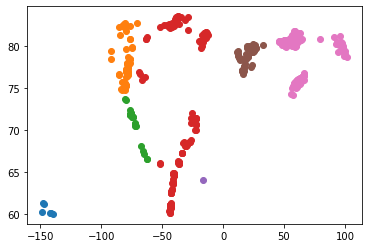

In [15]:
#90% of glaciers or whatever % you want

fa_russian_grouped = Arctic_discharge_fluxes_with_area_export
fa_russian_grouped['Region_name'][(fa_russian_grouped['Region_name']=='SZ')|(fa_russian_grouped['Region_name']=='FJL')|(fa_russian_grouped['Region_name']=='NZ')] = 'Russia'

#Add in area calculated
fa_russian_grouped = fa_russian_grouped.merge(rgi_tidewater[['RGIid_2','Area_calculated']],left_on='RGIId',right_on='RGIid_2',how='left').drop_duplicates('RGIid_2')

list_of_regions = fa_russian_grouped.groupby('Region_name').mean()[['lon']].sort_values('lon').reset_index()['Region_name'].unique()
# fa_russian_grouped.drop('level_0',inplace=True)

for region_name in list_of_regions:
    print(region_name)
    
    regional_fa = fa_russian_grouped[(fa_russian_grouped['Region_name']==region_name)].reset_index(drop=True).sort_values(by='Frontal_ablation_2010_to_2020_gt_per_yr_mean',ascending=False)
    print('Total fa:',sum(regional_fa['Frontal_ablation_2010_to_2020_gt_per_yr_mean']),'±',sum(regional_fa['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']))
    for i in range(0,len(regional_fa)):
        if sum(regional_fa['Frontal_ablation_2010_to_2020_gt_per_yr_mean'][0:i+1])/sum(regional_fa['Frontal_ablation_2010_to_2020_gt_per_yr_mean'])>0.9:
            print('number of glaciers:',i+1)
            print('total number of glaciers: ',len(regional_fa))
            print('percentage of glaciers:',(i+1)/len(regional_fa)*100 )
            print('covers x% of frontal ablation: ', sum(regional_fa['Frontal_ablation_2010_to_2020_gt_per_yr_mean'][0:i+1])/sum(regional_fa['Frontal_ablation_2010_to_2020_gt_per_yr_mean'])*100)
            plt.scatter(regional_fa['lon'][0:i+1],regional_fa['lat'][0:i+1])
            print('regional mean FA:', np.mean(regional_fa['Frontal_ablation_2010_to_2020_gt_per_yr_mean']),'±',np.mean(regional_fa['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']))
            print('Percent regional area of contributors',regional_fa['Area_calculated'][0:i].sum()/regional_fa['Area_calculated'].sum()*100,'%')
            print('Regional tidewater glacier area',regional_fa['Area_calculated'].sum())
            print('Percentage of terminus retreat for regional FA',100*-regional_fa['terminus_gt_change_per_year_late'].sum()/regional_fa['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum())
            print()
            break
    

In [12]:
regional_fa

,RGIId,2000_2010_mean_flux_gt,2000_2010_mean_flux_err_gt,2010_2020_mean_flux_gt,2010_2020_mean_flux_err_gt,Name_x,Area,Zmin,Zmax,Zmed,Slope,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Milan_thickness_min,region,Milan_thickness_max,do_we_have_an_observation_in_middle_fifth,easting,northing,Milan_thickness_mean,0000_v,best_thickness_mean,thickness_mean_uncertainty,length_early_avg,length_early_avg_err,length_late_avg,length_late_avg_err,2000_2010_mean,2000_2010_mean_err,2000_2010_mean_count,2010_2018_mean,2010_2018_mean_err,2010_2018_mean_count,best_thickness_early,best_thickness_early_err,best_thickness_late,best_thickness_late_err,number_velocity_obs_early,number_velocity_obs_late,num_pts,GlaThiDa_observations,Tomography_observations,Russian_observations,gate_length_km,RGIid_2_1,area_below_fluxgate_early,area_below_fluxgate_middle,area_below_fluxgate_late,average_distance_from_fluxgate_to_terminus_early,average_distance_from_fluxgate_to_terminus_middle,average_distance_from_fluxgate_to_terminus_late,RGIid_original,RGIId_y,Melt_early_avg,Melt_late_avg,Melt_early_avg_err,Melt_late_avg_err,Melt_fluxes_from_regional_estimate,Melt_total_avg,Melt_total_avg_err,level_0,index,area_km2_gained_total,perimeter_gained_total,perimeter_error_gained_total,area_km2_lost_total,perimeter_lost_total,perimeter_error_lost_total,area_km2_lost_early,perimeter_lost_early,perimeter_error_lost_early,area_km2_gained_early,perimeter_gained_early,perimeter_error_gained_early,area_km2_lost_late,perimeter_lost_late,perimeter_error_lost_late,area_km2_gained_late,perimeter_gained_late,perimeter_error_gained_late,Early_satellite_id,Middle_satellite_id,Late_satellite_id,Early_date,Mid_date,Late_date,Early_date_decimal_year,Middle_date_decimal_year,Late_date_decimal_year,total_years_elapsed,early_to_middle_years_elapsed,middle_to_late_years_elapsed,net_area_change_total,net_area_change_total_error,...,average_Milan_thickness_lost_late_err,average_Milan_thickness_gained_late_err,average_Milan_thickness_lost_total,average_Milan_thickness_gained_total,average_Milan_thickness_lost_total_err,average_Milan_thickness_gained_total_err,average_tomo_thickness_lost_early,average_tomo_thickness_gained_early,average_tomo_thickness_lost_late,average_tomo_thickness_gained_late,average_tomo_thickness_lost_total,average_tomo_thickness_gained_total,average_Milan_thickness_gained_early_debiased,average_Milan_thickness_lost_early_debiased,average_Milan_thickness_gained_late_debiased,average_Milan_thickness_lost_late_debiased,average_Milan_thickness_gained_total_debiased,average_Milan_thickness_lost_total_debiased,thickness_for_area_lost_early,thickness_for_area_lost_early_err,thickness_for_area_gained_early,thickness_for_area_gained_early_err,thickness_for_area_lost_late,thickness_for_area_lost_late_err,thickness_for_area_gained_late,thickness_for_area_gained_late_err,thickness_for_area_lost_total,thickness_for_area_lost_total_err,thickness_for_area_gained_total,thickness_for_area_gained_total_err,thickness_for_area_lost_early_err_fullycorr,thickness_for_area_gained_early_err_fullycorr,thickness_for_area_lost_late_err_fullycorr,thickness_for_area_gained_late_err_fullycorr,thickness_for_area_lost_total_err_fullycorr,thickness_for_area_gained_total_err_fullycorr,area_flux_gt_gained_early,area_flux_gt_gained_early_error,area_flux_gt_lost_early,area_flux_gt_lost_early_error,area_flux_gt_gained_late,area_flux_gt_gained_late_error,area_flux_gt_lost_late,area_flux_gt_lost_late_error,area_flux_gt_gained_total,area_flux_gt_gained_total_error,area_flux_gt_lost_total,area_flux_gt_lost_total_error,terminus_gt_change_per_year_early_without_melt,terminus_gt_change_per_year_early_area_error_without_melt,terminus_gt_change_per_year_late_without_melt,terminus_gt_change_per_year_late_area_error_without_melt,terminus_gt_change_per_year_total_without_melt,terminus_gt_change_per_year_total_area_error_without_melt,2000_2010_mean_flux_gt_without_melt,2000_2010_mean_flux_err_gt_without_melt,

In [11]:
fa_greenland = Arctic_discharge_fluxes_with_area_export#[(Arctic_discharge_fluxes_with_area_export['Region_name']=='Greenland')]

list_of_subregions = fa_greenland.groupby('Subregion_name').mean()[['lon']].sort_values('lon').reset_index()['Subregion_name'].unique()

for subregion_name in list_of_subregions:
    print(subregion_name)
    
    regional_fa = fa_greenland[(fa_greenland['Subregion_name']==subregion_name)].reset_index(drop=True).sort_values(by='Frontal_ablation_2010_to_2020_gt_per_yr_mean',ascending=True)
    print('Total fa:',sum(regional_fa['Frontal_ablation_2010_to_2020_gt_per_yr_mean']),'±',sum(regional_fa['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']))
    for i in range(0,len(regional_fa)):
        if sum(regional_fa['Frontal_ablation_2010_to_2020_gt_per_yr_mean'][0:i+1])/sum(regional_fa['Frontal_ablation_2010_to_2020_gt_per_yr_mean'])>0.9:
            print('number of glaciers:',i+1)
            print('total number of glaciers: ',len(regional_fa))
            print('percentage of glaciers:',(i+1)/len(regional_fa)*100 )
            print('covers x% of frontal ablation: ', sum(regional_fa['Frontal_ablation_2010_to_2020_gt_per_yr_mean'][0:i+1])/sum(regional_fa['Frontal_ablation_2010_to_2020_gt_per_yr_mean'])*100)
            print()
            break

W Alaska
Total fa: 4.4746993134324695 ± 0.19458838918277513
number of glaciers: 22
total number of glaciers:  22
percentage of glaciers: 100.0
covers x% of frontal ablation:  100.0

E Alaska
Total fa: 6.205962502542844 ± 0.14878414502049583
number of glaciers: 20
total number of glaciers:  20
percentage of glaciers: 100.0
covers x% of frontal ablation:  100.0

Axel Heiberg, ACN
Total fa: 0.09954783030928538 ± 0.020569227043091377
number of glaciers: 2
total number of glaciers:  2
percentage of glaciers: 100.0
covers x% of frontal ablation:  100.0

N Ellesmere, ACN
Total fa: 0.5714775372713181 ± 0.31628619718771095
number of glaciers: 49
total number of glaciers:  49
percentage of glaciers: 100.0
covers x% of frontal ablation:  100.0

Devon, ACN
Total fa: 0.67570917480632 ± 0.26688592591378074
number of glaciers: 46
total number of glaciers:  46
percentage of glaciers: 100.0
covers x% of frontal ablation:  100.0

S Ellesmere, ACN
Total fa: 0.7741424265489882 ± 0.3550779692459687
number 

In [ ]:
#contribution of Devon, Sydkap, Manson, and POW 
(2.357157+1.252840+0.95119)/6.268000

In [ ]:
Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['Region_name']=='FJL')]

In [ ]:
#contribution of surge type glaciers according to RGI
print('FA from 2010-2020 of glaciers that are observed or probably surgers in the Arctic:')
surge_FA = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['Surging']==3)|(Arctic_discharge_fluxes_with_area_export['Surging']==2)]['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum()
print(surge_FA)
print(surge_FA/Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum()*100,'% of all glacier FA')

print('FA from 2000-2010 of glaciers that are observed or probably surgers in the Arctic:')
surge_FA = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['Surging']==3)|(Arctic_discharge_fluxes_with_area_export['Surging']==2)]['Frontal_ablation_2000_to_2010_gt_per_yr_mean'].sum()
print(surge_FA)
print(surge_FA/Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean'].sum()*100,'% of all glacier FA')


Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['Surging']==3)].sort_values('Frontal_ablation_2000_to_2010_gt_per_yr_mean',ascending=True).head(10)

In [ ]:
Arctic_discharge_fluxes_with_area_export.plot(column='Frontal_ablation_2000_to_2010_gt_per_yr_mean_plotting',cmap = color_map,)

In [ ]:
Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean_plotting']

In [ ]:
%matplotlib notebook
Arctic_discharge_fluxes_with_area_export.plot(
#                 ax=ax1,
                markersize=marker_size_def, 
                column=Arctic_discharge_fluxes_with_area_export[dataset[i]],
                vmin=vmin_fill, 
                vmax=vmax_fill,
#                 transform=ccrs.epsg('3995'),
                marker='s',
                cmap = color_map,
                colorbar=True)


In [ ]:
Arctic_discharge_fluxes_with_area_export['Subregion_name'].unique()

/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<IPython.core.display.Javascript object>


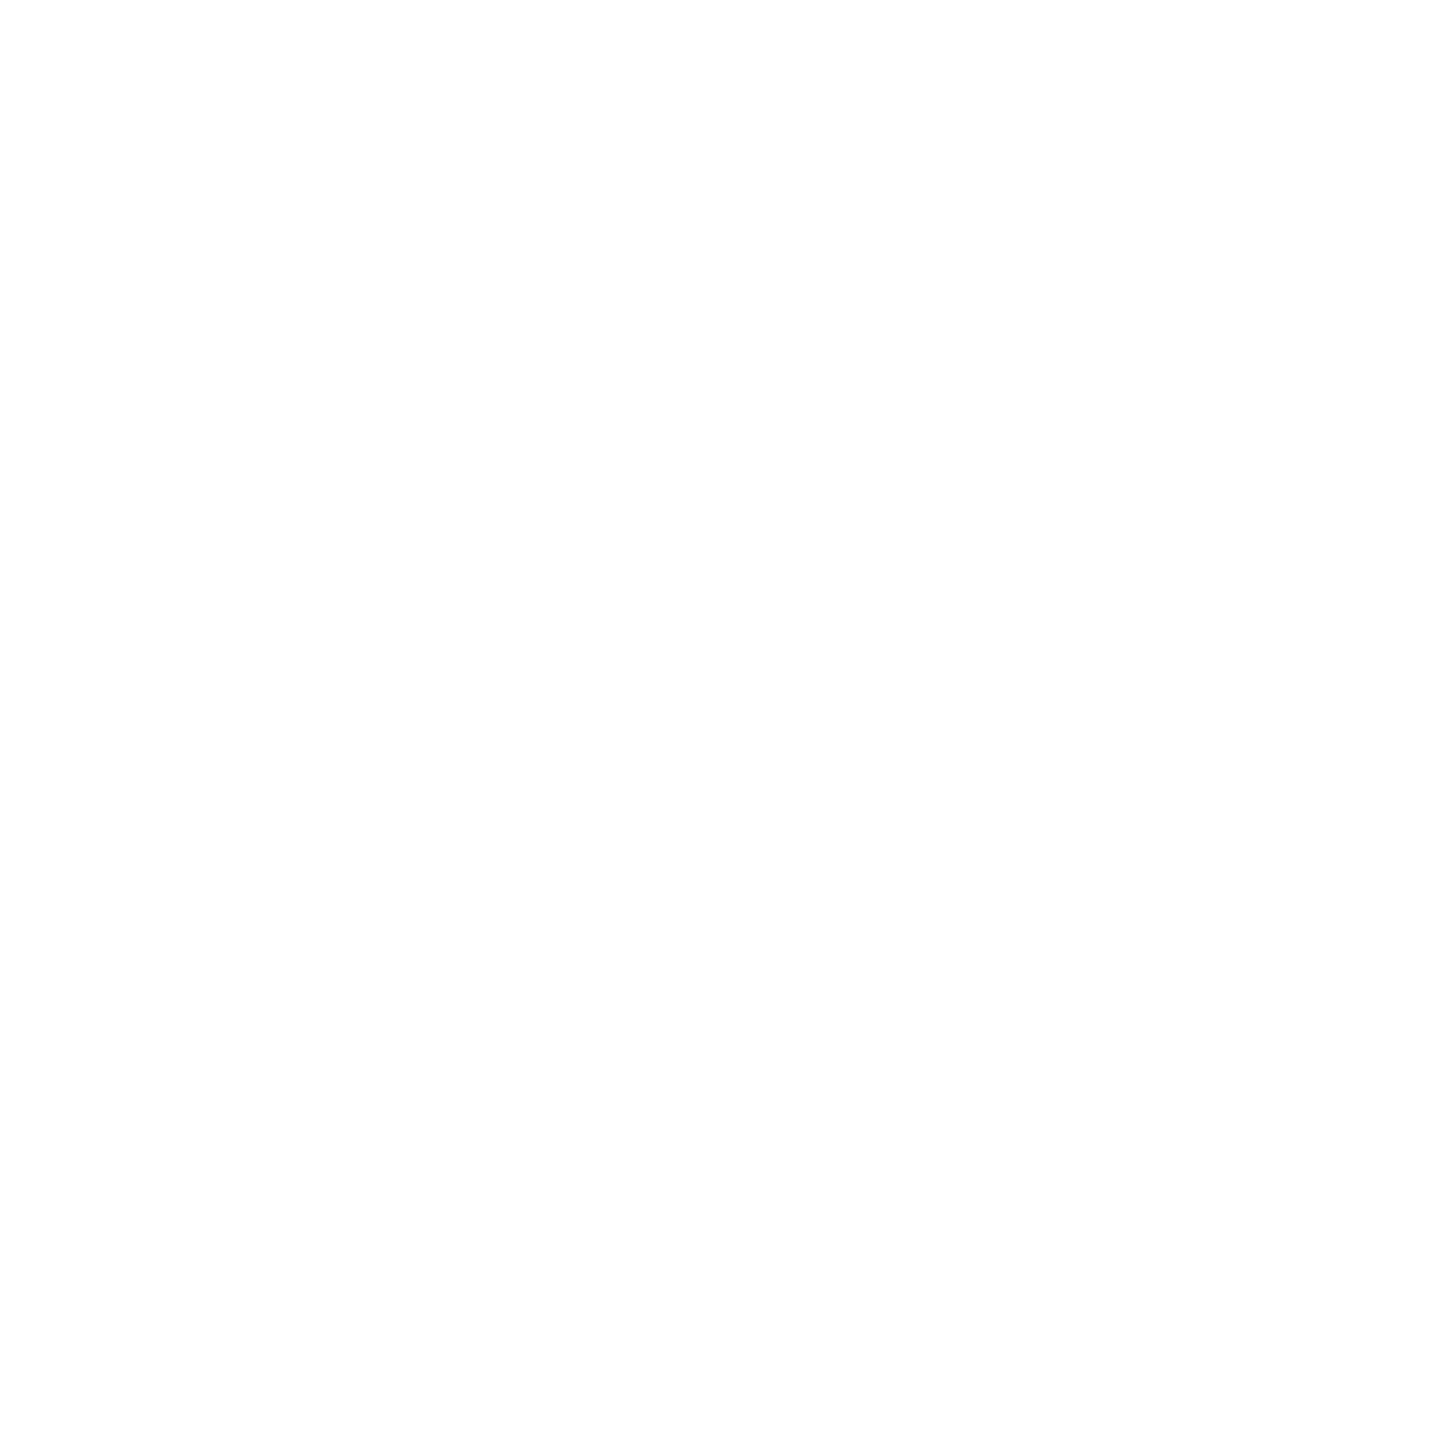

/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plo

/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plo

/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plo

<IPython.core.display.Javascript object>


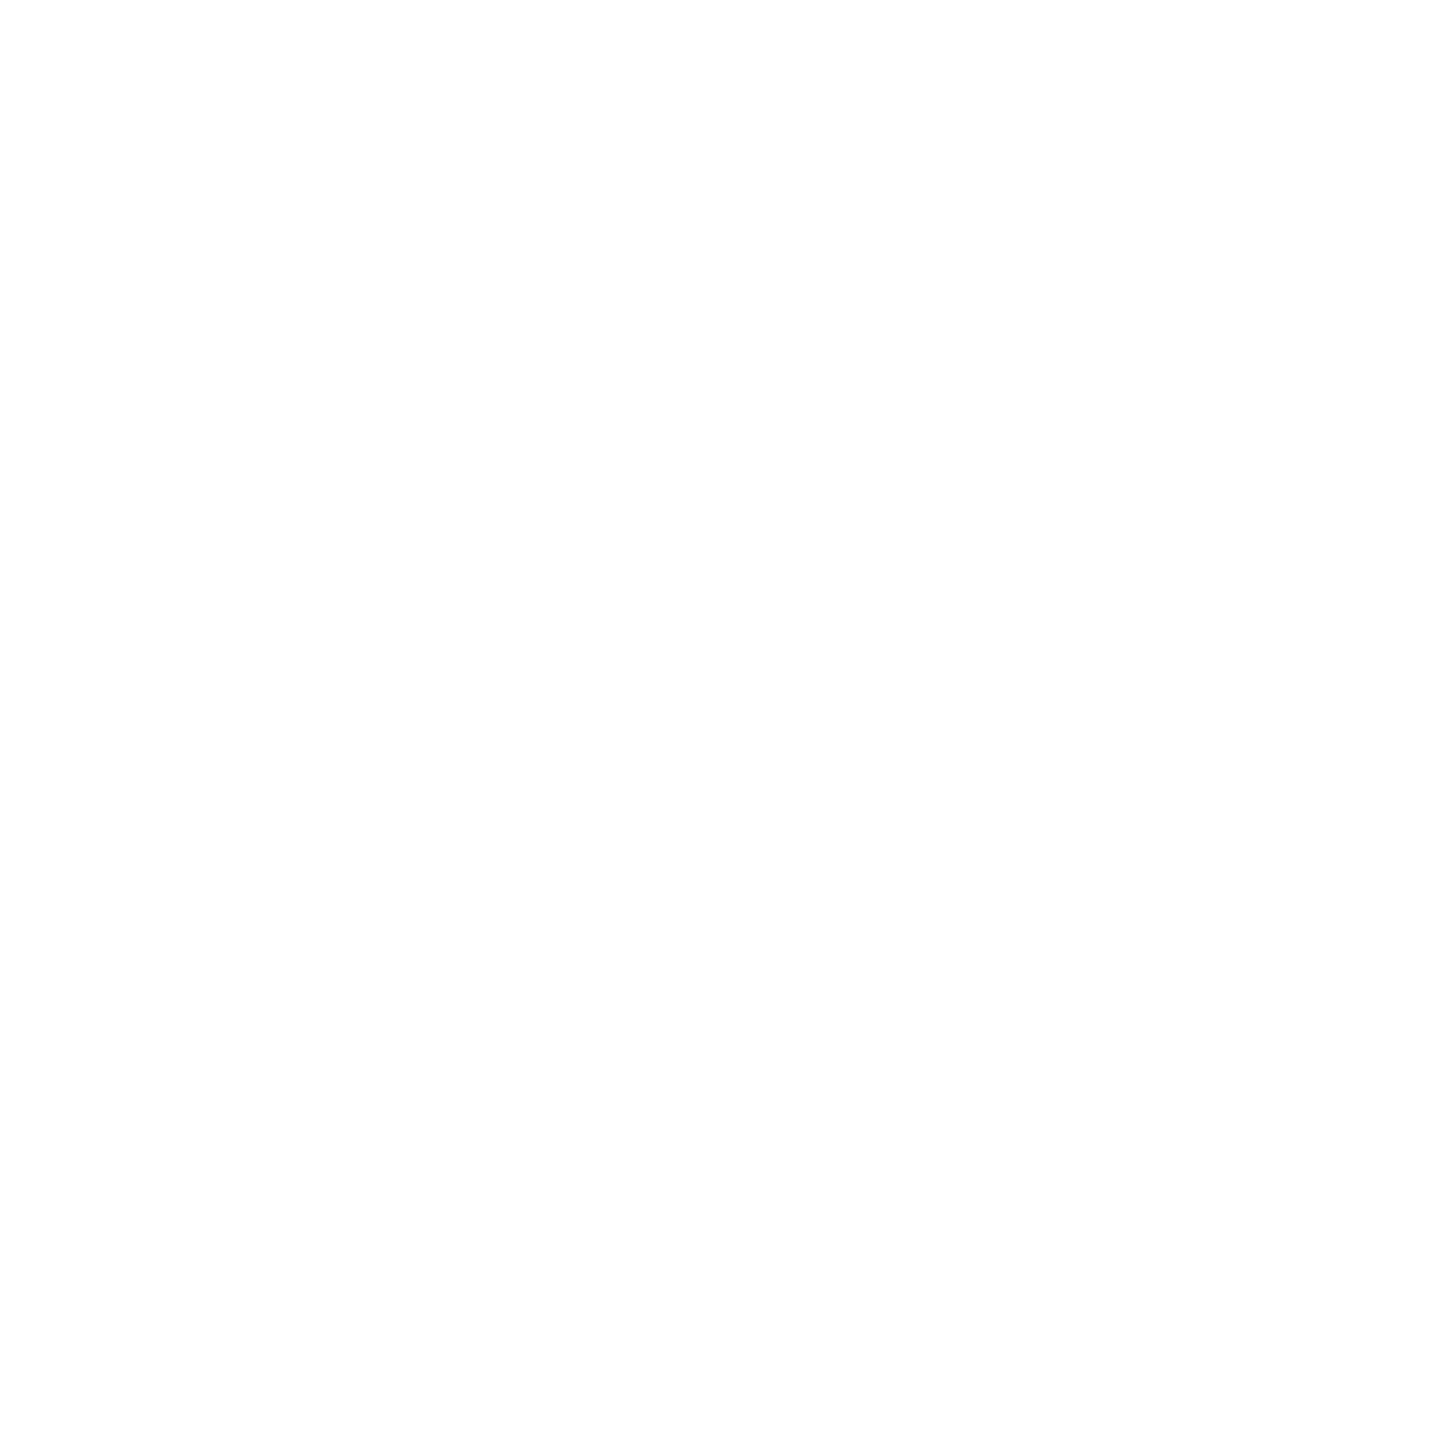

/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plo

/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plo

/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plo

In [9]:
#discharge plots with error symbols and only 6 regions
%matplotlib notebook

for i in [0,1]:
    dataset = ['Frontal_ablation_2000_to_2010_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean']
    dataset_err = ['Frontal_ablation_2000_to_2010_gt_per_yr_mean_err','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']

    Arctic_discharge_fluxes_with_area_export = Arctic_discharge_fluxes_with_area_export.sort_values(dataset,ascending=False)
    Arctic_discharge_fluxes_with_area_export.crs = {'init' :'epsg:3995'}
    
#build colormap    

    colors1 = plt.cm.Blues(np.linspace(0, 1, 73))
    colors2 = plt.cm.YlOrBr(np.linspace(0, 1, 548))
    colors2 = colors2[150:548]
    colors2[0:48] = colors1[25:73]

    # combine them and build a new colormap
#     colors = np.vstack((colors1, colors2))
    colors=colors2
    color_map = mcolors.LinearSegmentedColormap.from_list('color_map', colors)
#     color_map = 'plasma'

    counter = 1
    marker_size_def = 30 #change marker size
    vmin_fill = 0.02
    vmax_fill = 4
    
    #percent error
    per_err = (Arctic_discharge_fluxes_with_area_export[dataset_err[i]])/np.abs(Arctic_discharge_fluxes_with_area_export[dataset[i]])*100
    big_flux = Arctic_discharge_fluxes_with_area_export[dataset[i]]>vmin_fill
                                                                                                 
    #sort the subregions by longitude so that your plots go from west to east
    list_of_subregions = Arctic_discharge_fluxes_with_area_export.groupby('Subregion_name').mean()[['lon']].sort_values('lon').reset_index()['Subregion_name'].unique()
    land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',edgecolor='black',facecolor='silver',linewidth=0.2)
    
    fig = plt.figure(figsize=(10,10))
    for subregion_name in list_of_subregions:

        center_lat = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['lat'].mean()
        center_lon = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['lon'].mean()

        ax1 = plt.subplot(6,6,counter,projection=ccrs.Orthographic(central_longitude=center_lon, central_latitude=center_lat))
        ax1.set_facecolor('#D5f4f5')
        ax1.add_feature(land_10m,zorder=0)
        rgi.plot(color='white',ax=ax1,transform=ccrs.epsg('3995'),edgecolor='none',label='land terminating glacier',legend=True,zorder=1)
        Greenland_IS.plot(color='white',ax=ax1,transform=ccrs.epsg('3995'),edgecolor='white',label='land terminating glacier',legend=True,zorder=1)
        
        if i==0:
            im = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export[dataset[i]]<=vmin_fill)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)].plot(
                ax=ax1,
                markersize=marker_size_def*0.6,#make markers smaller
                facecolor='none',
                edgecolor='dimgray',
                marker='v',
                transform=ccrs.epsg('3995'),
                zorder=2)
        
        if i ==1:
            im = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export[dataset[i]]<=vmin_fill)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)&(Arctic_discharge_fluxes_with_area_export['Middle_satellite_id']!='nan')].plot(
                ax=ax1,
                markersize=marker_size_def*0.5,#make markers smaller
                facecolor='none',
                edgecolor='dimgray',
                marker='v',
                transform=ccrs.epsg('3995'),
                zorder=2)

        num=[0.02,.05,0.1,0.15,0.2,0.25,0.3,0.5,0.8,1.2,1.8,2.5,10]
#         num=[0.02,10]
        for n in range(0,len(num)-1):
            if i==0:
                plotting_group_flux=(Arctic_discharge_fluxes_with_area_export[dataset[i]]<=num[n+1])&(Arctic_discharge_fluxes_with_area_export[dataset[i]]>num[n])&(Arctic_discharge_fluxes_with_area_export['Middle_satellite_id']!='nan')
            if i==1:
                plotting_group_flux=(Arctic_discharge_fluxes_with_area_export[dataset[i]]<=num[n+1])&(Arctic_discharge_fluxes_with_area_export[dataset[i]]>num[n])&(Arctic_discharge_fluxes_with_area_export['Middle_satellite_id']!='nan')&(Arctic_discharge_fluxes_with_area_export['Late_satellite_id']!='nan')
            im_low = Arctic_discharge_fluxes_with_area_export[big_flux&plotting_group_flux&(per_err<50)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)].plot(
                ax=ax1,
                markersize=marker_size_def*2.5, 
                column=Arctic_discharge_fluxes_with_area_export[big_flux&plotting_group_flux&(per_err<50)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)][dataset[i]],
                vmin=vmin_fill, 
                vmax=vmax_fill,
                transform=ccrs.epsg('3995'),
                marker='o',
                cmap = color_map,
                zorder=4,
                linewidths=0.5, edgecolors='k'
            )

            im_low = Arctic_discharge_fluxes_with_area_export[big_flux&plotting_group_flux&(per_err>=50)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)].plot(
                ax=ax1,
                markersize=marker_size_def*2.5, 
                column=Arctic_discharge_fluxes_with_area_export[big_flux&plotting_group_flux&(per_err>=50)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)][dataset[i]],
                vmin=vmin_fill, 
                vmax=vmax_fill,
                transform=ccrs.epsg('3995'),
                marker='s',
                cmap = color_map,
                zorder=4,
                linewidths=0.5, edgecolors='k'
            )

        if len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name])>10:
            ax1.set_extent(
                [min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x-1000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x+1000),
                min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y-1000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y+10000)],
                crs = ccrs.epsg('3995')
            )
        if len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name])<11:
            ax1.set_extent(
                [min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x-50000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x+50000),
                min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y-50000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y+50000)],
                crs = ccrs.epsg('3995')
            )
            
        ax1.set_title(subregion_name, fontsize=10,pad=0)
        gl = ax1.gridlines(linewidth=.25, color='gray', alpha=0.5)
        gl.xlocator = mticker.FixedLocator(range(-180,180, 1))
        gl.ylocator = mticker.FixedLocator(range(0,90, 1))
        ax1.set_aspect(aspect=1, adjustable='datalim',anchor='N')
        counter = counter+1
        
        if center_lon>0:
            ax1.annotate(str(int(center_lat))+'°N, '+str(int(center_lon))+'°E',xy=(0.001,0.93),xycoords='axes fraction',fontsize=6,zorder=10)
        else:
            ax1.annotate(str(int(center_lat))+'°N, '+str(int(-center_lon))+'°W',xy=(0.001,0.93),xycoords='axes fraction',fontsize=6,zorder=10)

    cax = fig.add_axes([0.905, 0.25, 0.03, 0.5]) # [left, bottom, width, height] 
    # sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean'].min(), vmax=Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean'].max()))
    sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=vmin_fill, vmax=vmax_fill))
    cbar = fig.colorbar(sm, cax=cax)
    cbar.ax.set_ylabel('Frontal ablation (Gt $a^{-1}$)')
    plt.tight_layout()
    
    fig.subplots_adjust(hspace=0.1, wspace=0.01,top = .98, bottom = 0.005, right = .90, left = 0.005)
    if i == 0:
#         fig.suptitle('Arctic Frontal Ablation 2000-2010')
        fig.savefig('figures/2000to2010_Arctic_FA_err_sym_v54.jpg',format='jpg',dpi=600)
        plt.close()
    if i == 1:
#         fig.suptitle('Arctic Frontal Ablation 2010-2020')
        fig.savefig('figures/2010to2020_Arctic_FA_err_sym_v54.jpg',format='jpg',dpi=600)
        plt.close()

/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<IPython.core.display.Javascript object>


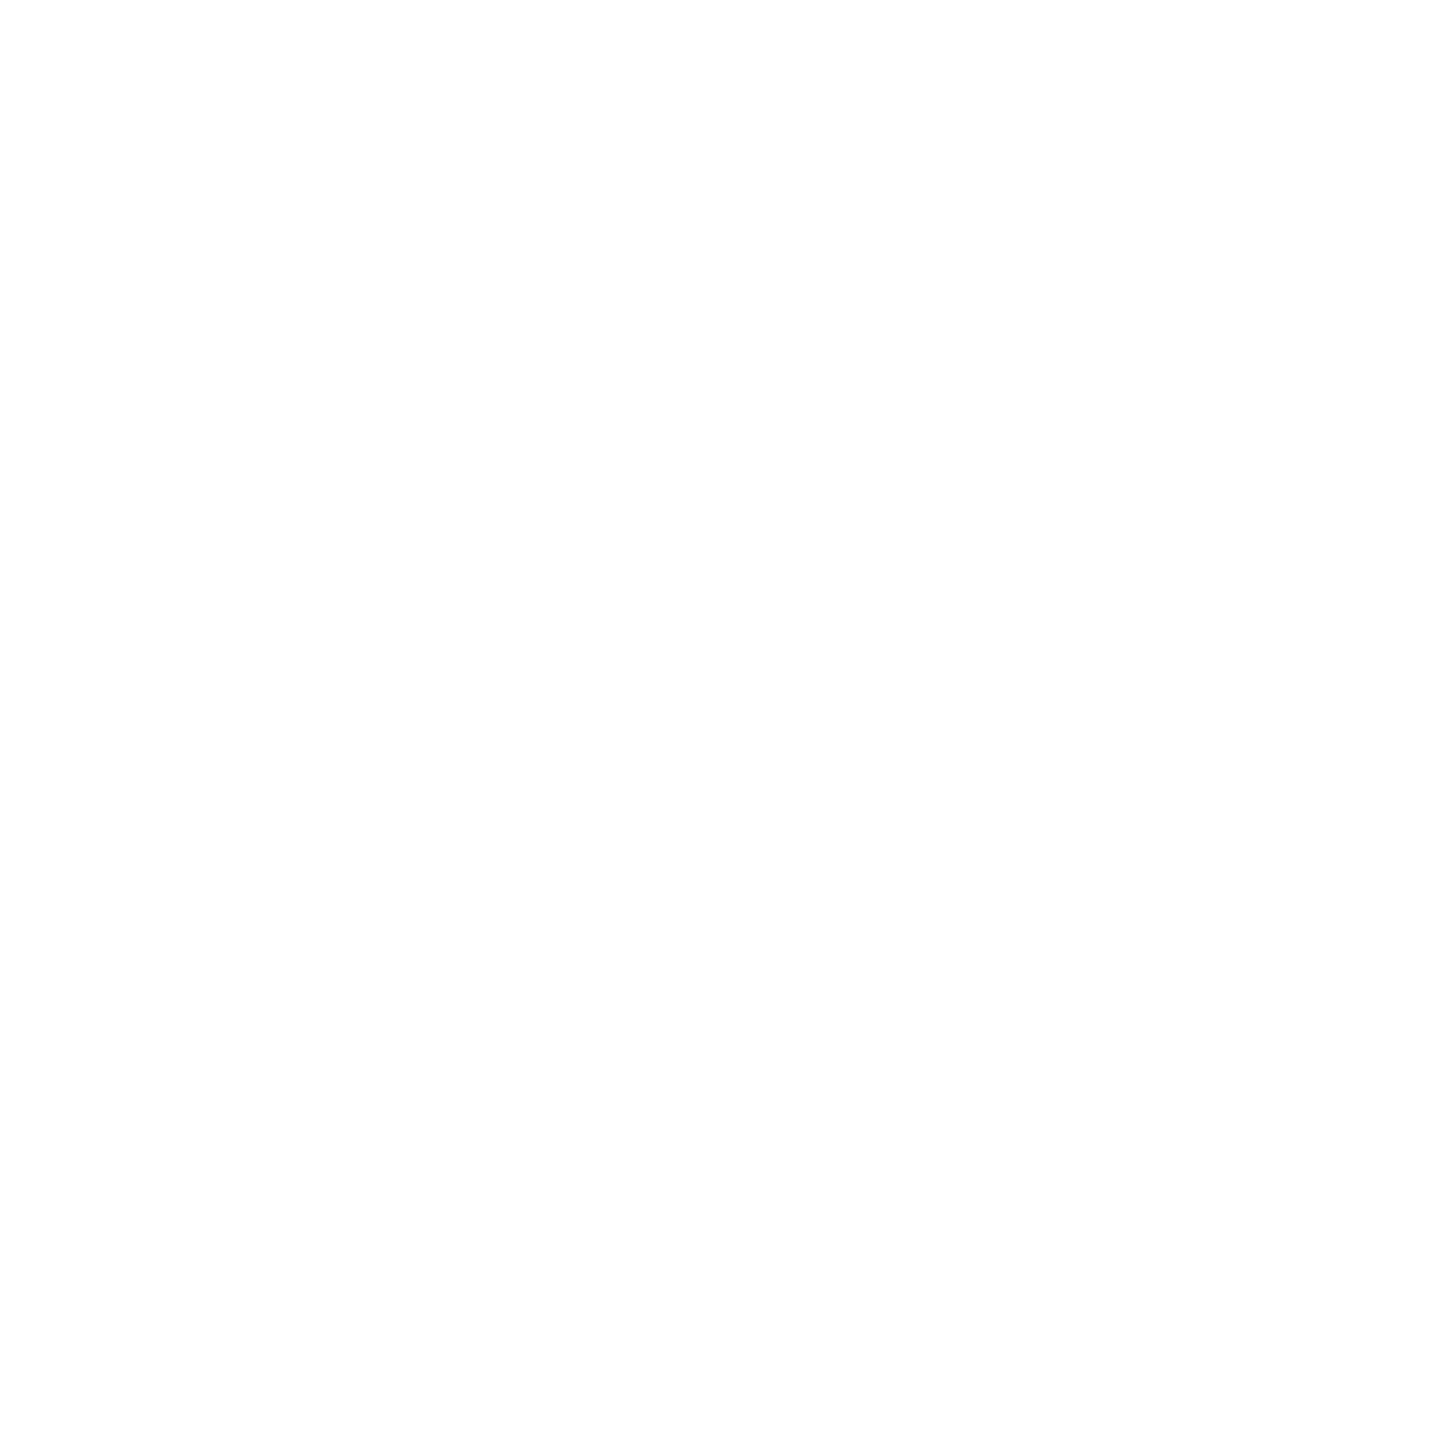

/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is depreca

<IPython.core.display.Javascript object>


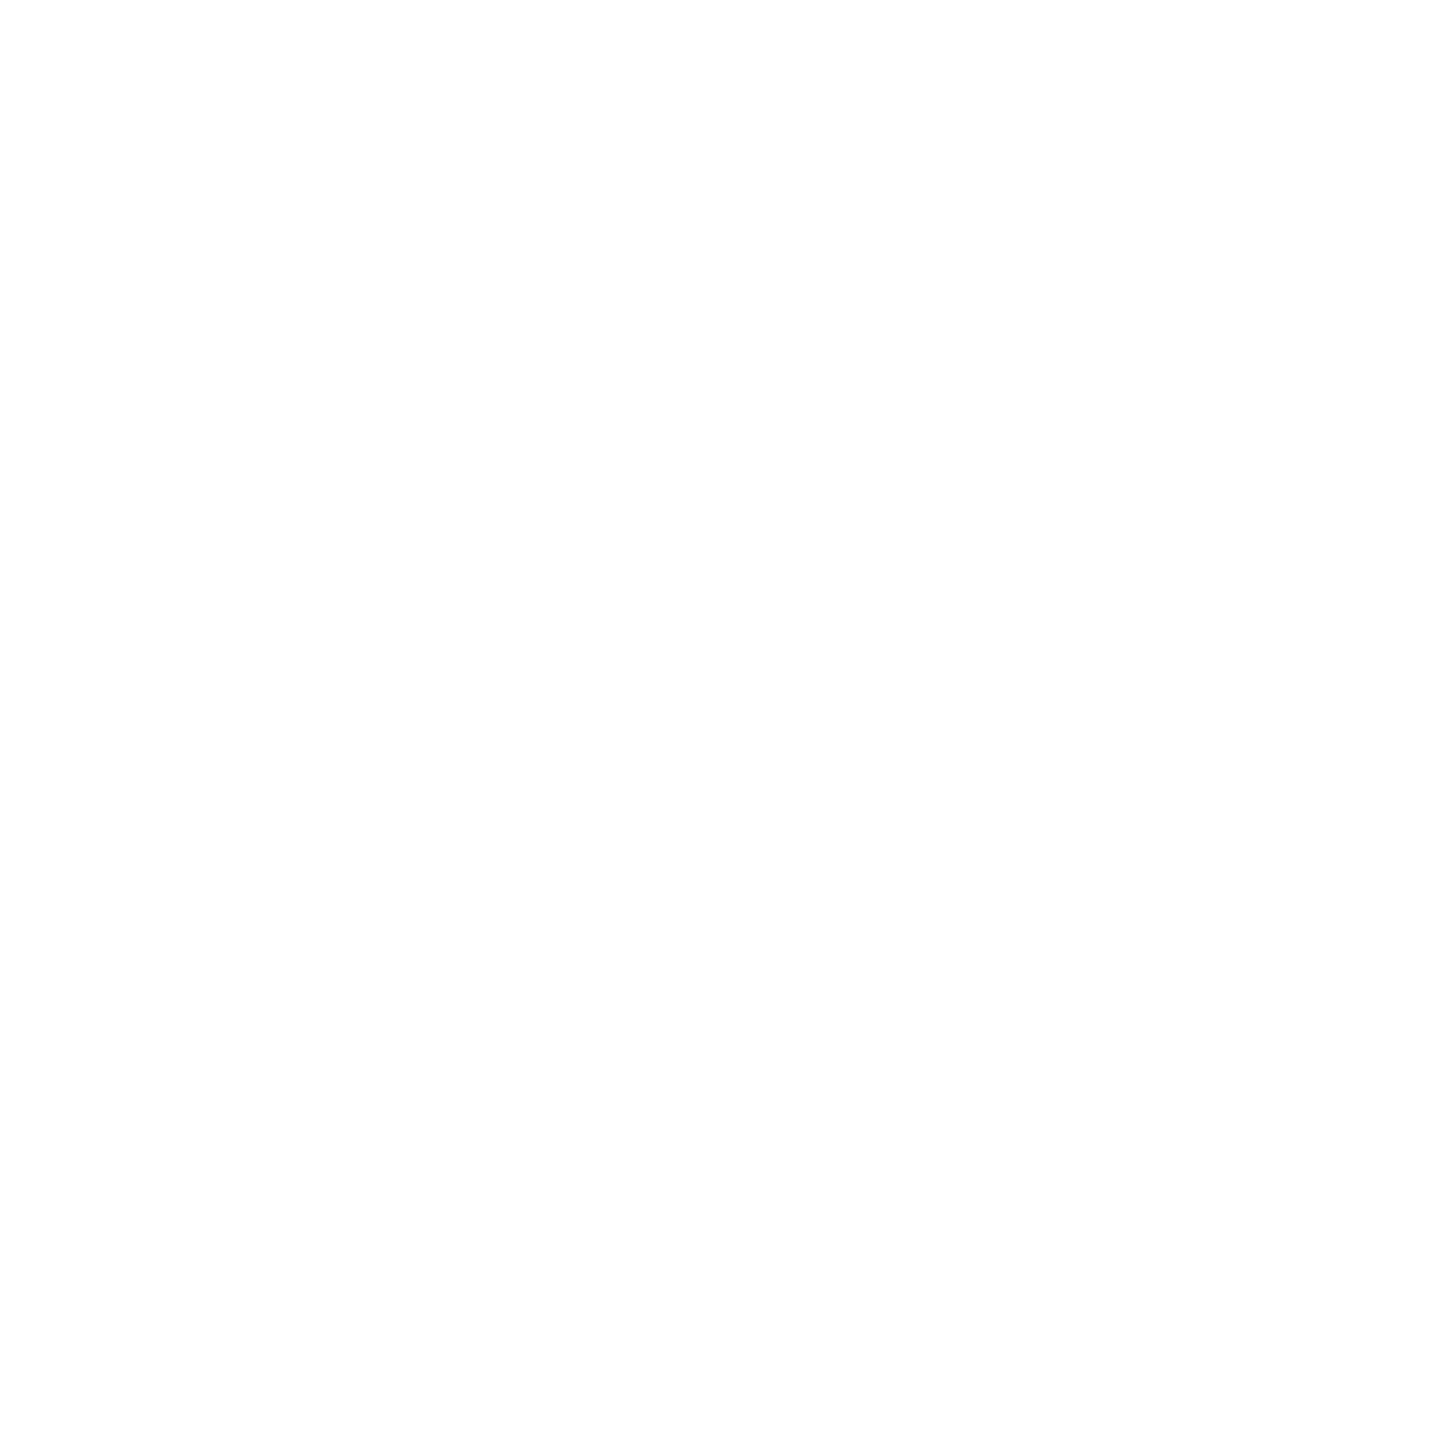

/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plo

In [10]:
#Produce % error figures for frontal ablation
%matplotlib notebook

for i in [0,1]: 
    
    dataset = ['Frontal_ablation_2000_to_2010_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean'][i]
    dataset_err = ['Frontal_ablation_2000_to_2010_gt_per_yr_mean_err','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err'][i]

    Arctic_discharge_fluxes_with_area_export = Arctic_discharge_fluxes_with_area_export.sort_values(dataset,ascending=False)
    Arctic_discharge_fluxes_with_area_export.crs = {'init' :'epsg:3995'}
    color_map = 'plasma'
    counter = 1
    marker_size_def =30 #change marker size
    vmin_fill = 0
    vmax_fill = 100
    min_value=0.02
    #sort the subregions by longitude so that your plots go from west to east
    list_of_subregions = Arctic_discharge_fluxes_with_area_export.groupby('Subregion_name').mean()[['lon']].sort_values('lon').reset_index()['Subregion_name'].unique()
    land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                            edgecolor='black',facecolor='silver',linewidth=0.2)
    fig = plt.figure(figsize=(10,10))
    for subregion_name in list_of_subregions:

        center_lat = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['lat'].mean()
        center_lon = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['lon'].mean()

        ax1 = plt.subplot(6,6,counter,projection=ccrs.Orthographic(central_longitude=center_lon, central_latitude=center_lat))
        ax1.set_facecolor('#D5f4f5')
        ax1.add_feature(land_10m,zorder=0)
        rgi.plot(color='white',ax=ax1,transform=ccrs.epsg('3995'),edgecolor='none',label='land terminating glacier',legend=True,zorder=1)
        Greenland_IS.plot(color='white',ax=ax1,transform=ccrs.epsg('3995'),edgecolor='white',label='land terminating glacier',legend=True,zorder=1)
        
        if i==0:
            im = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export[dataset]<min_value)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)].plot(
                ax=ax1,
                markersize=marker_size_def*0.6,#make markers smaller
                color='dimgray',
                facecolor='none',
                marker='v',
                transform=ccrs.epsg('3995'), zorder=2)

            im = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export[dataset]>=min_value)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)].plot(
                ax=ax1,
                column=Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export[dataset]>=min_value)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)][dataset_err]/
                    np.abs(Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export[dataset]>=min_value)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)][dataset])*100,
                vmin=vmin_fill, 
                vmax=vmax_fill,
                markersize=marker_size_def*1.5,
                cmap=color_map,
                zorder=4,
                transform=ccrs.epsg('3995'))
        
        if i ==1:
            im = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export[dataset]<min_value)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)&(Arctic_discharge_fluxes_with_area_export['Middle_satellite_id']!='nan')].plot(
                ax=ax1,
                markersize=marker_size_def*0.6,#make markers smaller
                color='dimgray',
                facecolor='none',
                marker='v',
                transform=ccrs.epsg('3995'))
            im = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export[dataset]>=min_value)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)&(Arctic_discharge_fluxes_with_area_export['Middle_satellite_id']!='nan')].plot(
                ax=ax1,
                column=Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export[dataset]>=min_value)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)][dataset_err]/
                    np.abs(Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export[dataset]>=min_value)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)][dataset])*100,
                vmin=vmin_fill, 
                vmax=vmax_fill,
                markersize=marker_size_def*1.5,
                cmap=color_map,
                zorder=4,
                transform=ccrs.epsg('3995'))

        if len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name])>10:
            ax1.set_extent(
                [min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x-1000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x+1000),
                min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y-1000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y+10000)],
                crs = ccrs.epsg('3995')
            )
        if len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name])<11:
            ax1.set_extent(
                [min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x-50000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x+50000),
                min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y-50000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y+50000)],
                crs = ccrs.epsg('3995')
            )
            
        ax1.set_title(subregion_name,fontsize=10,pad=0)
        gl = ax1.gridlines(linewidth=.25, color='gray', alpha=0.5)
        gl.xlocator = mticker.FixedLocator(range(-180,180, 1))
        gl.ylocator = mticker.FixedLocator(range(0,90, 1))
        ax1.set_aspect(aspect=1, adjustable='datalim',anchor='N')
        counter = counter+1
        
        if center_lon>0:
            ax1.annotate(str(int(center_lat))+'°N, '+str(int(center_lon))+'°E',xy=(0.001,0.93),xycoords='axes fraction',fontsize=6,zorder=10)
        else:
            ax1.annotate(str(int(center_lat))+'°N, '+str(int(-center_lon))+'°W',xy=(0.001,0.93),xycoords='axes fraction',fontsize=6,zorder=10)
            

    cax = fig.add_axes([0.905, 0.25, 0.03, 0.5]) # [left, bottom, width, height] 
    # sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean'].min(), vmax=Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean'].max()))
    sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=vmin_fill, vmax=vmax_fill))
    cbar = fig.colorbar(sm, cax=cax)
    cbar.ax.set_ylabel('Percent uncertainty of frontal ablation')
    
    fig.subplots_adjust(hspace=0.1, wspace=0.01,top = .98, bottom = 0.005, right = .90, left = 0.005)
    if dataset == 'Frontal_ablation_2000_to_2010_gt_per_yr_mean':
#         fig.suptitle('Arctic Discharge 2000-2010')
        fig.savefig('figures/2000to2010_Arctic_Discharge_err_v30.jpg',format='jpg',dpi=600)
        plt.close()
    if dataset == 'Frontal_ablation_2010_to_2020_gt_per_yr_mean':
#         fig.suptitle('Arctic Discharge 2010-2020')
        fig.savefig('figures/2010to2020_Arctic_Discharge_err_v30.jpg',format='jpg',dpi=600)
        plt.close()

In [11]:
pwd

'/Users/willkochtitzky/bin/Jupyter_notebooks/Arctic/Arctic_discharge'

In [ ]:
#Terminus area change plots
%matplotlib notebook

for i in [0,1]:
    dataset = ['net_area_change_per_year_early','net_area_change_per_year_late']

    Arctic_discharge_fluxes_with_area_export = Arctic_discharge_fluxes_with_area_export.sort_values(dataset,ascending=False)
    Arctic_discharge_fluxes_with_area_export.crs = {'init' :'epsg:3995'}
    color_map = 'seismic_r'
    counter = 1
    marker_size_def = 30 #change marker size
    vmin_fill = -3
    vmax_fill = 3
    dont_display=0.001
                                                                                                 
    #sort the subregions by longitude so that your plots go from west to east
    list_of_subregions = Arctic_discharge_fluxes_with_area_export.groupby('Subregion_name').mean()[['lon']].sort_values('lon').reset_index()['Subregion_name'].unique()
    land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                            edgecolor='black',facecolor='silver',linewidth=0.2)
    fig = plt.figure(figsize=(10,10))
    for subregion_name in list_of_subregions:
        
        data_for_purple_mask = (Arctic_discharge_fluxes_with_area_export[dataset[i]]<dont_display)&(Arctic_discharge_fluxes_with_area_export[dataset[i]]>-dont_display)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)
        data_for_plotting_mask = (Arctic_discharge_fluxes_with_area_export[dataset[i]]<=-dont_display)|(Arctic_discharge_fluxes_with_area_export[dataset[i]]>=dont_display)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)
    
        center_lat = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['lat'].mean()
        center_lon = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['lon'].mean()


        ax1 = plt.subplot(6,6,counter,projection=ccrs.Orthographic(central_longitude=center_lon, central_latitude=center_lat))
        ax1.set_facecolor('#D5f4f5')
        ax1.add_feature(land_10m,zorder=0)
        rgi.plot(color='white',ax=ax1,transform=ccrs.epsg('3995'),edgecolor='none',label='land terminating glacier',legend=True,zorder=1)
        Greenland_IS.plot(color='white',ax=ax1,transform=ccrs.epsg('3995'),edgecolor='white',label='land terminating glacier',legend=True,zorder=1)
        
        im = Arctic_discharge_fluxes_with_area_export[data_for_purple_mask&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)].plot(
            ax=ax1,
            markersize=marker_size_def,
            color='gray',
            transform=ccrs.epsg('3995')
        )

        im_low = Arctic_discharge_fluxes_with_area_export[data_for_plotting_mask&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)].plot(
            ax=ax1,
            markersize=marker_size_def, 
            column=Arctic_discharge_fluxes_with_area_export[data_for_plotting_mask&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)][dataset[i]],
            vmin=vmin_fill, 
            vmax=vmax_fill,
            transform=ccrs.epsg('3995'),
            marker='o',
            cmap = color_map,
            zorder=2,
            linewidths=0.5, edgecolors='k'
        )

        if len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name])>10:
            ax1.set_extent(
                [min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x-1000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x+1000),
                min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y-1000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y+1000)],
                crs = ccrs.epsg('3995')
            )
        if len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name])<11:
            ax1.set_extent(
                [min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x-50000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x+50000),
                min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y-50000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y+50000)],
                crs = ccrs.epsg('3995')
            )
            
        ax1.set_title(subregion_name, fontsize=10,pad=0)
        gl = ax1.gridlines(linewidth=.25, color='gray', alpha=0.5)
        gl.xlocator = mticker.FixedLocator(range(-180,180, 1))
        gl.ylocator = mticker.FixedLocator(range(0,90, 1))
        ax1.set_aspect(aspect=1, adjustable='datalim',anchor='N')
        counter = counter+1
        
        if center_lon>0:
            ax1.annotate(str(int(center_lat))+'°N, '+str(int(center_lon))+'°E',xy=(0.001,0.93),xycoords='axes fraction',fontsize=6,zorder=10)
        else:
            ax1.annotate(str(int(center_lat))+'°N, '+str(int(-center_lon))+'°W',xy=(0.001,0.93),xycoords='axes fraction',fontsize=6,zorder=10)

        
    cax = fig.add_axes([0.905, 0.01, 0.03, 0.98]) # [left, bottom, width, height] 
    # sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean'].min(), vmax=Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean'].max()))
    sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=vmin_fill, vmax=vmax_fill))
    cbar = fig.colorbar(sm, cax=cax)
    cbar.ax.set_ylabel('Terminus area change $km^{2}$ $a^{-1}$')
    plt.tight_layout()

    fig.subplots_adjust(hspace=0.1, wspace=0.01,top = .98, bottom = 0.005, right = .90, left = 0.005)
    
    if dataset[i] == 'net_area_change_per_year_early':
#         fig.suptitle('Terminus volume change 2000-2010')
        fig.savefig('figures/2000to2010_Arctic_term_area_change_v22.jpg',format='jpg',dpi=600)
        plt.close()
    if dataset[i] == 'net_area_change_per_year_late':
#         fig.suptitle('Terminus volume change 2010-2020')
        fig.savefig('figures/2010to2020_Arctic_term_area_change_v22.jpg',format='jpg',dpi=600)
        plt.close()

In [ ]:
#Terminus advancing/retreating/uncertain plots

for i in [0,1]:
    dataset = ['net_area_change_early','net_area_change_late']
    dataset_err = ['net_area_change_early_error','net_area_change_late_error']
    sat_id = ['Middle_satellite_id','Late_satellite_id']

    Arctic_discharge_fluxes_with_area_export.crs = {'init' :'epsg:3995'}
    color_map = 'seismic_r'
    counter = 1
    marker_size_def = 5#8 #change marker size
                                                                                                 
    #sort the subregions by longitude so that your plots go from west to east
    list_of_subregions = Arctic_discharge_fluxes_with_area_export.groupby('Subregion_name').mean()[['lon']].sort_values('lon').reset_index()['Subregion_name'].unique()
    land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                            edgecolor='black',facecolor='silver',linewidth=0.2)
    fig = plt.figure(figsize=(10,10))
    for subregion_name in list_of_subregions:
        
        data_for_purple_mask = (Arctic_discharge_fluxes_with_area_export[dataset[i]]<dont_display)&(Arctic_discharge_fluxes_with_area_export[dataset[i]]>-dont_display)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)
        data_for_plotting_mask = (Arctic_discharge_fluxes_with_area_export[dataset[i]]<=-dont_display)|(Arctic_discharge_fluxes_with_area_export[dataset[i]]>=dont_display)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)
    
        center_lat = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['lat'].mean()
        center_lon = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['lon'].mean()


        ax1 = plt.subplot(6,6,counter,projection=ccrs.Orthographic(central_longitude=center_lon, central_latitude=center_lat))
        ax1.set_facecolor('#D5f4f5')
        ax1.add_feature(land_10m,zorder=0)
        rgi.plot(color='white',ax=ax1,transform=ccrs.epsg('3995'),edgecolor='none',label='land terminating glacier',legend=True,zorder=1)
        Greenland_IS.plot(color='white',ax=ax1,transform=ccrs.epsg('3995'),edgecolor='white',label='land terminating glacier',legend=True,zorder=1)
        
        im = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export[sat_id[i]]=='nan')&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)].plot(
            ax=ax1,
            markersize=marker_size_def,
            color='black',
            transform=ccrs.epsg('3995'),
            label='No longer marine terminating',zorder=7)

        Arctic_discharge_fluxes_working = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export[sat_id[i]]!='nan')&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)]

        im = Arctic_discharge_fluxes_working[((Arctic_discharge_fluxes_working[dataset[i]]-Arctic_discharge_fluxes_working[dataset_err[i]])<=0)
                                                     &((Arctic_discharge_fluxes_working[dataset[i]]+Arctic_discharge_fluxes_working[dataset_err[i]])>=0)].plot(
            ax=ax1,
            markersize=marker_size_def,
            color='gray',
            transform=ccrs.epsg('3995'),
            label='Uncertain',zorder=4)

        im = Arctic_discharge_fluxes_working[((Arctic_discharge_fluxes_working[dataset[i]]+Arctic_discharge_fluxes_working[dataset_err[i]])<0)].plot(
            ax=ax1,
            markersize=marker_size_def,
            color='red',
            transform=ccrs.epsg('3995'),
            label='Retreating',zorder=5)    
        im = Arctic_discharge_fluxes_working[((Arctic_discharge_fluxes_working[dataset[i]]-Arctic_discharge_fluxes_working[dataset_err[i]])>0)].plot(
            ax=ax1,
            markersize=marker_size_def,
            color='blue',
            transform=ccrs.epsg('3995'),
            label='Advancing',zorder=6)

        if len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name])>10:
            ax1.set_extent(
                [min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x-1000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x+1000),
                min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y-1000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y+1000)],
                crs = ccrs.epsg('3995')
            )
        if len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name])<11:
            ax1.set_extent(
                [min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x-50000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x+50000),
                min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y-50000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y+50000)],
                crs = ccrs.epsg('3995')
            )
            
        ax1.set_title(subregion_name, fontsize=10,pad=0)
        gl = ax1.gridlines(linewidth=.25, color='gray', alpha=0.5)
        gl.xlocator = mticker.FixedLocator(range(-180,180, 1))
        gl.ylocator = mticker.FixedLocator(range(0,90, 1))
        ax1.set_aspect(aspect=1, adjustable='datalim',anchor='N')
        counter = counter+1
        
        if center_lon>0:
            ax1.annotate(str(int(center_lat))+'°N, '+str(int(center_lon))+'°E',xy=(0.001,0.93),xycoords='axes fraction',fontsize=6,zorder=10)
        else:
            ax1.annotate(str(int(center_lat))+'°N, '+str(int(-center_lon))+'°W',xy=(0.001,0.93),xycoords='axes fraction',fontsize=6,zorder=10)

#     cax = fig.add_axes([0.905, 0.01, 0.03, 0.98]) # [left, bottom, width, height] 
#     # sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean'].min(), vmax=Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean'].max()))
#     sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=vmin_fill, vmax=vmax_fill))
#     cbar = fig.colorbar(sm, cax=cax)
#     cbar.ax.set_ylabel('Terminus area change $km^{2}$ $a^{-1}$')
    plt.tight_layout()

    fig.subplots_adjust(hspace=0.1, wspace=0.01,top = .98, bottom = 0.005, right = .995, left = 0.005)
    
    if i == 0:
#         fig.suptitle('Terminus volume change 2000-2010')
        fig.savefig('figures/2000to2010_Arctic_advacning_retreating_v5.jpg',format='jpg',dpi=600)
        plt.close()
    if i == 1:
#         fig.suptitle('Terminus volume change 2010-2020')
        fig.savefig('figures/2010to2020_Arctic_advacning_retreating_v5.jpg',format='jpg',dpi=600)
        plt.close()

In [37]:
#calculate contribution of glaciers to terminus changes
thresh = 0.01
print(len(Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']<thresh)&(Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']>-thresh)]['terminus_gt_change_per_year_late']))
print(sum(Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']<thresh)&(Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']>-thresh)]['terminus_gt_change_per_year_late']))     
print(sum(Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']))

thresh_num = len(Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']<thresh)&(Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']>-thresh)]['terminus_gt_change_per_year_late'])
total_num = len(Arctic_discharge_fluxes_with_area_export)

thresh_sum = sum(Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']<thresh)&(Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']>-thresh)]['terminus_gt_change_per_year_late'])
total_sum = sum(Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late'])

print('total fraction of glaciers',thresh_num/total_num*100)
print('total fraction of terminus loss',thresh_sum/total_sum*100)

1237
-1.9394543671197453
-11.358780619563932
total fraction of glaciers 82.68716577540107
total fraction of terminus loss 17.074494455675136


In [ ]:
#Terminus volume change plots
%matplotlib notebook

for i in [0,1]:
    dataset = ['terminus_gt_change_per_year_early','terminus_gt_change_per_year_late']
    dataset_err = ['terminus_gt_change_per_year_early_area_error','terminus_gt_change_per_year_late_area_error']

    Arctic_discharge_fluxes_with_area_export = Arctic_discharge_fluxes_with_area_export.sort_values(dataset,ascending=False)
    Arctic_discharge_fluxes_with_area_export.crs = {'init' :'epsg:3995'}
    color_map = 'seismic_r'
    counter = 1
    marker_size_def = 30 #change marker size
    vmin_fill = -0.5
    vmax_fill = 0.5
    dont_display=0.01
    
    #percent error
#     per_err = (Arctic_discharge_fluxes_with_area_export[dataset_err[i]])/np.abs(Arctic_discharge_fluxes_with_area_export[dataset[i]])*100
                                                                                                 
    #sort the subregions by longitude so that your plots go from west to east
    list_of_subregions = Arctic_discharge_fluxes_with_area_export.groupby('Subregion_name').mean()[['lon']].sort_values('lon').reset_index()['Subregion_name'].unique()
    land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                            edgecolor='black',facecolor='silver',linewidth=0.2)
    fig = plt.figure(figsize=(10,10))
    for subregion_name in list_of_subregions:
        
        data_for_purple_mask = (Arctic_discharge_fluxes_with_area_export[dataset[i]]<dont_display)&(Arctic_discharge_fluxes_with_area_export[dataset[i]]>-dont_display)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)
        data_for_plotting_mask = (Arctic_discharge_fluxes_with_area_export[dataset[i]]<=-dont_display)|(Arctic_discharge_fluxes_with_area_export[dataset[i]]>=dont_display)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)
    
        center_lat = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['lat'].mean()
        center_lon = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['lon'].mean()


        ax1 = plt.subplot(6,6,counter,projection=ccrs.Orthographic(central_longitude=center_lon, central_latitude=center_lat))
        ax1.add_feature(land_10m,zorder=0)
        im = Arctic_discharge_fluxes_with_area_export[data_for_purple_mask].plot(
            ax=ax1,
            markersize=marker_size_def,
            color='gray',
            transform=ccrs.epsg('3995'),
        )

        im_low = Arctic_discharge_fluxes_with_area_export[data_for_plotting_mask].plot(
            ax=ax1,
            markersize=marker_size_def, 
            column=Arctic_discharge_fluxes_with_area_export[data_for_plotting_mask][dataset[i]],
            vmin=vmin_fill, 
            vmax=vmax_fill,
            transform=ccrs.epsg('3995'),
            marker='o',
            cmap = color_map,
            zorder=2
        )

        if len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name])>10:
            ax1.set_extent(
                [min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x-1000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x+1000),
                min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y-1000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y+1000)],
                crs = ccrs.epsg('3995')
            )
        if len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name])<11:
            ax1.set_extent(
                [min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x-50000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x+50000),
                min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y-50000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y+50000)],
                crs = ccrs.epsg('3995')
            )
            
        ax1.set_title(subregion_name, fontsize=10,pad=0)
        gl = ax1.gridlines(linewidth=.25, color='gray', alpha=0.5)
        gl.xlocator = mticker.FixedLocator(range(-180,180, 1))
        gl.ylocator = mticker.FixedLocator(range(0,90, 1))
        ax1.set_aspect(aspect=1, adjustable='datalim',anchor='N')
        counter = counter+1

        
    cax = fig.add_axes([0.905, 0.01, 0.03, 0.98]) # [left, bottom, width, height] 
    # sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean'].min(), vmax=Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean'].max()))
    sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=vmin_fill, vmax=vmax_fill))
    cbar = fig.colorbar(sm, cax=cax)
    cbar.ax.set_ylabel('Terminus volume change gt $a^-1$')
    plt.tight_layout()

    fig.subplots_adjust(hspace=0.1, wspace=0.01,top = .98, bottom = 0.005, right = .90, left = 0.005)

    if dataset[i] == 'terminus_gt_change_per_year_early':
#         fig.suptitle('Terminus volume change 2000-2010')
        fig.savefig('figures/2000to2010_Arctic_term_vol_change_v12.jpg',format='jpg',dpi=600)
    if dataset[i] == 'terminus_gt_change_per_year_late':
#         fig.suptitle('Terminus volume change 2010-2020')
        fig.savefig('figures/2010to2020_Arctic_term_vol_change_v12.jpg',format='jpg',dpi=600)

In [ ]:
Arctic_discharge_fluxes_with_area_export.sort_values('net_area_change_per_year_total').tail(10)

In [ ]:
Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['net_area_change_late']-Arctic_discharge_fluxes_with_area_export['net_area_change_late_error'])>0].to_file('advancing_test_May2_2021.gpkg',driver='GPKG')

In [27]:
#retreating early
print('retreating early: ',len(Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['net_area_change_early']+Arctic_discharge_fluxes_with_area_export['net_area_change_early_error'])<0]))
#advancing early
print('advancing early: ',len(Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['net_area_change_early']-Arctic_discharge_fluxes_with_area_export['net_area_change_early_error'])>0]))
print('advancing glaciers that are surge type:', len(Arctic_discharge_fluxes_with_area_export[((Arctic_discharge_fluxes_with_area_export['net_area_change_early']-Arctic_discharge_fluxes_with_area_export['net_area_change_early_error'])>0)&(Arctic_discharge_fluxes_with_area_export['Surging']==3)]    ))
print()
#retreating late
print('retreating late: ',len(Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['net_area_change_late']+Arctic_discharge_fluxes_with_area_export['net_area_change_late_error'])<0]))
#advancing late
print('advancing late: ',len(Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['net_area_change_late']-Arctic_discharge_fluxes_with_area_export['net_area_change_late_error'])>0]))
print('advancing glaciers that are surge type:', len(Arctic_discharge_fluxes_with_area_export[((Arctic_discharge_fluxes_with_area_export['net_area_change_late']-Arctic_discharge_fluxes_with_area_export['net_area_change_late_error'])>0)&(Arctic_discharge_fluxes_with_area_export['Surging']==3)]    ))


print('retreating during both time periods:',len(Arctic_discharge_fluxes_with_area_export[(((Arctic_discharge_fluxes_with_area_export['net_area_change_late']+Arctic_discharge_fluxes_with_area_export['net_area_change_late_error'])<0))&(((Arctic_discharge_fluxes_with_area_export['net_area_change_early']+Arctic_discharge_fluxes_with_area_export['net_area_change_early_error'])<0))]    ))
print('advancing during both time periods:',len(Arctic_discharge_fluxes_with_area_export[(((Arctic_discharge_fluxes_with_area_export['net_area_change_late']-Arctic_discharge_fluxes_with_area_export['net_area_change_late_error'])>0))&(((Arctic_discharge_fluxes_with_area_export['net_area_change_early']-Arctic_discharge_fluxes_with_area_export['net_area_change_early_error'])>0))]    ))

print()
print('Glaciers that advancing during both times periods:')
Arctic_discharge_fluxes_with_area_export[(((Arctic_discharge_fluxes_with_area_export['net_area_change_late']-Arctic_discharge_fluxes_with_area_export['net_area_change_late_error'])>0))&(((Arctic_discharge_fluxes_with_area_export['net_area_change_early']-Arctic_discharge_fluxes_with_area_export['net_area_change_early_error'])>0))]    

retreating early:  945
advancing early:  42
advancing glaciers that are surge type: 10

retreating late:  896
advancing late:  39
advancing glaciers that are surge type: 8
retreating during both time periods: 745
advancing during both time periods: 13

Glaciers that advancing during both times periods:


,RGIId,2000_2010_mean_flux_gt,2000_2010_mean_flux_err_gt,2010_2020_mean_flux_gt,2010_2020_mean_flux_err_gt,Name_x,Area,Zmin,Zmax,Zmed,Slope,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Milan_thickness_min,region,Milan_thickness_max,do_we_have_an_observation_in_middle_fifth,easting,northing,Milan_thickness_mean,0000_v,best_thickness_mean,thickness_mean_uncertainty,length_early_avg,length_early_avg_err,length_late_avg,length_late_avg_err,2000_2010_mean,2000_2010_mean_err,2000_2010_mean_count,2010_2018_mean,2010_2018_mean_err,2010_2018_mean_count,best_thickness_early,best_thickness_early_err,best_thickness_late,best_thickness_late_err,number_velocity_obs_early,number_velocity_obs_late,num_pts,GlaThiDa_observations,Tomography_observations,Russian_observations,gate_length_km,RGIid_2_1,area_below_fluxgate_early,area_below_fluxgate_middle,area_below_fluxgate_late,average_distance_from_fluxgate_to_terminus_early,average_distance_from_fluxgate_to_terminus_middle,average_distance_from_fluxgate_to_terminus_late,RGIid_original,RGIId_y,Melt_early_avg,Melt_late_avg,Melt_early_avg_err,Melt_late_avg_err,Melt_fluxes_from_regional_estimate,Melt_total_avg,Melt_total_avg_err,level_0,index,area_km2_gained_total,perimeter_gained_total,perimeter_error_gained_total,area_km2_lost_total,perimeter_lost_total,perimeter_error_lost_total,area_km2_lost_early,perimeter_lost_early,perimeter_error_lost_early,area_km2_gained_early,perimeter_gained_early,perimeter_error_gained_early,area_km2_lost_late,perimeter_lost_late,perimeter_error_lost_late,area_km2_gained_late,perimeter_gained_late,perimeter_error_gained_late,Early_satellite_id,Middle_satellite_id,Late_satellite_id,Early_date,Mid_date,Late_date,Early_date_decimal_year,Middle_date_decimal_year,Late_date_decimal_year,total_years_elapsed,early_to_middle_years_elapsed,middle_to_late_years_elapsed,net_area_change_total,net_area_change_total_error,...,average_Milan_thickness_lost_late_err,average_Milan_thickness_gained_late_err,average_Milan_thickness_lost_total,average_Milan_thickness_gained_total,average_Milan_thickness_lost_total_err,average_Milan_thickness_gained_total_err,average_tomo_thickness_lost_early,average_tomo_thickness_gained_early,average_tomo_thickness_lost_late,average_tomo_thickness_gained_late,average_tomo_thickness_lost_total,average_tomo_thickness_gained_total,average_Milan_thickness_gained_early_debiased,average_Milan_thickness_lost_early_debiased,average_Milan_thickness_gained_late_debiased,average_Milan_thickness_lost_late_debiased,average_Milan_thickness_gained_total_debiased,average_Milan_thickness_lost_total_debiased,thickness_for_area_lost_early,thickness_for_area_lost_early_err,thickness_for_area_gained_early,thickness_for_area_gained_early_err,thickness_for_area_lost_late,thickness_for_area_lost_late_err,thickness_for_area_gained_late,thickness_for_area_gained_late_err,thickness_for_area_lost_total,thickness_for_area_lost_total_err,thickness_for_area_gained_total,thickness_for_area_gained_total_err,thickness_for_area_lost_early_err_fullycorr,thickness_for_area_gained_early_err_fullycorr,thickness_for_area_lost_late_err_fullycorr,thickness_for_area_gained_late_err_fullycorr,thickness_for_area_lost_total_err_fullycorr,thickness_for_area_gained_total_err_fullycorr,area_flux_gt_gained_early,area_flux_gt_gained_early_error,area_flux_gt_lost_early,area_flux_gt_lost_early_error,area_flux_gt_gained_late,area_flux_gt_gained_late_error,area_flux_gt_lost_late,area_flux_gt_lost_late_error,area_flux_gt_gained_total,area_flux_gt_gained_total_error,area_flux_gt_lost_total,area_flux_gt_lost_total_error,terminus_gt_change_per_year_early_without_melt,terminus_gt_change_per_year_early_area_error_without_melt,terminus_gt_change_per_year_late_without_melt,terminus_gt_change_per_year_late_area_error_without_melt,terminus_gt_change_per_year_total_without_melt,terminus_gt_change_per_year_total_area_error_without_melt,2000_2010_mean_flux_gt_without_melt,2000_2010_mean_flux_err_gt_without_melt,

In [ ]:
print('Glaciers with an increase in FA')
increase_FA = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean']-Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean_err'])>(Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']+Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err'])]
print(len(increase_FA))
print('total that are surge-type:',len(increase_FA[increase_FA['Surging']==3]))

print('Glaciers with an decrease in FA')
decrease_FA = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean']+Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean_err'])<(Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']-Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err'])]
print('total:',len(decrease_FA))
print('total that are surge-type:',len(decrease_FA[decrease_FA['Surging']==3]))

In [ ]:
increase_FA.groupby('Region_name').count()

In [ ]:
decrease_FA.groupby('Region_name').count()

In [ ]:
increase_FA[increase_FA['Region_name']=='Alaska']

In [ ]:
decrease_FA[decrease_FA['Frontal_ablation_2000_to_2010_gt_per_yr_mean']<-0.4]

In [ ]:
increase_FA[increase_FA['Frontal_ablation_2000_to_2010_gt_per_yr_mean']<-0.4]

In [ ]:
Arctic_discharge_fluxes_with_area_export.head(2)

In [ ]:
#Terminus area change plots
%matplotlib notebook

for i in [0,1]:
    dataset = ['net_area_change_early','net_area_change_late']

    Arctic_discharge_fluxes_with_area_export = Arctic_discharge_fluxes_with_area_export.sort_values(dataset,ascending=False)
    Arctic_discharge_fluxes_with_area_export.crs = {'init' :'epsg:3995'}
    color_map = 'seismic_r'
    counter = 1
    marker_size_def = 30 #change marker size
                                                              
    #sort the subregions by longitude so that your plots go from west to east
    list_of_subregions = Arctic_discharge_fluxes_with_area_export.groupby('Subregion_name').mean()[['lon']].sort_values('lon').reset_index()['Subregion_name'].unique()
    land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                            edgecolor='black',facecolor='silver',linewidth=0.2)
    fig = plt.figure(figsize=(10,10))
    for subregion_name in list_of_subregions:

        center_lat = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['lat'].mean()
        center_lon = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['lon'].mean()

        ax1 = plt.subplot(6,6,counter,projection=ccrs.Orthographic(central_longitude=center_lon, central_latitude=center_lat))
        ax1.add_feature(land_10m,zorder=0)
        
        im = Arctic_discharge_fluxes_with_area_export[((Arctic_discharge_fluxes_with_area_export[dataset[i]]-Arctic_discharge_fluxes_with_area_export[dataset_err[i]])<=0)
                                                     &((Arctic_discharge_fluxes_with_area_export[dataset[i]]+Arctic_discharge_fluxes_with_area_export[dataset_err[i]])>=0)
                                                     &(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)].plot(
            ax=ax1,
            markersize=marker_size_def,
            color='gray',
            transform=ccrs.epsg('3995'),
        )
        
        im = Arctic_discharge_fluxes_with_area_export[((Arctic_discharge_fluxes_with_area_export[dataset[i]]+Arctic_discharge_fluxes_with_area_export[dataset_err[i]])<0)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)].plot(
            ax=ax1,
            markersize=marker_size_def,
            color='red',
            transform=ccrs.epsg('3995'),
        )
        
        im = Arctic_discharge_fluxes_with_area_export[((Arctic_discharge_fluxes_with_area_export[dataset[i]]-Arctic_discharge_fluxes_with_area_export[dataset_err[i]])>0)&(Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name)].plot(
            ax=ax1,
            markersize=marker_size_def,
            color='blue',
            transform=ccrs.epsg('3995'),
        )
        
        if len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name])>10:
            ax1.set_extent(
                [min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x-1000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x+1000),
                min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y-1000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y+1000)],
                crs = ccrs.epsg('3995')
            )
        if len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name])<11:
            ax1.set_extent(
                [min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x-50000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].x+50000),
                min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y-50000),
                max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']==subregion_name]['geometry'].y+50000)],
                crs = ccrs.epsg('3995')
            )
            
        ax1.set_title(subregion_name, fontsize=10,pad=0)
        gl = ax1.gridlines(linewidth=.25, color='gray', alpha=0.5)
        gl.xlocator = mticker.FixedLocator(range(-180,180, 1))
        gl.ylocator = mticker.FixedLocator(range(0,90, 1))
        ax1.set_aspect(aspect=1, adjustable='datalim',anchor='N')
        counter = counter+1
    
    fig.subplots_adjust(hspace=0.1, wspace=0.01,top = .98, bottom = 0.005, right = .995, left = 0.005)
    
    if dataset[i] == 'net_area_change_early':
#         fig.suptitle('Terminus area change 2000-2010')
        fig.savefig('figures/2000to2010_advancing_retreating_uncertain_v4.jpg',format='jpg',dpi=600)
    if dataset[i] == 'net_area_change_late':
#         fig.suptitle('Terminus area change 2010-2020')
        fig.savefig('figures/2010to2020_advancing_retreating_uncertain_v4.jpg',format='jpg',dpi=600)

In [ ]:
#export layer of advancing glaciers
dataset = ['net_area_change_early','net_area_change_late']
dataset_err = ['net_area_change_early_error','net_area_change_late_error']
export_name = ['advanced_early.gpkg','advanced_late.gpkg']
layer_name = ['advanced_early','advanced_late']

Arctic_discharge_fluxes_with_area_export['advanced_early'] = np.nan
Arctic_discharge_fluxes_with_area_export['advanced_late'] = np.nan

for i in [0,1]:
    Arctic_discharge_fluxes_with_area_export[((Arctic_discharge_fluxes_with_area_export[dataset[i]]-Arctic_discharge_fluxes_with_area_export[dataset_err[i]])>0)].to_file(export_name[i],driver='GPKG')
    
    for n in range(0,len(Arctic_discharge_fluxes_with_area_export)):
        if ((Arctic_discharge_fluxes_with_area_export[dataset[i]][n]-Arctic_discharge_fluxes_with_area_export[dataset_err[i]][n])>0):
            Arctic_discharge_fluxes_with_area_export[layer_name[i]][n] = 1
        
Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['advanced_early']==1)|(Arctic_discharge_fluxes_with_area_export['advanced_late']==1)][['Name_x','lat','lon','advanced_early','advanced_late','Surging','net_area_change_early','net_area_change_early_error','net_area_change_late','net_area_change_late_error','geometry']].to_file('Are_these_advancing_glaciers_surge_type_v2')
Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['advanced_early']==1)|(Arctic_discharge_fluxes_with_area_export['advanced_late']==1)][['Name_x','lat','lon','advanced_early','advanced_late','Surging','net_area_change_early','net_area_change_early_error','net_area_change_late','net_area_change_late_error','geometry']].to_file('Are_these_advancing_glaciers_surge_type_v2.gpkg', driver='GPKG')

In [ ]:
for i in [0,1]:
    dataset = ['net_area_change_early','net_area_change_late']
    dataset_err = ['net_area_change_early_error','net_area_change_late_error']
    sat_id = ['Middle_satellite_id','Late_satellite_id']

    Arctic_discharge_fluxes_with_area_export = Arctic_discharge_fluxes_with_area_export.sort_values(dataset,ascending=False)
    Arctic_discharge_fluxes_with_area_export.crs = {'init' :'epsg:3995'}
    color_map = 'seismic_r'
    counter = 1
    marker_size_def = 10 #change marker size
                                                              
    #sort the subregions by longitude so that your plots go from west to east
    list_of_subregions = Arctic_discharge_fluxes_with_area_export.groupby('Subregion_name').mean()[['lon']].sort_values('lon').reset_index()['Subregion_name'].unique()
    land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                            edgecolor='black',facecolor='silver',linewidth=0.2)
    fig = plt.figure(figsize=(8,6))


    ax1 = plt.subplot(1,1,1,projection=ccrs.NorthPolarStereo(central_longitude=-90,true_scale_latitude=60))
#     ax1 = plt.subplot(1,1,1,projection=ccrs.Orthographic(central_longitude=0, central_latitude=70))
    ax1.set_facecolor('#D5f4f5')
    ax1.add_feature(land_10m,zorder=0)
    rgi.plot(color='white',ax=ax1,transform=ccrs.epsg('3995'),edgecolor='none',label='land terminating glacier',legend=True,zorder=1)
    Greenland_IS.plot(color='white',ax=ax1,transform=ccrs.epsg('3995'),edgecolor='white',label='land terminating glacier',legend=True,zorder=1)
    
    im = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export[sat_id[i]]=='nan')].plot(
        ax=ax1,
        markersize=marker_size_def,
        color='black',
        transform=ccrs.epsg('3995'),
        label='No longer marine terminating',zorder=7)
    
    Arctic_discharge_fluxes_working = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export[sat_id[i]]!='nan')]
    
    im = Arctic_discharge_fluxes_working[((Arctic_discharge_fluxes_working[dataset[i]]-Arctic_discharge_fluxes_working[dataset_err[i]])<=0)
                                                 &((Arctic_discharge_fluxes_working[dataset[i]]+Arctic_discharge_fluxes_working[dataset_err[i]])>=0)].plot(
        ax=ax1,
        markersize=marker_size_def,
        color='gray',
        transform=ccrs.epsg('3995'),
        label='Uncertain',zorder=4)
    
    im = Arctic_discharge_fluxes_working[((Arctic_discharge_fluxes_working[dataset[i]]+Arctic_discharge_fluxes_working[dataset_err[i]])<0)].plot(
        ax=ax1,
        markersize=marker_size_def,
        color='red',
        transform=ccrs.epsg('3995'),
        label='Retreating',zorder=5)    
    im = Arctic_discharge_fluxes_working[((Arctic_discharge_fluxes_working[dataset[i]]-Arctic_discharge_fluxes_working[dataset_err[i]])>0)].plot(
        ax=ax1,
        markersize=marker_size_def,
        color='blue',
        transform=ccrs.epsg('3995'),
        label='Advancing',zorder=6)

    gl = ax1.gridlines(linewidth=.25, color='gray', alpha=0.5)
    gl.xlocator = mticker.FixedLocator(range(-180,180, 20))
    gl.ylocator = mticker.FixedLocator(range(0,90, 10))
    ax1.set_aspect(aspect=1, adjustable='datalim')
    
    regions_outlines.plot(ax=ax1,transform=ccrs.epsg('3995'),color='none',edgecolor='black')
    
    fs=10
    ax1.annotate('Alaska', xy=(0.08,0.35),xycoords='axes fraction',fontsize=fs)
    ax1.annotate('ACN', xy=(0.51,0.52),xycoords='axes fraction',fontsize=fs)
    ax1.annotate('ACS', xy=(0.66,0.12),xycoords='axes fraction',fontsize=fs)
    ax1.annotate('Greenland', xy=(0.67,0.4),xycoords='axes fraction',fontsize=fs)
    ax1.annotate('Iceland', xy=(0.87,0.436),xycoords='axes fraction',fontsize=fs)
    ax1.annotate('Jan Mayen', xy=(0.768,0.605),xycoords='axes fraction',fontsize=fs)
    ax1.annotate('Svalbard', xy=(0.737,0.72),xycoords='axes fraction',fontsize=fs)
    ax1.annotate('Severnaya\nZemlya', xy=(0.413,0.87),xycoords='axes fraction',fontsize=fs-3)
    ax1.annotate('Franz Josef\n     Land', xy=(0.6,0.817),xycoords='axes fraction',fontsize=fs-3)
    ax1.annotate('Novaya Zemlya', xy=(0.57,0.92),xycoords='axes fraction',fontsize=fs-3)
    ax1.annotate('Russia', xy=(0.4,0.95),xycoords='axes fraction',fontsize=fs)
    
    fig.subplots_adjust(hspace=0.01, wspace=0.01,top =1, bottom = 0, right = 1, left = 0)
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [2,3,1,0]
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc='upper left')
    
    ax1.set_extent(          
                [min(Arctic_discharge_fluxes_with_area_export['geometry'].x-500000),
                max(Arctic_discharge_fluxes_with_area_export['geometry'].x+500000),
                min(Arctic_discharge_fluxes_with_area_export['geometry'].y-500000),
                max(Arctic_discharge_fluxes_with_area_export['geometry'].y+500000)],
                crs = ccrs.epsg('3995'))
    
    if dataset[i] == 'net_area_change_early':
#         fig.suptitle('Terminus area change 2000-2010')
        fig.savefig('figures/2000to2010_global_advancing_retreating_uncertain_v12.jpg',format='jpg',dpi=600)
    if dataset[i] == 'net_area_change_late':
#         fig.suptitle('Terminus area change 2010-2020')
        fig.savefig('figures/2010to2020_global_advancing_retreating_uncertain_v12.jpg',format='jpg',dpi=600)

In [ ]:
#Map of Northern Hemisphere glaciers
%matplotlib notebook
Arctic_discharge_fluxes_with_area_export = Arctic_discharge_fluxes_with_area_export.sort_values(dataset,ascending=False)
Arctic_discharge_fluxes_with_area_export.crs = {'init' :'epsg:3995'}
color_map = 'seismic_r'
counter = 1
marker_size_def = 15 #change marker size

#sort the subregions by longitude so that your plots go from west to east
list_of_subregions = Arctic_discharge_fluxes_with_area_export.groupby('Subregion_name').mean()[['lon']].sort_values('lon').reset_index()['Subregion_name'].unique()
land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='black',facecolor='silver',linewidth=0.2)
fig = plt.figure(figsize=(10,6))


ax1 = plt.subplot(1,1,1,projection=ccrs.NorthPolarStereo(central_longitude=-90,true_scale_latitude=60))
#     ax1 = plt.subplot(1,1,1,projection=ccrs.Orthographic(central_longitude=0, central_latitude=70))

ax1.add_feature(land_10m,zorder=0)

im = Arctic_discharge_fluxes_with_area_export.plot(
    ax=ax1,
    markersize=marker_size_def,
    color='blue',
    transform=ccrs.epsg('3995'))

gl = ax1.gridlines(linewidth=.25, color='gray', alpha=0.5)
gl.xlocator = mticker.FixedLocator(range(-180,180, 20))
gl.ylocator = mticker.FixedLocator(range(0,90, 10))
ax1.set_aspect(aspect=1, adjustable='datalim')

fig.subplots_adjust(hspace=0.01, wspace=0.01,top =1, bottom = 0, right = 1, left = 0)
    
fig.savefig('figures/Northern_hemisphere_marine_terminating_glaciers.jpg',format='jpg',dpi=600)

In [ ]:
for i in [0,1]:
    dataset = ['net_area_change_early','net_area_change_late']
    dataset_err = ['net_area_change_early_error','net_area_change_late_error']
    landsat_data = ['Middle_satellite_id','Late_satellite_id']
    print('Dataset:  ',dataset[i])
    print('Uncertain glaciers:',len(Arctic_discharge_fluxes_with_area_export[((Arctic_discharge_fluxes_with_area_export[dataset[i]]-Arctic_discharge_fluxes_with_area_export[dataset_err[i]])<=0)
                                                     &((Arctic_discharge_fluxes_with_area_export[dataset[i]]+Arctic_discharge_fluxes_with_area_export[dataset_err[i]])>=0)&(Arctic_discharge_fluxes_with_area_export[landsat_data[i]]!='nan')]))
    print('Retreating glaciers:',len(Arctic_discharge_fluxes_with_area_export[((Arctic_discharge_fluxes_with_area_export[dataset[i]]+Arctic_discharge_fluxes_with_area_export[dataset_err[i]])<0)&(Arctic_discharge_fluxes_with_area_export[landsat_data[i]]!='nan')]))
    print('Advancing glaciers:',len(Arctic_discharge_fluxes_with_area_export[((Arctic_discharge_fluxes_with_area_export[dataset[i]]-Arctic_discharge_fluxes_with_area_export[dataset_err[i]])>0)]))
    print('No longer tidewater glaciers:',len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export[landsat_data[i]]=='nan']))
    print()

In [ ]:
Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Early_satellite_id']=='nan']

In [ ]:
#Make regional maps
%matplotlib notebook

for i in [0,1]:
    dataset = ['Frontal_ablation_2000_to_2010_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean']
    dataset_err = ['Frontal_ablation_2000_to_2010_gt_per_yr_mean_err','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']

    Arctic_discharge_fluxes_with_area_export = Arctic_discharge_fluxes_with_area_export.sort_values(dataset,ascending=False)
    Arctic_discharge_fluxes_with_area_export.crs = {'init' :'epsg:3995'}
    color_map = 'jet_r'
    counter = 1
    marker_size_def = 60 #change marker size
    vmax_fill = -0.02
    
    #percent error
    per_err = (Arctic_discharge_fluxes_with_area_export[dataset_err[i]])/np.abs(Arctic_discharge_fluxes_with_area_export[dataset[i]])*100
    big_flux = Arctic_discharge_fluxes_with_area_export[dataset[i]]<vmax_fill
                                                                                                 
    #sort the subregions by longitude so that your plots go from west to east
    list_of_regions = Arctic_discharge_fluxes_with_area_export.groupby('Region_name').mean()[['lon']].sort_values('lon').reset_index()['Region_name'].unique()
    land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',edgecolor='black',facecolor='silver',linewidth=0.2)
    
    for region_name in list_of_regions:
        fig = plt.figure(figsize=(10,6))
        vmin_fill = min(Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['Region_name']==region_name)][dataset[i]])
    
        center_lat = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Region_name']==region_name]['lat'].mean()
        center_lon = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Region_name']==region_name]['lon'].mean()


        ax1 = plt.subplot(1,1,1,projection=ccrs.Orthographic(central_longitude=center_lon, central_latitude=center_lat))
        ax1.add_feature(land_10m,zorder=0)
        plot_very_low = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export[dataset[i]]>=vmax_fill)&(Arctic_discharge_fluxes_with_area_export['Region_name']==region_name)].plot(
            ax=ax1,
            markersize=marker_size_def/3,
            color='mediumorchid',
            transform=ccrs.epsg('3995'),
#             label='Frontal ablation <-0.02 gt $a^-1$',
#             legend=True
        )
        
        num=[0,-.05,-0.1,-0.15,-0.2,-0.25,-0.3,-0.4,-0.8,-1.2,-1.8,-2.5,-5,-10]
        for n in range(0,len(num)-1):
            plotting_group_flux=(Arctic_discharge_fluxes_with_area_export[dataset[i]]<=num[n])&(Arctic_discharge_fluxes_with_area_export[dataset[i]]>num[n+1])
            plot_low_err = Arctic_discharge_fluxes_with_area_export[big_flux&plotting_group_flux&(per_err<50)&(Arctic_discharge_fluxes_with_area_export['Region_name']==region_name)].plot(
                ax=ax1,
                markersize=marker_size_def, 
                column=Arctic_discharge_fluxes_with_area_export[big_flux&plotting_group_flux&(per_err<50)&(Arctic_discharge_fluxes_with_area_export['Region_name']==region_name)][dataset[i]],
                vmin=vmin_fill, 
                vmax=vmax_fill,
                transform=ccrs.epsg('3995'),
                marker='o',
                cmap = color_map,
                zorder=2,
#                 label='Frontal ablation uncertainty <50%'
            )

            plot_high_err = Arctic_discharge_fluxes_with_area_export[big_flux&plotting_group_flux&(per_err>=50)&(Arctic_discharge_fluxes_with_area_export['Region_name']==region_name)].plot(
                ax=ax1,
                markersize=marker_size_def, 
                column=Arctic_discharge_fluxes_with_area_export[big_flux&plotting_group_flux&(per_err>=50)&(Arctic_discharge_fluxes_with_area_export['Region_name']==region_name)][dataset[i]],
                vmin=vmin_fill, 
                vmax=vmax_fill,
                transform=ccrs.epsg('3995'),
                marker='s',
                cmap = color_map,
                zorder=2,
#                 label='Frontal ablation uncertainty >50%'
            )
#         plt.legend(handles=[plot_very_low,plot_low_err,plot_high_err],labels=['1','2','3'],fontsize=20,loc='upper left')
        
        ax1.set_extent(
            [min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Region_name']==region_name]['geometry'].x-0),
            max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Region_name']==region_name]['geometry'].x+0),
            min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Region_name']==region_name]['geometry'].y-0),
            max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Region_name']==region_name]['geometry'].y+0)],
            crs = ccrs.epsg('3995')
        )
            
#         ax1.set_title(subregion_name, fontsize=10,pad=0)
        gl = ax1.gridlines(linewidth=.25, color='gray', alpha=0.5)
        gl.xlocator = mticker.FixedLocator(range(-180,180, 10))
        gl.ylocator = mticker.FixedLocator(range(0,90, 5))
        ax1.set_aspect(aspect=1, adjustable='datalim',anchor='N')

        cax = fig.add_axes([0.905, 0.01, 0.03, 0.98], frame_on=False) # [left, bottom, width, height] 
        sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=vmin_fill, vmax=vmax_fill))
        cbar = fig.colorbar(sm, cax=cax)
        cbar.ax.set_ylabel('Frontal ablation gt $a^-1$')
        
        
        #for legend
        custom_lines = [Line2D([0], [0],color='none', markerfacecolor='mediumorchid',markeredgecolor='none',marker='o', markersize=marker_size_def/7),
                        Line2D([0], [0],color='none', markerfacecolor='blue',markeredgecolor='none',marker='o', markersize=marker_size_def/7),
                        Line2D([0], [0],color='none', markerfacecolor='blue',markeredgecolor='none',marker='s', markersize=marker_size_def/7)]
        ax1.legend(custom_lines, ['Frontal ablation <-0.02 gt $a^-1$','Frontal ablation uncertainty <50%','Frontal ablation uncertainty >50%'])
        
#         ax1.legend([plot_low_err,plot_high_err],['1','2'],loc='upper left')

        fig.subplots_adjust(hspace=0.1, wspace=0.01,top = .98, bottom = 0.005, right = .90, left = 0.005)
        if dataset[i] == 'Frontal_ablation_2000_to_2010_gt_per_yr_mean':
    #         fig.suptitle('Arctic Frontal Ablation 2000-2010')
            fig.savefig('figures/2000to2010_Regional_'+region_name+'_Discharge_err_sym_v18.jpg',format='jpg',dpi=600)
        if dataset[i] == 'Frontal_ablation_2010_to_2020_gt_per_yr_mean':
    #         fig.suptitle('Arctic Frontal Ablation 2010-2020')
            fig.savefig('figures/2010to2020_Regional_'+region_name+'_Discharge_err_sym_v18.jpg',format='jpg',dpi=600)
        plt.close()

In [ ]:
max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Region_name']=='SZ']['lon'])

In [ ]:
#Make map of Russia
%matplotlib notebook

for i in [0,1]:
    dataset = ['Frontal_ablation_2000_to_2010_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean']
    dataset_err = ['Frontal_ablation_2000_to_2010_gt_per_yr_mean_err','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']

    Arctic_discharge_fluxes_with_area_export = Arctic_discharge_fluxes_with_area_export.sort_values(dataset,ascending=False)
    Arctic_discharge_fluxes_with_area_export.crs = {'init' :'epsg:3995'}
    color_map = 'jet_r'
    counter = 1
    marker_size_def = 30 #change marker size
    vmax_fill = -0.02
    vmin_fill = min(Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['Region_name']=='SZ')][dataset[i]])
    
    Russia_dataset=Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['lon']>37)&(Arctic_discharge_fluxes_with_area_export['lon']<148)]
    
    #percent error
    per_err = (Russia_dataset[dataset_err[i]])/np.abs(Russia_dataset[dataset[i]])*100
    big_flux = Russia_dataset[dataset[i]]<vmax_fill
                                                                                                 
    land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',edgecolor='black',facecolor='silver',linewidth=0.2)
    
    fig = plt.figure(figsize=(8,6))
    counter=1
    for region_name in ['FJL','NZ','SZ']:
    
        center_lat = Russia_dataset[Russia_dataset['Region_name']==region_name]['lat'].mean()
        center_lon = Russia_dataset[Russia_dataset['Region_name']==region_name]['lon'].mean()


        if counter==1:
            ax1 = plt.subplot(2,1,counter,projection=ccrs.Orthographic(central_longitude=center_lon, central_latitude=center_lat))
        else:
            ax1 = plt.subplot(2,2,counter+1,projection=ccrs.Orthographic(central_longitude=center_lon, central_latitude=center_lat))
        counter=counter+1
        ax1.add_feature(land_10m,zorder=0)
        plot_very_low = Russia_dataset[(Russia_dataset[dataset[i]]>=vmax_fill)&(Russia_dataset['Region_name']==region_name)].plot(
            ax=ax1,
            markersize=marker_size_def/3,
            color='mediumorchid',
            transform=ccrs.epsg('3995'),
#             label='Frontal ablation <-0.02 gt $a^-1$',
#             legend=True
        )
        
        num=[0,-.05,-0.1,-0.15,-0.2,-0.25,-0.3,-0.4,-0.8,-1.2,-1.8,-2.5,-5,-10]
        for n in range(0,len(num)-1):
            plotting_group_flux=(Russia_dataset[dataset[i]]<=num[n])&(Russia_dataset[dataset[i]]>num[n+1])
            plot_low_err = Russia_dataset[big_flux&plotting_group_flux&(per_err<50)&(Russia_dataset['Region_name']==region_name)].plot(
                ax=ax1,
                markersize=marker_size_def, 
                column=Russia_dataset[big_flux&plotting_group_flux&(per_err<50)&(Russia_dataset['Region_name']==region_name)][dataset[i]],
                vmin=vmin_fill, 
                vmax=vmax_fill,
                transform=ccrs.epsg('3995'),
                marker='o',
                cmap = color_map,
                zorder=2,
#                 label='Frontal ablation uncertainty <50%'
            )

            plot_high_err = Russia_dataset[big_flux&plotting_group_flux&(per_err>=50)&(Russia_dataset['Region_name']==region_name)].plot(
                ax=ax1,
                markersize=marker_size_def, 
                column=Russia_dataset[big_flux&plotting_group_flux&(per_err>=50)&(Russia_dataset['Region_name']==region_name)][dataset[i]],
                vmin=vmin_fill, 
                vmax=vmax_fill,
                transform=ccrs.epsg('3995'),
                marker='s',
                cmap = color_map,
                zorder=2,
#                 label='Frontal ablation uncertainty >50%'
            )
#         plt.legend(handles=[plot_very_low,plot_low_err,plot_high_err],labels=['1','2','3'],fontsize=20,loc='upper left')
        
        ax1.set_extent(
            [min(Russia_dataset[Russia_dataset['Region_name']==region_name]['geometry'].x-5000),
            max(Russia_dataset[Russia_dataset['Region_name']==region_name]['geometry'].x+5000),
            min(Russia_dataset[Russia_dataset['Region_name']==region_name]['geometry'].y-5000),
            max(Russia_dataset[Russia_dataset['Region_name']==region_name]['geometry'].y+5000)],
            crs = ccrs.epsg('3995')
        )
        if region_name == 'FJL':
            ax1.set_extent(
                [min(Russia_dataset[Russia_dataset['Region_name']==region_name]['geometry'].x+40000),
                max(Russia_dataset[Russia_dataset['Region_name']==region_name]['geometry'].x-50000),
                min(Russia_dataset[Russia_dataset['Region_name']==region_name]['geometry'].y+50000),
                max(Russia_dataset[Russia_dataset['Region_name']==region_name]['geometry'].y-5000)],
                crs = ccrs.epsg('3995')
            )
            
#         ax1.set_title(subregion_name, fontsize=10,pad=0)
#         ax1.text(0.1, 0.9,region_name,horizontalalignment='center',verticalalignment='center',transform = ax.transAxes)
        if region_name == 'FJL':
            ax1.annotate('Franz Josef Land', xy=(0.05,0.9),xycoords='axes fraction',fontsize=14)
            custom_lines = [Line2D([0], [0],color='none', markerfacecolor='mediumorchid',markeredgecolor='none',marker='o', markersize=marker_size_def/7),
                        Line2D([0], [0],color='none', markerfacecolor='blue',markeredgecolor='none',marker='o', markersize=marker_size_def/7),
                        Line2D([0], [0],color='none', markerfacecolor='blue',markeredgecolor='none',marker='s', markersize=marker_size_def/7)]
            ax1.legend(custom_lines, ['Frontal ablation <-0.02 gt $a^-1$','Frontal ablation uncertainty <50%','Frontal ablation uncertainty >50%'],loc='lower right',fontsize=6)
        if region_name == 'NZ':
            ax1.annotate('Novaya Zemlya', xy=(0.05,0.9),xycoords='axes fraction',fontsize=14)
        if region_name == 'SZ':
            ax1.annotate('Severnaya Zemlya', xy=(0.05,0.9),xycoords='axes fraction',fontsize=14)

        gl = ax1.gridlines(linewidth=.25, color='gray', alpha=0.5)
        gl.xlocator = mticker.FixedLocator(range(-180,180, 10))
        gl.ylocator = mticker.FixedLocator(range(0,90, 5))
        ax1.set_aspect(aspect=1, adjustable='datalim',anchor='N')

        cax = fig.add_axes([0.885, 0.01, 0.03, 0.98], frame_on=False) # [left, bottom, width, height] 
        sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=vmin_fill, vmax=vmax_fill))
        cbar = fig.colorbar(sm, cax=cax)
        cbar.ax.set_ylabel('Frontal ablation gt $a^-1$')
        
        
#         #for legend
#         custom_lines = [Line2D([0], [0],color='none', markerfacecolor='mediumorchid',markeredgecolor='none',marker='o', markersize=marker_size_def/7),
#                         Line2D([0], [0],color='none', markerfacecolor='blue',markeredgecolor='none',marker='o', markersize=marker_size_def/7),
#                         Line2D([0], [0],color='none', markerfacecolor='blue',markeredgecolor='none',marker='s', markersize=marker_size_def/7)]
#         ax1.legend(custom_lines, ['Frontal ablation <-0.02 gt $a^-1$','Frontal ablation uncertainty <50%','Frontal ablation uncertainty >50%'])
        
#         ax1.legend([plot_low_err,plot_high_err],['1','2'],loc='upper left')

    fig.subplots_adjust(hspace=0.01, wspace=0.01,top = .98, bottom = 0.005, right = .88, left = 0.005)
    if dataset[i] == 'Frontal_ablation_2000_to_2010_gt_per_yr_mean':
#         fig.suptitle('Arctic Frontal Ablation 2000-2010')
        fig.savefig('figures/2000to2010_Regional_Russia_Discharge_err_sym_v19.jpg',format='jpg',dpi=600)
    if dataset[i] == 'Frontal_ablation_2010_to_2020_gt_per_yr_mean':
#         fig.suptitle('Arctic Frontal Ablation 2010-2020')
        fig.savefig('figures/2010to2020_Regional_Russia_Discharge_err_sym_v19.jpg',format='jpg',dpi=600)
    plt.close()

In [ ]:
#make regional maps for presentations

#discharge plots with error symbols and only 6 regions
%matplotlib notebook

Arctic_discharge_fluxes_with_area_export = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']!='De Long, Russia']
Arctic_discharge_fluxes_with_area_export = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Subregion_name']!='Iceland and Jan Mayen']

for i in [0,1]:
    dataset = ['Frontal_ablation_2000_to_2010_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean']
    dataset_err = ['Frontal_ablation_2000_to_2010_gt_per_yr_mean_err','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']

    Arctic_discharge_fluxes_with_area_export = Arctic_discharge_fluxes_with_area_export.sort_values(dataset,ascending=False)
    Arctic_discharge_fluxes_with_area_export.crs = {'init' :'epsg:3995'}
    
#build colormap    

    colors1 = plt.cm.Blues(np.linspace(0, 1, 73))
    colors2 = plt.cm.YlOrBr(np.linspace(0, 1, 548))
    colors2 = colors2[150:548]
    colors2[0:48] = colors1[25:73]

    # combine them and build a new colormap
#     colors = np.vstack((colors1, colors2))
    colors=colors2
    color_map = mcolors.LinearSegmentedColormap.from_list('color_map', colors)
#     color_map = 'plasma'

    counter = 1
    marker_size_def = 80 #change marker size
    vmin_fill = 0.02
    vmax_fill = 4
    
    #percent error
    per_err = (Arctic_discharge_fluxes_with_area_export[dataset_err[i]])/np.abs(Arctic_discharge_fluxes_with_area_export[dataset[i]])*100
    big_flux = Arctic_discharge_fluxes_with_area_export[dataset[i]]>vmin_fill
                                                                                                 
        
    land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',edgecolor='black',facecolor='silver',linewidth=0.2)
    
    list_of_regions = Arctic_discharge_fluxes_with_area_export.Region_name.unique()
    

    for region_name in list_of_regions:
        fig = plt.figure(figsize=(11,8.5))

        center_lat = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Region_name']==region_name]['lat'].mean()
        center_lon = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Region_name']==region_name]['lon'].mean()


        ax1 = plt.subplot(1,1,1,projection=ccrs.Orthographic(central_longitude=center_lon, central_latitude=center_lat))
        ax1.set_facecolor('#D5f4f5')
        ax1.add_feature(land_10m,zorder=0)
        rgi.plot(color='white',ax=ax1,transform=ccrs.epsg('3995'),edgecolor='none',label='land terminating glacier',legend=True,zorder=1)
        Greenland_IS.plot(color='white',ax=ax1,transform=ccrs.epsg('3995'),edgecolor='white',label='land terminating glacier',legend=True,zorder=1)
        
        im = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export[dataset[i]]<=vmin_fill)&(Arctic_discharge_fluxes_with_area_export['Region_name']==region_name)].plot(
            ax=ax1,
            markersize=marker_size_def*0.6,#make markers smaller
            color='dimgray',
            marker='v',
            transform=ccrs.epsg('3995'),
            zorder=2
        )
        
        num=[0.02,.05,0.1,0.15,0.2,0.25,0.3,0.4,0.8,1.2,1.8,2.5,10]
        for n in range(0,len(num)-1):
            plotting_group_flux=(Arctic_discharge_fluxes_with_area_export[dataset[i]]<=num[n+1])&(Arctic_discharge_fluxes_with_area_export[dataset[i]]>num[n])
            im_low = Arctic_discharge_fluxes_with_area_export[big_flux&plotting_group_flux&(per_err<50)&(Arctic_discharge_fluxes_with_area_export['Region_name']==region_name)].plot(
                ax=ax1,
                markersize=marker_size_def, 
                column=Arctic_discharge_fluxes_with_area_export[big_flux&plotting_group_flux&(per_err<50)&(Arctic_discharge_fluxes_with_area_export['Region_name']==region_name)][dataset[i]],
                vmin=vmin_fill, 
                vmax=vmax_fill,
                transform=ccrs.epsg('3995'),
                marker='o',
                cmap = color_map,
                zorder=4,
                linewidths=0.5, edgecolors='k'
            )

            im_low = Arctic_discharge_fluxes_with_area_export[big_flux&plotting_group_flux&(per_err>=50)&(Arctic_discharge_fluxes_with_area_export['Region_name']==region_name)].plot(
                ax=ax1,
                markersize=marker_size_def, 
                column=Arctic_discharge_fluxes_with_area_export[big_flux&plotting_group_flux&(per_err>=50)&(Arctic_discharge_fluxes_with_area_export['Region_name']==region_name)][dataset[i]],
                vmin=vmin_fill, 
                vmax=vmax_fill,
                transform=ccrs.epsg('3995'),
                marker='s',
                cmap = color_map,
                zorder=4,
                linewidths=0.5, edgecolors='k'
            )

        ax1.set_extent(
            [min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Region_name']==region_name]['geometry'].x-3000),
            max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Region_name']==region_name]['geometry'].x+3000),
            min(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Region_name']==region_name]['geometry'].y-3000),
            max(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Region_name']==region_name]['geometry'].y+3000)],
            crs = ccrs.epsg('3995')
        )
            
        ax1.set_title(region_name, fontsize=10,pad=0)
        gl = ax1.gridlines(linewidth=.25, color='gray', alpha=0.5)
        gl.xlocator = mticker.FixedLocator(range(-180,180, 1))
        gl.ylocator = mticker.FixedLocator(range(0,90, 1))
        ax1.set_aspect(aspect=1, adjustable='datalim',anchor='N')
        
        cax = fig.add_axes([0.905, 0.01, 0.03, 0.98]) # [left, bottom, width, height] 
        # sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean'].min(), vmax=Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean'].max()))
        sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=vmin_fill, vmax=vmax_fill))
        cbar = fig.colorbar(sm, cax=cax)
        cbar.ax.set_ylabel('Frontal ablation Gt $a^{-1}$')
        plt.tight_layout()

        fig.subplots_adjust(hspace=0.1, wspace=0.01,top = .98, bottom = 0.005, right = .90, left = 0.005)
    
        if i == 0:
    #         fig.suptitle('Arctic Frontal Ablation 2000-2010')
            fig.savefig('figures/2000to2010_Arctic_Discharge_'+region_name+'_v5.jpg',format='jpg',dpi=600)
            plt.close()
        if i == 1:
    #         fig.suptitle('Arctic Frontal Ablation 2010-2020')
            fig.savefig('figures/2010to2020_Arctic_Discharge_'+region_name+'_v5.jpg',format='jpg',dpi=600)
            plt.close()
        

In [ ]:
pwd

In [ ]:
#THESE NEXT TWO DONT REALLY WORK, there is a problem where some glaciers are trending positive, but their uncertainty surrounds 0 and is not properly accounted for here

In [ ]:
#LOOK AT TERMINUS CHANGE FROM AREA TRENDS

#Create groups based on how the terminus is changing
more_positive_now = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['net_area_change_early']+Arctic_discharge_fluxes_with_area_export['net_area_change_early_error'])<
    (Arctic_discharge_fluxes_with_area_export['net_area_change_late']-Arctic_discharge_fluxes_with_area_export['net_area_change_late_error'])]
more_negative_now = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['net_area_change_early']-Arctic_discharge_fluxes_with_area_export['net_area_change_early_error'])>
    (Arctic_discharge_fluxes_with_area_export['net_area_change_late']+Arctic_discharge_fluxes_with_area_export['net_area_change_late_error'])]
no_change = Arctic_discharge_fluxes_with_area_export[((Arctic_discharge_fluxes_with_area_export['net_area_change_early']+Arctic_discharge_fluxes_with_area_export['net_area_change_early_error'])>=
    (Arctic_discharge_fluxes_with_area_export['net_area_change_late']-Arctic_discharge_fluxes_with_area_export['net_area_change_late_error']))&
    ((Arctic_discharge_fluxes_with_area_export['net_area_change_early']-Arctic_discharge_fluxes_with_area_export['net_area_change_early_error'])<=
    (Arctic_discharge_fluxes_with_area_export['net_area_change_late']+Arctic_discharge_fluxes_with_area_export['net_area_change_late_error']))|
    ((Arctic_discharge_fluxes_with_area_export['net_area_change_late']==0)&(Arctic_discharge_fluxes_with_area_export['net_area_change_early']==0))]

# more_positive_now
was_retreating_now_advancing = more_positive_now[(more_positive_now['net_area_change_early']<0)&
                                    (more_positive_now['net_area_change_late']>0)]
advancing_faster = more_positive_now[(more_positive_now['net_area_change_early']<more_positive_now['net_area_change_late'])
                                   &(more_positive_now['net_area_change_early']>0)]
retreating_slower = more_positive_now[(more_positive_now['net_area_change_early']<0)
                                    &(more_positive_now['net_area_change_late']<=0)]

merge_dataset_pos = pd.concat([was_retreating_now_advancing,advancing_faster,retreating_slower,more_positive_now])

# more_negative_now
was_advancing_now_retreating = more_negative_now[(more_negative_now['net_area_change_early']>0)&
                                    (more_negative_now['net_area_change_late']<0)]

retreating_faster = more_negative_now[(more_negative_now['net_area_change_early']>more_negative_now['net_area_change_late'])
                                   &(more_negative_now['net_area_change_early']<=0)]

advancing_slower = more_negative_now[(more_negative_now['net_area_change_early']>0)
                                    &(more_negative_now['net_area_change_late']>0)]

merge_dataset_neg = pd.concat([was_advancing_now_retreating,retreating_faster,advancing_slower,more_negative_now])

#no change
constant_retreat = no_change[(no_change['net_area_change_early']+no_change['net_area_change_early_error']<0)
                             &(no_change['net_area_change_late']+no_change['net_area_change_late_error']<0)]

constant_advance = no_change[(no_change['net_area_change_early']-no_change['net_area_change_early_error']>0)
                             &(no_change['net_area_change_late']-no_change['net_area_change_late_error']>0)]

overlapping_uncertainties_around_0 = pd.concat([constant_retreat,constant_advance,no_change]).drop_duplicates(subset='RGIId',keep=False)


# What numbers of each group
print(len(more_positive_now))
print(len(more_negative_now))
print(len(no_change))
print()
print(len(more_positive_now)+len(more_negative_now)+len(no_change))
print(len(Arctic_discharge_fluxes_with_area_export))
print()
print(len(was_retreating_now_advancing))
print(len(advancing_faster))
print(len(retreating_slower))
print()
print(len(was_retreating_now_advancing)+len(advancing_faster)+len(retreating_slower))
print(len(more_positive_now))
print()
print()
print(len(was_advancing_now_retreating))
print(len(retreating_faster))
print(len(advancing_slower))
print()
print(len(was_advancing_now_retreating)+len(retreating_faster)+len(advancing_slower))
print(len(more_negative_now))
print()
print(len(constant_retreat))
print(len(constant_advance))
print(len(overlapping_uncertainties_around_0))
print()
print(len(constant_retreat)+len(constant_advance)+len(overlapping_uncertainties_around_0))
print(len(no_change))

In [ ]:
%matplotlib notebook
evenly_spaced_interval = np.linspace(0, 1,8)
colors = [matplotlib.cm.seismic_r(x) for x in evenly_spaced_interval]
colors.insert(0,'gray')

dataset = [overlapping_uncertainties_around_0,retreating_faster,was_advancing_now_retreating,constant_retreat,retreating_slower,advancing_slower,constant_advance,was_retreating_now_advancing,advancing_faster]
color_plot = colors
dataset_name = ['Uncertain near 0','Retreating faster','Was advancing, now retreating','Constant retreat','Retreating slower','Advancing slower','Constant Advance','Was retreating, now advancing','Advancing faster']

fig = plt.figure(figsize=(8,6))
ax1 = plt.subplot(1,1,1)

for i in range(0,len(dataset)):
    plt.scatter(dataset[i]['best_thickness_mean'],dataset[i]['2010_2018_mean'],c=color_plot[i],label=(dataset_name[i]+' (n='+str(len(dataset[i]))+')'),s=10,zorder=4)
    plt.scatter(np.median(dataset[i]['best_thickness_mean']),np.nanmedian(dataset[i]['2010_2018_mean']),c=color_plot[i],s=500,zorder=1)
plt.legend(fontsize='small')
plt.xlabel('Flux gate mean thickness (m)')
plt.ylabel('2010-2020 mean velocity (m/yr)')
plt.xlim([10,600])
plt.ylim([0,3100])
ax1.set_yscale('symlog')
ax1.set_xscale('symlog')

plt.savefig('figures/Termini_area_change_against_mean_thickness_and_velocity_v4.jpg',format='jpg',dpi=600)

In [ ]:
was_retreating_now_advancing[['net_area_change_per_year_early','net_area_change_per_year_early_error','net_area_change_late','net_area_change_late_error']]

In [ ]:
#LOOK AT TERMINUS CHANGE FROM VOLUME TRENDS

#Create groups based on how the terminus is changing
more_positive_now = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_early']+Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_early_area_error'])<
    (Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']-Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late_area_error'])]
more_negative_now = Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_early']-Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_early_area_error'])>
    (Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']+Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late_area_error'])]
no_change = Arctic_discharge_fluxes_with_area_export[((Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_early']+Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_early_area_error'])>=
    (Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']-Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late_area_error']))&
    ((Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_early']-Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_early_area_error'])<=
    (Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']+Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late_area_error']))|
    ((Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']==0)&(Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_early']==0))]

# more_positive_now
was_retreating_now_advancing = more_positive_now[(more_positive_now['terminus_gt_change_per_year_early']<0)&
                                    (more_positive_now['terminus_gt_change_per_year_late']>0)]
advancing_faster = more_positive_now[(more_positive_now['terminus_gt_change_per_year_early']<more_positive_now['terminus_gt_change_per_year_late'])
                                   &(more_positive_now['terminus_gt_change_per_year_early']>0)]
retreating_slower = more_positive_now[(more_positive_now['terminus_gt_change_per_year_early']<0)
                                    &(more_positive_now['terminus_gt_change_per_year_late']<=0)]

merge_dataset_pos = pd.concat([was_retreating_now_advancing,advancing_faster,retreating_slower,more_positive_now])

# more_negative_now
was_advancing_now_retreating = more_negative_now[(more_negative_now['terminus_gt_change_per_year_early']>0)&
                                    (more_negative_now['terminus_gt_change_per_year_late']<0)]

retreating_faster = more_negative_now[(more_negative_now['terminus_gt_change_per_year_early']>more_negative_now['terminus_gt_change_per_year_late'])
                                   &(more_negative_now['terminus_gt_change_per_year_early']<=0)]

advancing_slower = more_negative_now[(more_negative_now['terminus_gt_change_per_year_early']>0)
                                    &(more_negative_now['terminus_gt_change_per_year_late']>0)]

merge_dataset_neg = pd.concat([was_advancing_now_retreating,retreating_faster,advancing_slower,more_negative_now])

#no change
constant_retreat = no_change[(no_change['terminus_gt_change_per_year_early']+no_change['terminus_gt_change_per_year_early_area_error']<0)
                             &(no_change['terminus_gt_change_per_year_late']+no_change['terminus_gt_change_per_year_late_area_error']<0)]

constant_advance = no_change[(no_change['terminus_gt_change_per_year_early']-no_change['terminus_gt_change_per_year_early_area_error']>0)
                             &(no_change['terminus_gt_change_per_year_late']-no_change['terminus_gt_change_per_year_late_area_error']>0)]

overlapping_uncertainties_around_0 = pd.concat([constant_retreat,constant_advance,no_change]).drop_duplicates(subset='RGIId',keep=False)


# What numbers of each group
print(len(more_positive_now))
print(len(more_negative_now))
print(len(no_change))
print()
print(len(more_positive_now)+len(more_negative_now)+len(no_change))
print(len(Arctic_discharge_fluxes_with_area_export))
print()
print(len(was_retreating_now_advancing))
print(len(advancing_faster))
print(len(retreating_slower))
print()
print(len(was_retreating_now_advancing)+len(advancing_faster)+len(retreating_slower))
print(len(more_positive_now))
print()
print()
print(len(was_advancing_now_retreating))
print(len(retreating_faster))
print(len(advancing_slower))
print()
print(len(was_advancing_now_retreating)+len(retreating_faster)+len(advancing_slower))
print(len(more_negative_now))
print()
print(len(constant_retreat))
print(len(constant_advance))
print(len(overlapping_uncertainties_around_0))
print()
print(len(constant_retreat)+len(constant_advance)+len(overlapping_uncertainties_around_0))
print(len(no_change))


In [ ]:
%matplotlib notebook
evenly_spaced_interval = np.linspace(0, 1,8)
colors = [matplotlib.cm.seismic_r(x) for x in evenly_spaced_interval]
colors.insert(0,'gray')

dataset = [overlapping_uncertainties_around_0,retreating_faster,was_advancing_now_retreating,constant_retreat,retreating_slower,advancing_slower,constant_advance,was_retreating_now_advancing,advancing_faster]
color_plot = colors
dataset_name = ['Uncertain near 0','Retreating faster','Was advancing, now retreating','Constant retreat','Retreating slower','Advancing slower','Constant Advance','Was retreating, now advancing','Advancing faster']

fig = plt.figure(figsize=(8,6))
ax1 = plt.subplot(1,1,1)

for i in range(0,len(dataset)):
    plt.scatter(dataset[i]['best_thickness_mean'],dataset[i]['2010_2018_mean'],c=color_plot[i],label=(dataset_name[i]+' (n='+str(len(dataset[i]))+')'),s=10,zorder=4)
    plt.scatter(np.median(dataset[i]['best_thickness_mean']),np.nanmedian(dataset[i]['2010_2018_mean']),c=color_plot[i],s=500,zorder=1)
plt.legend(fontsize='small')
plt.xlabel('Flux gate mean thickness (m)')
plt.ylabel('2010-2020 mean velocity (m/yr)')
plt.xlim([10,600])
plt.ylim([0,3100])
ax1.set_yscale('symlog')
ax1.set_xscale('symlog')

plt.savefig('figures/Termini_volume_change_against_mean_thickness_and_velocity_v4.jpg',format='jpg',dpi=600)

In [ ]:
Arctic_discharge_fluxes_with_area_export[(Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']>glacier_contrib_threshold)&(Arctic_discharge_fluxes_with_area_export['terminus_gt_change_per_year_late']>0.01)]

In [ ]:
glacier_contrib_threshold = -0.04

print('Contribution of glaciers great than threshold:',Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']<glacier_contrib_threshold]['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum())
print('Error of glaciers greater than threshold:',Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']<glacier_contrib_threshold]['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err'].sum())
print('Contribution all glaciers:',Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum())
print('this is:',Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']<glacier_contrib_threshold]['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum()/Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum()*100,'%')
print('this is: ',len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']<glacier_contrib_threshold]),'glaciers out of ',len(Arctic_discharge_fluxes_with_area_export))
print('glaciers less than threshold:',len(Arctic_discharge_fluxes_with_area_export)-len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']<glacier_contrib_threshold]))
biggest_contributors = Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']<glacier_contrib_threshold]

In [ ]:
glacier_contrib_threshold = -0.04

print('Contribution of glaciers less than threshold:',Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']>glacier_contrib_threshold]['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum())
print('Error of glaciers less than threshold:',Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']>glacier_contrib_threshold]['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err'].sum())
print('Contribution all glaciers:',Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum())
print('this is:',Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']>glacier_contrib_threshold]['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum()/Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean'].sum()*100,'%')
print('this is: ',len(Arctic_discharge_fluxes_with_area_export[Arctic_discharge_fluxes_with_area_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean']>glacier_contrib_threshold]),'glaciers out of ',len(Arctic_discharge_fluxes_with_area_export))


In [ ]:
biggest_contributors.groupby(['Region_name']).sum()

In [ ]:
print(len(biggest_contributors[(biggest_contributors['Region_name']=='Russia')|(biggest_contributors['Region_name']=='Svalbard')]))
biggest_contributors[(biggest_contributors['Region_name']=='Russia')|(biggest_contributors['Region_name']=='Svalbard')].sum()

In [ ]:
#comparison of GRACE estimates and FA
print((78.7-29.7)/(193.7+34))
print((78.7+29.7)/(193.7-34))

#comparison to Greenland
print((78.7-29.7)/(488+49))
print((78.7+29.7)/(488-49))

In [ ]:
biggest_contributors.groupby(['Region_name']).count()['RGIId']

In [ ]:
biggest_contributors.sum()

In [ ]:
Arctic_discharge_fluxes_with_area_export.groupby(['Region_name']).count()

In [ ]:
Arctic_discharge_fluxes_with_area_export.groupby(['Region_name'])['terminus_gt_change_per_year_early','terminus_gt_change_per_year_early_area_error','terminus_gt_change_per_year_late','terminus_gt_change_per_year_late_area_error','2000_2010_mean_flux_gt','2000_2010_mean_err_gt','2010_2018_mean_flux_gt','2010_2018_mean_err_gt','Frontal_ablation_2000_to_2010_gt_per_yr_mean','Frontal_ablation_2000_to_2010_gt_per_yr_mean_err','Frontal_ablation_2010_to_2020_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err'].sum()


In [ ]:
region_stats['biggest'] = ((region_stats['terminus_gt_change_per_year_late']-region_stats['terminus_gt_change_per_year_late_area_error'])/(region_stats['Frontal_ablation_2010_to_2020_gt_per_yr_mean']+region_stats['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']-region_stats['terminus_gt_change_per_year_late_area_error']))*100
region_stats['smallest'] = ((region_stats['terminus_gt_change_per_year_late']+region_stats['terminus_gt_change_per_year_late_area_error'])/(region_stats['Frontal_ablation_2010_to_2020_gt_per_yr_mean']-region_stats['Frontal_ablation_2010_to_2020_gt_per_yr_mean_err']+region_stats['terminus_gt_change_per_year_late_area_error']))*100
region_stats

In [ ]:
Arctic_discharge_fluxes_with_area_export

In [ ]:
frontal_ablation_export

In [28]:
frontal_ablation_export = Arctic_discharge_fluxes_with_area_export[['RGIId','Name_x','lon', 'lat','gate_length_km',
        'Region_name', 'Subregion_name',
        'Surging', 'do_we_have_an_observation_in_middle_fifth',                                                             
        'GlaThiDa_observations','Tomography_observations', 'Russian_observations',
        '2000_2010_mean', '2000_2010_mean_err', '2010_2018_mean','2010_2018_mean_err',  
        'best_thickness_early', 'best_thickness_early_err','best_thickness_late', 'best_thickness_late_err',
        'Early_satellite_id','Middle_satellite_id', 'Late_satellite_id','FA_not_calculated_in_normal_way_early','FA_not_calculated_in_normal_way_late',
        'net_area_change_per_year_early','net_area_change_per_year_early_error', 'net_area_change_per_year_late','net_area_change_per_year_late_error',
        'melt_correct_gt_early_terminus_change','melt_correct_gt_early_err_terminus_change','melt_correct_gt_late_terminus_change','melt_correct_gt_late_err_terminus_change',
        'melt_correct_gt_early_discharge','melt_correct_gt_early_err_discharge','melt_correct_gt_late_discharge','melt_correct_gt_late_err_discharge',
        'terminus_gt_change_per_year_early','terminus_gt_change_per_year_early_area_error',
        'terminus_gt_change_per_year_late','terminus_gt_change_per_year_late_area_error',
        '2000_2010_mean_flux_gt','2000_2010_mean_flux_err_gt', '2010_2020_mean_flux_gt','2010_2020_mean_flux_err_gt',
        'Frontal_ablation_2000_to_2010_gt_per_yr_mean','Frontal_ablation_2000_to_2010_gt_per_yr_mean_err',
        'Frontal_ablation_2010_to_2020_gt_per_yr_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err','geometry']]

frontal_ablation_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean'] = np.abs(frontal_ablation_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean'])
frontal_ablation_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean'] = np.abs(frontal_ablation_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean'])

frontal_ablation_export = frontal_ablation_export.rename(columns={'2000_2010_mean':'2000_2010_mean_velocity',
                            '2000_2010_mean_err':'2000_2010_mean_velocity_error', '2010_2018_mean':'2010_2020_mean_velocity','2010_2018_mean_err':'2010_2020_mean_velocity_error',
                            '2000_2010_mean_flux_gt':'2000_2010_mean_discharge_gt_per_year','2000_2010_mean_err_gt':'2000_2010_mean_discharge_err_gt_per_year', '2010_2020_mean_flux_gt':'2010_2020_mean_discharge_gt_per_year','2010_2018_mean_err_gt':'2010_2018_mean_discharge_err_gt_per_year', 
                            'net_area_change_per_year_early':'net_area_change_km2_per_year_early','net_area_change_per_year_early_error':'net_area_change_km2_per_year_early_error',
                            'net_area_change_per_year_late':'net_area_change_km2_per_year_late','net_area_change_per_year_late_error':'net_area_change_km2_per_year_late_error',
#                             'Frontal_ablation_2000_to_2010_gt_per_yr_mean':'Solid_ice_flux_2000_too_2010_gt_per_year_mean','Frontal_ablation_2000_to_2010_gt_per_yr_mean_err':'Solid_ice_flux_2000_too_2010_gt_per_year_mean_error',
#                             'Frontal_ablation_2010_to_2020_gt_per_yr_mean':'Solid_ice_flux_2010_too_2020_gt_per_year_mean','Frontal_ablation_2010_to_2020_gt_per_yr_mean_err':'Solid_ice_flux_2010_too_2020_gt_per_year_mean_error',
                                 })

frontal_ablation_export.set_crs(epsg=3995, inplace=True,allow_override=True)
frontal_ablation_export.to_file('Northern_hemisphere_frontal_ablation_Kochtitzky_et_al_v15.geojson', driver='GeoJSON')
frontal_ablation_export.to_csv('Northern_hemisphere_frontal_ablation_Kochtitzky_et_al_v15.csv')

/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [37]:
Arctic_discharge_fluxes_with_area_export.head(2)

,RGIId,2000_2010_mean_flux_gt,2000_2010_mean_flux_err_gt,2010_2020_mean_flux_gt,2010_2020_mean_flux_err_gt,Name_x,Area,Zmin,Zmax,Zmed,Slope,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Milan_thickness_min,region,Milan_thickness_max,do_we_have_an_observation_in_middle_fifth,easting,northing,Milan_thickness_mean,0000_v,best_thickness_mean,thickness_mean_uncertainty,length_early_avg,length_early_avg_err,length_late_avg,length_late_avg_err,2000_2010_mean,2000_2010_mean_err,2000_2010_mean_count,2010_2018_mean,2010_2018_mean_err,2010_2018_mean_count,best_thickness_early,best_thickness_early_err,best_thickness_late,best_thickness_late_err,number_velocity_obs_early,number_velocity_obs_late,num_pts,GlaThiDa_observations,Tomography_observations,Russian_observations,gate_length_km,RGIid_2_1,area_below_fluxgate_early,area_below_fluxgate_middle,area_below_fluxgate_late,average_distance_from_fluxgate_to_terminus_early,average_distance_from_fluxgate_to_terminus_middle,average_distance_from_fluxgate_to_terminus_late,RGIid_original,RGIId_y,Melt_early_avg,Melt_late_avg,Melt_early_avg_err,Melt_late_avg_err,Melt_fluxes_from_regional_estimate,Melt_total_avg,Melt_total_avg_err,level_0,index,area_km2_gained_total,perimeter_gained_total,perimeter_error_gained_total,area_km2_lost_total,perimeter_lost_total,perimeter_error_lost_total,area_km2_lost_early,perimeter_lost_early,perimeter_error_lost_early,area_km2_gained_early,perimeter_gained_early,perimeter_error_gained_early,area_km2_lost_late,perimeter_lost_late,perimeter_error_lost_late,area_km2_gained_late,perimeter_gained_late,perimeter_error_gained_late,Early_satellite_id,Middle_satellite_id,Late_satellite_id,Early_date,Mid_date,Late_date,Early_date_decimal_year,Middle_date_decimal_year,Late_date_decimal_year,total_years_elapsed,early_to_middle_years_elapsed,middle_to_late_years_elapsed,net_area_change_total,net_area_change_total_error,...,average_Milan_thickness_lost_total,average_Milan_thickness_gained_total,average_Milan_thickness_lost_total_err,average_Milan_thickness_gained_total_err,average_tomo_thickness_lost_early,average_tomo_thickness_gained_early,average_tomo_thickness_lost_late,average_tomo_thickness_gained_late,average_tomo_thickness_lost_total,average_tomo_thickness_gained_total,average_Milan_thickness_gained_early_debiased,average_Milan_thickness_lost_early_debiased,average_Milan_thickness_gained_late_debiased,average_Milan_thickness_lost_late_debiased,average_Milan_thickness_gained_total_debiased,average_Milan_thickness_lost_total_debiased,thickness_for_area_lost_early,thickness_for_area_lost_early_err,thickness_for_area_gained_early,thickness_for_area_gained_early_err,thickness_for_area_lost_late,thickness_for_area_lost_late_err,thickness_for_area_gained_late,thickness_for_area_gained_late_err,thickness_for_area_lost_total,thickness_for_area_lost_total_err,thickness_for_area_gained_total,thickness_for_area_gained_total_err,thickness_for_area_lost_early_err_fullycorr,thickness_for_area_gained_early_err_fullycorr,thickness_for_area_lost_late_err_fullycorr,thickness_for_area_gained_late_err_fullycorr,thickness_for_area_lost_total_err_fullycorr,thickness_for_area_gained_total_err_fullycorr,area_flux_gt_gained_early,area_flux_gt_gained_early_error,area_flux_gt_lost_early,area_flux_gt_lost_early_error,area_flux_gt_gained_late,area_flux_gt_gained_late_error,area_flux_gt_lost_late,area_flux_gt_lost_late_error,area_flux_gt_gained_total,area_flux_gt_gained_total_error,area_flux_gt_lost_total,area_flux_gt_lost_total_error,terminus_gt_change_per_year_early_without_melt,terminus_gt_change_per_year_early_area_error_without_melt,terminus_gt_change_per_year_late_without_melt,terminus_gt_change_per_year_late_area_error_without_melt,terminus_gt_change_per_year_total_without_melt,terminus_gt_change_per_year_total_area_error_without_melt,2000_2010_mean_flux_gt_without_melt,2000_2010_mean_flux_err_gt_without_melt,2010_2020_mean_flux_gt_without_melt,2010_2020_mean_flux_err_gt_without_melt,me

In [6]:
#export for David Rounce
frontal_ablation_export = Arctic_discharge_fluxes_with_area_export[['RGIId','Name_x','lon', 'lat','gate_length_km',
        'Region_name', 'Subregion_name',
        'Surging', 'do_we_have_an_observation_in_middle_fifth',                                                             
        'GlaThiDa_observations','Tomography_observations', 'Russian_observations',
        '2000_2010_mean', '2000_2010_mean_err', '2010_2018_mean','2010_2018_mean_err', 
        '2000_2010_mean_flux_gt','2000_2010_mean_flux_err_gt', '2010_2020_mean_flux_gt','2010_2020_mean_flux_err_gt', 
        'best_thickness_mean', 'thickness_mean_uncertainty',
        'Early_satellite_id','Middle_satellite_id', 'Late_satellite_id',
        'net_area_change_per_year_early','net_area_change_per_year_early_error', 'net_area_change_per_year_late','net_area_change_per_year_late_error',
        'terminus_gt_change_per_year_early','terminus_gt_change_per_year_early_area_error',
        'terminus_gt_change_per_year_late','terminus_gt_change_per_year_late_area_error',
        'Frontal_ablation_2000_to_2010_gt_per_yr_mean_without_melt','Frontal_ablation_2000_to_2010_gt_per_yr_mean_without_melt_err',
        'Frontal_ablation_2010_to_2020_gt_per_yr_mean_without_melt','Frontal_ablation_2010_to_2020_gt_per_yr_mean_without_melt_err','geometry']]


frontal_ablation_export['Calving_flux_2000_to_2020_AVG_gt_per_yr_mean'] = (frontal_ablation_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean_without_melt']+frontal_ablation_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean_without_melt'])/2
frontal_ablation_export['Calving_flux_2000_to_2020_AVG_gt_per_yr_mean_error'] = (frontal_ablation_export['Frontal_ablation_2000_to_2010_gt_per_yr_mean_without_melt_err']+frontal_ablation_export['Frontal_ablation_2010_to_2020_gt_per_yr_mean_without_melt_err'])/2

for i in range(0,len(frontal_ablation_export)):
    frontal_ablation_export['RGIId'][i] = frontal_ablation_export['RGIId'][i][0:14]

second = frontal_ablation_export.groupby('RGIId').sum()[['gate_length_km','Calving_flux_2000_to_2020_AVG_gt_per_yr_mean','Calving_flux_2000_to_2020_AVG_gt_per_yr_mean_error']]
first = frontal_ablation_export.groupby('RGIId').mean()[['lon','lat']]

frontal_ablation_export = pd.merge(first,second,left_index=True, right_index=True)

frontal_ablation_export.to_csv('Northern_hemisphere_calving_flux_Kochtitzky_et_al_for_David_Rounce_v7.csv')

/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
/Users/willkochtitzky/opt/miniconda3/envs/gis/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:

frontal_ablation_export.sum()

lon                                                   -24112.555459
lat                                                   102541.953672
gate_length_km                                          4403.332597
Calving_flux_2000_to_2020_AVG_gt_per_yr_mean              58.129781
Calving_flux_2000_to_2020_AVG_gt_per_yr_mean_error        15.088385
dtype: float64

In [14]:

frontal_ablation_export.sum()

lon                                                   -24112.555459
lat                                                   102541.953672
gate_length_km                                          4403.332597
Calving_flux_2000_to_2020_AVG_gt_per_yr_mean              68.321076
Calving_flux_2000_to_2020_AVG_gt_per_yr_mean_error        17.870066
dtype: float64

In [ ]:
frontal_ablation_export.sort_values('Calving_flux_2000_to_2020_AVG_gt_per_yr_mean')

In [ ]:
second = frontal_ablation_export.groupby('RGIId').sum()[['gate_length_km','Calving_flux_2000_to_2020_AVG_gt_per_yr_mean','Calving_flux_2000_to_2020_AVG_gt_per_yr_mean_error']]
first = frontal_ablation_export.groupby('RGIId').mean()[['lon','lat']]

pd.merge(first,second,left_index=True, right_index=True)



In [ ]:
len(Arctic_discharge_fluxes_with_area_export)

In [ ]:
frontal_ablation_export.columns

In [ ]:
#export figures of every glacier
distance_across=[]
interpolated_thickness=[]
THICKNESS=[]
tomo_thick=[]
Farinotti=[]

rgi_ids = Arctic_discharge['RGIId'].unique()
Arctic_discharge[Arctic_discharge['RGIId']==rgi_ids[0]]

%matplotlib notebook

for i in range(0,len(rgi_ids)):
    plt.figure(figsize=[20,10])
    plt.plot(Arctic_discharge['distance_across'][Arctic_discharge['RGIId']==rgi_ids[i]],Arctic_discharge['best_thickness'][Arctic_discharge['RGIId']==rgi_ids[i]])
    plt.scatter(Arctic_discharge['distance_across'][Arctic_discharge['RGIId']==rgi_ids[i]],Arctic_discharge['interpolated_thickness'][Arctic_discharge['RGIId']==rgi_ids[i]])
    plt.scatter(Arctic_discharge['distance_across'][Arctic_discharge['RGIId']==rgi_ids[i]],Arctic_discharge['THICKNESS'][Arctic_discharge['RGIId']==rgi_ids[i]])
    plt.scatter(Arctic_discharge['distance_across'][Arctic_discharge['RGIId']==rgi_ids[i]],Arctic_discharge['tomo_thickness'][Arctic_discharge['RGIId']==rgi_ids[i]])
    plt.scatter(Arctic_discharge['distance_across'][Arctic_discharge['RGIId']==rgi_ids[i]],Arctic_discharge['Farinotti_thickness'][Arctic_discharge['RGIId']==rgi_ids[i]])
    plt.scatter(Arctic_discharge['distance_across'][Arctic_discharge['RGIId']==rgi_ids[i]],Arctic_discharge['0000_v'][Arctic_discharge['RGIId']==rgi_ids[i]],color='w')
    plt.xlabel('Distance across glacier (m)')
    plt.ylabel('Thickness (m) or velocity (m/yr)')
    plt.legend(['Best thickness used for calculations','interpolated','GlaThiDa','Tomography','Farinotti','Velocity 2019-2020'])
    plt.title((rgi_ids[i],Arctic_discharge['Name'][Arctic_discharge['RGIId']==rgi_ids[i]].reset_index()['Name'][1]))
    fig_title=rgi_ids[i]+'.tif'
    plt.savefig(fig_title)
    plt.close()

In [ ]:
#export figures of glaciers with more than 0.1 gt of ice
distance_across=[]
interpolated_thickness=[]
THICKNESS=[]
tomo_thick=[]
Farinotti=[]

rgi_ids = Arctic_discharge['RGIId'].unique()
Arctic_discharge[Arctic_discharge['RGIId']==rgi_ids[0]]

%matplotlib notebook

for i in range(0,len(rgi_ids)):
    if Arctic_discharge['IL_flux_gt'][Arctic_discharge['RGIId']==rgi_ids[i]].iloc[0]>0.1:
        plt.figure(figsize=[20,10])
        plt.plot(Arctic_discharge['distance_across'][Arctic_discharge['RGIId']==rgi_ids[i]],Arctic_discharge['best_thickness'][Arctic_discharge['RGIId']==rgi_ids[i]])
        plt.scatter(Arctic_discharge['distance_across'][Arctic_discharge['RGIId']==rgi_ids[i]],Arctic_discharge['interpolated_thickness'][Arctic_discharge['RGIId']==rgi_ids[i]])
        plt.scatter(Arctic_discharge['distance_across'][Arctic_discharge['RGIId']==rgi_ids[i]],Arctic_discharge['THICKNESS'][Arctic_discharge['RGIId']==rgi_ids[i]])
        plt.scatter(Arctic_discharge['distance_across'][Arctic_discharge['RGIId']==rgi_ids[i]],Arctic_discharge['tomo_thickness'][Arctic_discharge['RGIId']==rgi_ids[i]])
        plt.scatter(Arctic_discharge['distance_across'][Arctic_discharge['RGIId']==rgi_ids[i]],Arctic_discharge['Farinotti_thickness'][Arctic_discharge['RGIId']==rgi_ids[i]])
        plt.scatter(Arctic_discharge['distance_across'][Arctic_discharge['RGIId']==rgi_ids[i]],Arctic_discharge['0000_v'][Arctic_discharge['RGIId']==rgi_ids[i]],color='w')
        plt.xlabel('Distance across glacier (m)')
        plt.ylabel('Thickness (m) or velocity (m/yr)')
        plt.legend(['Best thickness used for calculations','interpolated','GlaThiDa','Tomography','Farinotti','Velocity 2019-2020'])
        plt.title((rgi_ids[i],Arctic_discharge['Name'][Arctic_discharge['RGIId']==rgi_ids[i]].reset_index()['Name'][1]))
        fig_title=rgi_ids[i]+'.tif'
        plt.savefig(fig_title)
    

In [ ]:
# export biggest contributes to geopackage, shapefile, and csv
inProj = Proj(init='epsg:3995')
outProj = Proj(init='epsg:4326')

easting=[]
northing=[]
for i in range(0,len(Arctic_discharge_fluxes)):
    easting.append(Arctic_discharge_fluxes['easting'][i])
    northing.append(Arctic_discharge_fluxes['northing'][i])
    
Arctic_discharge_fluxes['lon'],Arctic_discharge_fluxes['lat'] = transform(inProj,outProj,easting,northing)

Arctic_discharge_fluxes_gt0pt1gt =Arctic_discharge_fluxes[Arctic_discharge_fluxes['IL_flux_gt']>0.1]

Arctic_discharge_fluxes_gt0pt1gt.to_csv('Arctic_discharge_fluxes_greater_0pt1gt_'+date_string+'2020.txt')

#export to geopackage
Arctic_discharge_fluxes_gt0pt1gt = gpd.GeoDataFrame(Arctic_discharge_fluxes_gt0pt1gt, geometry=gpd.points_from_xy(Arctic_discharge_fluxes_gt0pt1gt.easting, Arctic_discharge_fluxes_gt0pt1gt.northing),crs='EPSG:3995')
Arctic_discharge_fluxes_gt0pt1gt.to_file('Arctic_discharge_fluxes_greater_0pt1gt_'+date_string+'2020_epsg3995.gpkg', driver="GPKG")#change file name based on distance
Arctic_discharge_fluxes_gt0pt1gt.to_file('Arctic_discharge_fluxes_greater_0pt1gt_'+date_string+'2020_epsg3995') #change file name based on distance




In [ ]:
#export all data to geopackage and csv files

#optional add in lat lon in decimal degrees
inProj = Proj(init='epsg:3995')
outProj = Proj(init='epsg:4326')

easting=[]
northing=[]
for i in range(0,len(Arctic_discharge_fluxes)):
    easting.append(Arctic_discharge_fluxes['easting'][i])
    northing.append(Arctic_discharge_fluxes['northing'][i])
    
Arctic_discharge_fluxes['lon'],Arctic_discharge_fluxes['lat'] = transform(inProj,outProj,easting,northing)

Arctic_discharge_fluxes.to_csv('Arctic_discharge_fluxes_'+date_string+'2020.txt')

#export to geopackage
Arctic_discharge_fluxes_export = gpd.GeoDataFrame(Arctic_discharge_fluxes, geometry=gpd.points_from_xy(Arctic_discharge_fluxes.easting, Arctic_discharge_fluxes.northing),crs='EPSG:3995')
Arctic_discharge_fluxes_export.to_file('Arctic_discharge_fluxes_epsg3995.gpkg', driver="GPKG")#change file name based on distance

Arctic_discharge_fluxes_export = gpd.GeoDataFrame(Arctic_discharge_fluxes, geometry=gpd.points_from_xy(Arctic_discharge_fluxes.lon, Arctic_discharge_fluxes.lat),crs='EPSG:4326')
Arctic_discharge_fluxes_export.to_file('Arctic_discharge_fluxes_epsg4326.gpkg', driver="GPKG")#change file name based on distance

In [ ]:
%matplotlib notebook
Arctic_discharge_fluxes=Arctic_discharge_fluxes.sort_values('IL_flux_gt',ascending=True)
Arctic_discharge_fluxes.plot.scatter(x='easting',y='northing',c='IL_flux_gt',colormap='Spectral')

In [ ]:
Arctic_discharge_fluxes.plot.scatter(x='Area',y='IL_flux_gt',c='b')

In [ ]:
threshold=.4

print('total Arctic discahrge:        ',np.sum(Arctic_discharge_fluxes['IL_flux_gt']),'Gt')
print('Number of Arctic marine terminating:        ',len(Arctic_discharge_fluxes['IL_flux_gt']))
print()
print('Discharge of glaciers with more than ',threshold, ' Gt per year:        ',np.sum(Arctic_discharge_fluxes['IL_flux_gt'][Arctic_discharge_fluxes['IL_flux_gt']>threshold]),'Gt')
print('Number of glaciers with more than ',threshold, ' Gt per year:        ',len(Arctic_discharge_fluxes['IL_flux_gt'][Arctic_discharge_fluxes['IL_flux_gt']>threshold]))
print()
print('Discharge of glaciers with more than ',threshold/2, ' Gt per year:        ',np.sum(Arctic_discharge_fluxes['IL_flux_gt'][Arctic_discharge_fluxes['IL_flux_gt']>threshold/2]),'Gt')
print('Number of glaciers with more than ',threshold/2, ' Gt per year:        ',len(Arctic_discharge_fluxes['IL_flux_gt'][Arctic_discharge_fluxes['IL_flux_gt']>threshold/2]))
print()
print('Discharge of glaciers with more than ',threshold/4, ' Gt per year:        ',np.sum(Arctic_discharge_fluxes['IL_flux_gt'][Arctic_discharge_fluxes['IL_flux_gt']>threshold/4]),'Gt')
print('Number of glaciers with more than ',threshold/4, ' Gt per year:        ',len(Arctic_discharge_fluxes['IL_flux_gt'][Arctic_discharge_fluxes['IL_flux_gt']>threshold/4]))
print()
print('Discharge of glaciers with more than ',threshold/8, ' Gt per year:        ',np.sum(Arctic_discharge_fluxes['IL_flux_gt'][Arctic_discharge_fluxes['IL_flux_gt']>threshold/8]),'Gt')
print('Number of glaciers with more than ',threshold/8, ' Gt per year:        ',len(Arctic_discharge_fluxes['IL_flux_gt'][Arctic_discharge_fluxes['IL_flux_gt']>threshold/8]))
  
      